### Copy of notebook for the RF permutation Importance analyses and merged sensitivity analysis.

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import cartopy.mpl.ticker as cticker
import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = "C:/Users/dutts/OneDrive - Johns Hopkins/Documents/kostadinov/"
chartpath = "C:/Users/dutts/OneDrive - Johns Hopkins/Documents/kostadinov/charts/"
datapath = "C:/Users/dutts/OneDrive - Johns Hopkins/Documents/kostadinov/data/"
# filepath  = "/Users/sdutta/OneDrive - Johns Hopkins/Documents/kostadinov/"
# chartpath = "/Users/sdutta/OneDrive - Johns Hopkins/Documents/kostadinov/charts/"
# datapath  = "/Users/sdutta/OneDrive - Johns Hopkins/Documents/kostadinov/data/"

### Data Analysis

In [6]:
# psc   = loadmat("/Users/sdutta/OneDrive - Johns Hopkins/Documents/kostadinov/data/Kostadinov_coarse2.mat")

In [9]:
# psc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Cmicro', 'Cnano', 'Cpico'])

In [11]:
# cmicro = psc['Cmicro']
# cnano = psc['Cnano']
# cpico = psc['Cpico']

In [23]:
# Kostadinov_coarse2 = xr.Dataset(
#     data_vars=dict(
#         cmicro=(['lon', 'lat', 'month'], cmicro),
#         cnano=(['lon', 'lat', 'month'], cnano),
#         cpico=(['lon', 'lat', 'month'], cpico),
#     ),
#     coords=dict(
#         lon=(['lon'], np.linspace(0.5, 359.5, 360)),
#         lat=(['lat'], np.linspace(-89.5, 89.5, 180)),
#         month=(['month'], np.linspace(1, 12, 12)),
#     )
# )

In [25]:
# Kostadinov_coarse2.to_netcdf("/Users/sdutta/OneDrive - Johns Hopkins/Documents/kostadinov/data/Kostadinov_coarse2.nc")

In [3]:
# cmicro, cnano, cpico are in mg/m-3
cobs = xr.open_dataset(datapath + "Kostadinov_coarse2.nc", engine='netcdf4')

In [4]:
cobs

<xarray.Dataset> Size: 19MB
Dimensions:  (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month    (month) float64 96B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    cmicro   (lon, lat, month) float64 6MB ...
    cnano    (lon, lat, month) float64 6MB ...
    cpico    (lon, lat, month) float64 6MB ...

In [5]:
print(cobs['cmicro']*0.8.min().values, cobs['cmicro'].max().values)

0.00015415542293339968 203.233154296875


In [6]:
print(cobs['cnano'].min().values, cobs['cnano'].max().values)

0.03473378345370293 198.92473347981772


In [7]:
print(cobs['cpico'].min().values, cobs['cpico'].max().values)

0.878749430179596 61.977787017822266


In [5]:
dsin = xr.open_dataset(datapath + "DataLog10T_final.nc")

In [6]:
dsin

<xarray.Dataset> Size: 62MB
Dimensions:   (lon: 360, lat: 162, month: 12)
Coordinates:
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float64 1kB -77.5 -76.5 -75.5 -74.5 ... 80.5 81.5 82.5 83.5
  * month     (month) uint64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dfe       (lon, lat, month) float64 6MB ...
    mld       (lon, lat, month) float64 6MB ...
    nh4       (lon, lat, month) float64 6MB ...
    no3       (lon, lat, month) float64 6MB ...
    po4       (lon, lat, month) float64 6MB ...
    rsn       (lon, lat, month) float64 6MB ...
    tos       (lon, lat, month) float64 6MB ...
    sos       (lon, lat, month) float64 6MB ...
    wo5       (lon, lat, month) float64 6MB ...
    si        (lon, lat, month) float64 6MB ...
    Log10Phc  (lon, lat, month) float64 6MB ...

In [7]:
dsin['phyc'] = (10 ** dsin['Log10Phc'])

In [8]:
print(dsin['phyc'].min().values, dsin['phyc'].max().values)

0.00010603860691708986 0.016952849788650363


In [5]:
# dfefinal = loadmat('C:/Users/dutts/Documents/rfphy/data/dfefinal.mat')
# lon = dfefinal['lonobs'].ravel()
# lat = dfefinal['latobs'].ravel()
# month = dfefinal['month'].ravel()
# dfefinal=dfefinal["dfefinal"].ravel()
# df=pd.DataFrame({"lon":lon,"lat":lat,"month":month,"dfe":dfefinal})

In [6]:
# mlotstf = loadmat('C:/Users/dutts/Documents/rfphy/data/mlotstfinal.mat')
# nh4f = loadmat('C:/Users/dutts/Documents/rfphy/data/nh4final.mat')
# no3f = loadmat('C:/Users/dutts/Documents/rfphy/data/no3final.mat')
# po4f = loadmat('C:/Users/dutts/Documents/rfphy/data/po4final.mat')
# rsntdsf = loadmat('C:/Users/dutts/Documents/rfphy/data/rsntdsfinal.mat')
# sif = loadmat('C:/Users/dutts/Documents/rfphy/data/sifinal.mat')
# tosf = loadmat('C:/Users/dutts/Documents/rfphy/data/tosfinal.mat')
# sosf = loadmat('C:/Users/dutts/Documents/rfphy/data/sosfinal.mat')
# phycf = loadmat('C:/Users/dutts/Documents/rfphy/data/phycfinal.mat')
# wo50f = loadmat('C:/Users/dutts/Documents/rfphy/data/wo50final.mat')

In [7]:
# mldf = mlotstf['mlotstfinal'].ravel()
# nh4f = nh4f['nh4final'].ravel()
# no3f = no3f['no3final'].ravel()
# po4f = po4f['po4final'].ravel()
# rsnf = rsntdsf['rsntdsfinal'].ravel()
# tosf = tosf['tosfinal'].ravel()
# sosf = sosf['sosfinal'].ravel()
# phycf = phycf['phycfinal'].ravel()
# wo5f = wo50f['wo50final'].ravel()
# sif = sif['sifinal'].ravel()

In [8]:
# df['mld'] = mldf
# df['nh4'] = nh4f
# df['no3'] =no3f
# df['po4'] = po4f
# df['rsn'] = rsnf
# df['tos'] = tosf
# df['sos'] = sosf
# df['wo5'] = wo5f
# df['si']  = sif
# df['logphyc']= phycf

In [9]:
# df = df.set_index(['lon','lat','month'])

In [10]:
# df[df==0.000000].count()

In [11]:
# df.to_csv("C:/Users/dutts/Documents/rfphy/data/DataLog10T_final.csv", index=True, index_label=["lon","lat","month"])

In [9]:
dsin = dsin.rename(name_dict={'tos':'sst','sos':'sal','si':'sil','wo5':'w50','Log10Phc':'logphyc'})

In [10]:
dsin

<xarray.Dataset> Size: 67MB
Dimensions:  (lon: 360, lat: 162, month: 12)
Coordinates:
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float64 1kB -77.5 -76.5 -75.5 -74.5 ... 80.5 81.5 82.5 83.5
  * month    (month) uint64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dfe      (lon, lat, month) float64 6MB ...
    mld      (lon, lat, month) float64 6MB ...
    nh4      (lon, lat, month) float64 6MB ...
    no3      (lon, lat, month) float64 6MB ...
    po4      (lon, lat, month) float64 6MB ...
    rsn      (lon, lat, month) float64 6MB ...
    sst      (lon, lat, month) float64 6MB ...
    sal      (lon, lat, month) float64 6MB ...
    w50      (lon, lat, month) float64 6MB ...
    sil      (lon, lat, month) float64 6MB ...
    logphyc  (lon, lat, month) float64 6MB nan nan nan nan ... nan nan nan nan
    phyc     (lon, lat, month) float64 6MB nan nan nan nan ... nan nan nan nan

In [15]:
# dfin = dfin.loc[:,['dfe','mld','nh4','no3','po4','rsn','sal','sst','sil','w50']]

In [16]:
# df_phyc['phyc'] = (10**df_phyc["logphyc"])*1.2e4

In [17]:
# convert cmicro, cnano, cpico from mg/ m-3 to moles/m-3. Divide by 1.2e4
# cobs_df[['cmicro', 'cnano', 'cpico']] = cobs_df[['cmicro', 'cnano', 'cpico']]/ 1.2e4

In [18]:
# cmicro_arr = cobs_df[cobs_df["cmicro"].notnull()]["cmicro"].to_numpy()
# cpico_arr = cobs_df[cobs_df["cpico"].notnull()]["cpico"].to_numpy()
# cnano_arr = cobs_df[cobs_df["cnano"].notnull()]["cnano"].to_numpy()

In [19]:
# cmicro_fill = np.percentile(cmicro_arr, 1)
# cpico_fill  = np.percentile(cpico_arr, 1)
# cnano_fill  = np.percentile(cnano_arr, 1)

In [20]:
# print(f"cmicro fill value : {cmicro_fill}\ncpico fill value : {cpico_fill}\ncnano fill value : {cnano_fill}")

In [21]:
# cobs_df["cmicro"] = cobs_df["cmicro"].replace(np.nan, cmicro_fill)
# cobs_df["cpico"] = cobs_df["cpico"].replace(np.nan, cpico_fill)
# cobs_df["cnano"] = cobs_df["cnano"].replace(np.nan, cnano_fill)

In [22]:
# # Group by 'lon' and 'lat'
# grouped = cobs_df.groupby(['lon', 'lat'])

# # Variables to process
# variables = ['cmicro', 'cnano', 'cpico']

# for var in variables:
#     # Calculate min and max values for each group, ignoring NaNs
#     min_value = grouped[var].transform('min')
#     max_value = grouped[var].transform('max')

#     # Calculate 10% of the max values
#     ten_percent_max_value = 0.1 * max_value

#     # Determine the lower value
#     lower_value = np.minimum(min_value, ten_percent_max_value)

#     # Replace NaN values in the column with the lower value
#     # Ensure lower_value is a Series that matches the DataFrame's index
#     cobs_df[var] = cobs_df[var].fillna(lower_value)

In [23]:
# cobs_df['logmcro'] = np.log10(cobs_df['cmicro'])
# cobs_df['lognano'] = np.log10(cobs_df['cnano'])
# cobs_df['logpico'] = np.log10(cobs_df['cpico'])

In [11]:
def convert360_180(ds):
    """
    convert longitude from 0-360 to -180-180
    """
    #check if already 
    attrs = ds['lon'].attrs
    if ds['lon'].min()>= 0:
        with xr.set_options(keep_attrs=True):
            ds.coords['lon'] = (ds['lon'] + 180) % 360 - 180
        ds = ds.sortby('lon')
    return ds

In [12]:
dsin = convert360_180(dsin)
cobs = convert360_180(cobs)

In [13]:
ds = xr.merge([dsin, cobs],join='inner')
ds = ds.transpose('month','lon','lat')
ds = ds.sortby(['month','lon','lat'])
ds

<xarray.Dataset> Size: 84MB
Dimensions:  (lat: 162, month: 12, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -77.5 -76.5 -75.5 -74.5 ... 80.5 81.5 82.5 83.5
  * month    (month) uint64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables: (12/15)
    dfe      (month, lon, lat) float64 6MB ...
    mld      (month, lon, lat) float64 6MB ...
    nh4      (month, lon, lat) float64 6MB ...
    no3      (month, lon, lat) float64 6MB ...
    po4      (month, lon, lat) float64 6MB ...
    rsn      (month, lon, lat) float64 6MB ...
    ...       ...
    sil      (month, lon, lat) float64 6MB ...
    logphyc  (month, lon, lat) float64 6MB nan -2.22 -2.252 ... nan nan nan
    phyc     (month, lon, lat) float64 6MB nan 0.006022 0.005592 ... nan nan nan
    cmicro   (month, lon, lat) float64 6MB ...
    cnano    (month, lon, lat) float64 6MB ...
    cpico    (month, lon, lat) float64 6MB ...

In [28]:
# variables = ['logphyc','cmicro','cnano','cpico']

# for var in variables:
#     min_val = ds[var].min(dim='month', skipna=True)
#     max_val = ds[var].max(dim='month', skipna=True)
#     max10   = 0.1 * max_val
#     fill_val = xr.where(min_val < max10, min_val, max10)
#     fill_val_broadcast = fill_val.expand_dims(month=ds.month).transpose('month','lat','lon')
#     ds[var] = ds[var].fillna(fill_val_broadcast)

In [14]:
ds['logmcro'] = np.log10(ds['cmicro'])
ds['lognano'] = np.log10(ds['cnano'])
ds['logpico'] = np.log10(ds['cpico'])

In [ ]:
ds.to_netcdf(

In [30]:
dsm = ds.mean(dim='month')

In [31]:
dsm

<xarray.Dataset> Size: 8MB
Dimensions:  (lat: 162, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -77.5 -76.5 -75.5 -74.5 ... 80.5 81.5 82.5 83.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables: (12/17)
    dfe      (lon, lat) float64 467kB nan 4.397e-07 4.222e-07 ... nan nan nan
    mld      (lon, lat) float64 467kB nan 267.8 229.3 193.6 ... nan nan nan nan
    nh4      (lon, lat) float64 467kB nan 0.0002363 0.0002159 ... nan nan nan
    no3      (lon, lat) float64 467kB nan 0.02426 0.02537 ... nan nan nan
    po4      (lon, lat) float64 467kB nan 0.001772 0.00183 ... nan nan nan
    rsn      (lon, lat) float64 467kB nan 43.27 42.82 39.01 ... nan nan nan nan
    ...       ...
    cmicro   (lon, lat) float64 467kB 10.21 15.73 11.15 9.074 ... nan nan nan
    cnano    (lon, lat) float64 467kB 14.11 20.18 15.9 13.33 ... nan nan nan nan
    cpico    (lon, lat) float64 467kB 5.907 7.365 6.86 6.37 ... nan nan nan nan
    logmcro  (lon, lat) float64 467kB 0.7629 0.9856 0.8632 ... nan nan nan
    lognano  (lon, lat) float64 467kB 0.9045 1.078 0.993 0.9571 ... nan nan nan
    logpico  (lon, lat) float64 467kB 0.5197 0.6225 0.5888 ... nan nan nan

In [32]:
print(dsm['lon'].shape, dsm['lat'].shape, dsm['logphyc'].shape)

(360,) (162,) (360, 162)


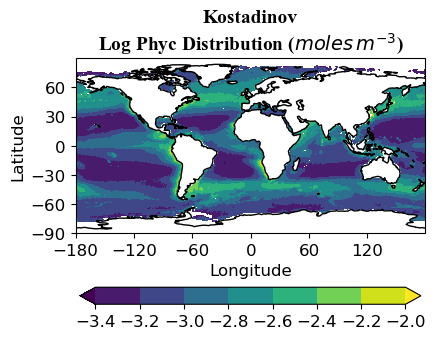

In [33]:
# Prepare the figure
fig = plt.figure(figsize=(5.5, 3.5), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

# Contour plot
cs = ax.contourf(
    dsm['lon'], dsm['lat'], dsm['logphyc'].T,
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    # vmin=-3.5, vmax=-0.5,
    # levels=np.linspace(-3.5, -0.5, 31),
    robust=True,
    extend='both'
)

# Title with custom font size
font_title = {'family': 'Times New Roman', 'color': 'black', 'fontsize': 14, 'fontweight': 'bold'}
ax.set_title("Kostadinov\nLog Phyc Distribution (${moles}\,{m^{-3}}$)", fontdict=font_title)

# Coastlines
ax.coastlines()

# X-axis settings
ax.set_xlabel("Longitude", fontsize=12)  # Font size for x-axis label
ax.set_xticks(np.arange(-180, 180, 60), crs=ccrs.PlateCarree())

# Y-axis settings
ax.set_ylabel("Latitude", fontsize=12)   # Font size for y-axis label
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())

# Font sizes for tick labels
ax.tick_params(axis='both', labelsize=12)  # Font size for axis tick labels

# Colorbar settings with tick label font size
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.8, pad=0.2)
cbar.ax.tick_params(labelsize=12)  # Font size for colorbar tick labels
# cbar.set_label(r'Log Phyc (moles $m^-3$)', fontsize=12)  # Font size for colorbar label

# Save the figure
fig.savefig(chartpath + "kostadinov_phyc_dist.jpg", dpi=200, bbox_inches="tight")

# Show plot
plt.show()

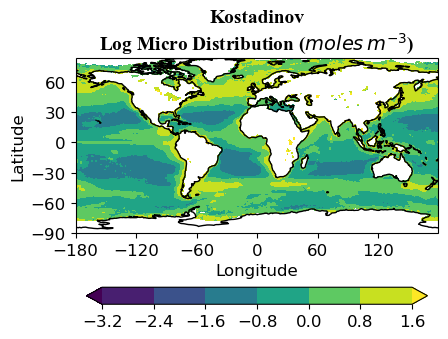

In [34]:
fig = plt.figure(figsize=(5.5,3.5), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

cs = ax.contourf(dsm['lon'], dsm['lat'], dsm['logmcro'].T, 
                 transform=ccrs.PlateCarree(),
                 cmap='viridis',
                 robust=True,
                 extend='both')

font_title = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
ax.set_title("Kostadinov\nLog Micro Distribution (${moles}\,{m^{-3}}$)", fontdict=font_title)

ax.coastlines()

ax.set_xlabel("Longitude", fontsize=12)
ax.set_xticks(np.arange(-180,180,60), crs=ccrs.PlateCarree())

ax.set_ylabel("Latitude", fontsize=12)
ax.set_yticks(np.arange(-90,90,30), crs=ccrs.PlateCarree())

ax.tick_params(axis='both', labelsize=12)

cbar = plt.colorbar(cs, shrink=0.8, orientation='horizontal', pad=0.2)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label(r'Log Micro (moles $m^-3$)', fontsize=12)

fig.savefig(chartpath + "kostadinov_mcro_dist.jpg",dpi=200,bbox_inches="tight")

plt.show()

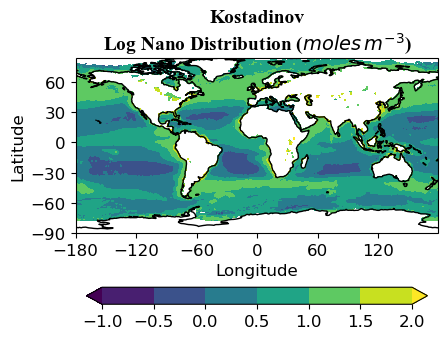

In [35]:
fig = plt.figure(figsize=(5.5,3.5), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

cs = ax.contourf(dsm['lon'], dsm['lat'], dsm['lognano'].T,
                 transform=ccrs.PlateCarree(),
                 robust=True,
                 cmap='viridis',
                 extend='both')

font_title = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
ax.set_title("Kostadinov\nLog Nano Distribution (${moles}\,{m^{-3}}$)", fontdict=font_title)
ax.coastlines()

ax.set_xlabel("Longitude", fontsize=12)
ax.set_xticks(np.arange(-180,180,60), crs=ccrs.PlateCarree())

ax.set_ylabel("Latitude", fontsize=12)
ax.set_yticks(np.arange(-90,90,30), crs=ccrs.PlateCarree())

ax.tick_params(axis='both', labelsize=12)

cbar = plt.colorbar(cs, shrink=0.8, orientation='horizontal', pad=0.2)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label(r'Log Nano (moles $m^-3$)', fontsize=12)

fig.savefig(chartpath + "kostadinov_nano_dist.jpg",dpi=200,bbox_inches="tight")
plt.show()

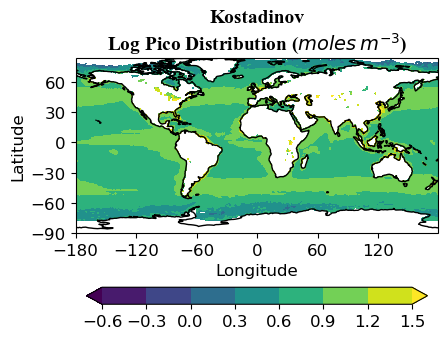

In [36]:
fig = plt.figure(figsize=(5.5,3.5), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

cs = ax.contourf(dsm['lon'], dsm['lat'], dsm['logpico'].T,
                 transform=ccrs.PlateCarree(),
                 cmap='viridis', 
                 robust=True,
                 extend='both')

font_title = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
ax.set_title("Kostadinov\nLog Pico Distribution (${moles}\,{m^{-3}}$)", fontdict=font_title)
ax.coastlines()

ax.set_xlabel("Longitude", fontsize=12)
ax.set_xticks(np.arange(-180,180,60), crs=ccrs.PlateCarree())

ax.set_ylabel("Latitude", fontsize=12)
ax.set_yticks(np.arange(-90,90,30), crs=ccrs.PlateCarree())

ax.tick_params(axis='both', labelsize=12)

cbar = plt.colorbar(cs, shrink=0.8, orientation='horizontal', pad=0.2)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label(r'Log Pico (moles $m^-3$)', fontsize=12)

fig.savefig(chartpath + "kostadinov_pico_dist.jpg",dpi=200,bbox_inches="tight")
plt.show()

In [37]:
df = ds.to_dataframe()
df = df.reset_index()
df = df.set_index(['month','lon','lat'])
df = df.astype('float32')
df = df.dropna()
df.head()

dfe        mld       nh4       no3       po4  \
month lon    lat                                                            
1     -178.5 -77.5  2.679019e-07  77.747002  0.000551  0.016134  0.001235   
      -177.5 -77.5  2.644416e-07  75.447998  0.000523  0.016679  0.001251   
      -176.5 -77.5  2.960231e-07  73.435997  0.000496  0.017200  0.001268   
      -175.5 -77.5  2.617441e-07  71.829002  0.000470  0.017657  0.001283   
      -174.5 -77.5  3.002942e-07  70.742996  0.000440  0.018044  0.001296   

                           rsn      sst        sal           w50       sil  \
month lon    lat                                                             
1     -178.5 -77.5  130.119232 -0.25111  34.274502  8.775279e-07  0.058165   
      -177.5 -77.5  125.292305 -0.30951  34.261688  7.140983e-07  0.057787   
      -176.5 -77.5  127.242310 -0.36131  34.249710  1.770336e-07  0.057461   
      -175.5 -77.5  127.242310 -0.40501  34.238689 -5.363125e-07  0.057123   
      -174.5 -77.5  121.280769 -0.44010  34.228912 -1.706607e-06  0.056761   

                     logphyc     cmicro      cnano      cpico   logmcro  \
month lon    lat                                                          
1     -178.5 -77.5 -2.204703  24.135592  35.146633  15.609698  1.382658   
      -177.5 -77.5 -2.168130  23.863447  34.403137  15.155487  1.377733   
      -176.5 -77.5 -2.206362  22.621801  32.827305  15.092021  1.354527   
      -175.5 -77.5 -2.257753  20.661867  31.737711  15.391986  1.315170   
      -174.5 -77.5 -2.185596  23.624771  34.115105  15.478457  1.373368   

                     lognano   logpico  
month lon    lat                        
1     -178.5 -77.5  1.545884  1.193395  
      -177.5 -77.5  1.536598  1.180570  
      -176.5 -77.5  1.516235  1.178747  
      -175.5 -77.5  1.501576  1.187295  
      -174.5 -77.5  1.532947  1.189728

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 431112 entries, (np.uint64(1), np.float64(-178.5), np.float64(-77.5)) to (np.uint64(12), np.float64(-22.5), np.float64(83.5))
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   dfe      431112 non-null  float32
 1   mld      431112 non-null  float32
 2   nh4      431112 non-null  float32
 3   no3      431112 non-null  float32
 4   po4      431112 non-null  float32
 5   rsn      431112 non-null  float32
 6   sst      431112 non-null  float32
 7   sal      431112 non-null  float32
 8   w50      431112 non-null  float32
 9   sil      431112 non-null  float32
 10  logphyc  431112 non-null  float32
 11  cmicro   431112 non-null  float32
 12  cnano    431112 non-null  float32
 13  cpico    431112 non-null  float32
 14  logmcro  431112 non-null  float32
 15  lognano  431112 non-null  float32
 16  logpico  431112 non-null  float32
dtypes: float32(17)
memory usage: 30.0 MB


In [39]:
df = df.loc[:, ['dfe','mld','nh4','no3','po4','rsn','sst','sal','sil','w50','cmicro','cnano','cpico','logmcro','lognano','logpico','logphyc']]

In [40]:
df.to_csv("kostadinov_monthly_mean_composite_dataset.csv",
          columns=['dfe','mld','nh4','no3','po4','rsn','sst','sal','sil','w50','cmicro','cnano','cpico','logmcro','lognano','logpico','logphyc'],
         index_label=['month','lon','lat'])

In [41]:
df = pd.read_csv("kostadinov_monthly_mean_composite_dataset.csv", index_col=['month','lon','lat'])
df.head()

dfe     mld       nh4       no3       po4  \
month lon    lat                                                         
1     -178.5 -77.5  2.679019e-07  77.747  0.000551  0.016134  0.001235   
      -177.5 -77.5  2.644416e-07  75.448  0.000523  0.016679  0.001251   
      -176.5 -77.5  2.960231e-07  73.436  0.000496  0.017200  0.001268   
      -175.5 -77.5  2.617441e-07  71.829  0.000470  0.017657  0.001283   
      -174.5 -77.5  3.002942e-07  70.743  0.000440  0.018044  0.001296   

                           rsn      sst        sal       sil           w50  \
month lon    lat                                                             
1     -178.5 -77.5  130.119230 -0.25111  34.274500  0.058165  8.775279e-07   
      -177.5 -77.5  125.292305 -0.30951  34.261690  0.057787  7.140983e-07   
      -176.5 -77.5  127.242310 -0.36131  34.249710  0.057461  1.770336e-07   
      -175.5 -77.5  127.242310 -0.40501  34.238690  0.057123 -5.363125e-07   
      -174.5 -77.5  121.280770 -0.44010  34.228912  0.056761 -1.706607e-06   

                       cmicro      cnano      cpico   logmcro   lognano  \
month lon    lat                                                          
1     -178.5 -77.5  24.135592  35.146633  15.609698  1.382658  1.545884   
      -177.5 -77.5  23.863447  34.403137  15.155487  1.377733  1.536598   
      -176.5 -77.5  22.621801  32.827305  15.092021  1.354527  1.516235   
      -175.5 -77.5  20.661867  31.737710  15.391986  1.315170  1.501576   
      -174.5 -77.5  23.624771  34.115105  15.478457  1.373368  1.532947   

                     logpico   logphyc  
month lon    lat                        
1     -178.5 -77.5  1.193394 -2.204703  
      -177.5 -77.5  1.180570 -2.168130  
      -176.5 -77.5  1.178747 -2.206362  
      -175.5 -77.5  1.187295 -2.257753  
      -174.5 -77.5  1.189728 -2.185596

### Random Forest

In [42]:
re_test = {}
r2_test = {}
rn_test = {}

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

Min-Max scaler scales all features in the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.
Note: Tree-based models are usually not dependent on scaling, but non-tree models models such as SVM, LDA etc. are often hugely dependent on it.

In [44]:
scaler = MinMaxScaler(feature_range=(0,10))

In [45]:
blue=mcolors.TABLEAU_COLORS['tab:blue']
orange=mcolors.TABLEAU_COLORS['tab:orange']
green=mcolors.TABLEAU_COLORS['tab:green']
red=mcolors.TABLEAU_COLORS['tab:red']
purple=mcolors.TABLEAU_COLORS['tab:purple']
brown=mcolors.TABLEAU_COLORS['tab:brown']
pink=mcolors.TABLEAU_COLORS['tab:pink']
olive=mcolors.TABLEAU_COLORS['tab:olive']
cyan=mcolors.TABLEAU_COLORS['tab:cyan']
gray=mcolors.TABLEAU_COLORS['tab:gray']

In [46]:
my_colors={'dfe':brown,'rsn':orange,'sst':red,'nh4':purple,'no3':pink,'mld':olive,
           'sal':green,'po4':cyan,'w50':gray,'sil':blue}

In [47]:
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [48]:
n = int(df.shape[0]*0.6)

In [49]:
from sklearn.utils import shuffle
df = shuffle(df)
X = df.drop(['cmicro','cnano','cpico','logmcro','lognano','logpico','logphyc'], axis=1)

X_train = X.iloc[:n,:]
X_test = X.iloc[n:,:]

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

Xs_train = pd.DataFrame(Xs_train, columns=X.columns)
Xs_test = pd.DataFrame(Xs_test, columns=X.columns)

In [50]:
yphyc = df['logphyc']
ymcro = df['logmcro']
ynano = df['lognano']
ypico = df['logpico']

#### Random Forest for Phyc

In [51]:
yphyc_train = yphyc[:n]
yphyc_test  = yphyc[n:]

In [52]:
rf_phyc = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt", random_state=101)

In [53]:
rf_phyc.fit(Xs_train, yphyc_train)

RandomForestRegressor(max_features='sqrt', n_estimators=50, random_state=101)

In [54]:
import pickle
filename = "rfphyc_kostadinov.sav"
# pickle.dump(rf_phyc, open(filename, 'wb'))
# model_phyc = pickle.load(open(filename, 'rb'))
model_phyc = rf_phyc

In [55]:
yphyc_pred_test = model_phyc.predict(Xs_test)
re = np.sqrt(mean_squared_error(yphyc_test, yphyc_pred_test))
r2 = r2_score(yphyc_test,yphyc_pred_test)
rn = re / yphyc_test.std()
print("RMSE phyc: ", re)
print("Normalised RMSE phyc: ",rn)
print("R2 Score phyc: ",r2)
re_test['phyc'] = np.round(re,2)
rn_test['phyc'] = np.round(rn,2)
r2_test['phyc'] = np.round(r2,2)

RMSE phyc:  0.113355676977676
Normalised RMSE phyc:  0.3479297165144951
R2 Score phyc:  0.8789442103696004


Reference scores  
RMSE phyc:  0.11565631449027938  
Normalised RMSE phyc:  0.3546560387344827  
R2 Score phyc:  0.874218364787711

#### Random Forest for Cmicro

In [56]:
ymcro_train = ymcro[:n]
ymcro_test  = ymcro[n:]

In [57]:
rf_mcro = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt", min_samples_leaf=5, random_state=101)

In [58]:
rf_mcro.fit(Xs_train, ymcro_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5, n_estimators=50,
                      random_state=101)

In [59]:
import pickle
filename = "rfmcro_kostadinav.sav"
# pickle.dump(rf_mcro, open(filename, 'wb'))
# model_mcro = pickle.load(open(filename, 'rb'))
model_mcro = rf_mcro

In [60]:
ymcro_pred_test = model_mcro.predict(Xs_test)
re = np.sqrt(mean_squared_error(ymcro_test, ymcro_pred_test))
rn = re / ymcro_test.std()
r2 = r2_score(ymcro_test,ymcro_pred_test)
print('RMSE: ',re) # 0.009037626203673953
print('Normalised RMSE: ',rn)
print('R2 Score: ',r2)
re_test['mcro'] = np.round(re,2)
rn_test['mcro'] = np.round(rn,2)
r2_test['mcro'] = np.round(r2,2)

RMSE:  0.22851035627256108
Normalised RMSE:  0.30332221040760343
R2 Score:  0.9079951031416126


Reference values  
RMSE:  0.25656060951601983  
Normalised RMSE:  0.2945367249892131  
R2 Score:  0.9132476145598218

#### Random Forest for Cnano

In [61]:
ynano_train = ynano[:n]
ynano_test = ynano[n:]

In [62]:
rf_nano = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt",min_samples_leaf=5,random_state=101)

In [63]:
rf_nano.fit(Xs_train, ynano_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5, n_estimators=50,
                      random_state=101)

In [64]:
import pickle
filename = "rfnano_kostadinav_final_scaled.sav"
# pickle.dump(rf_nano, open(filename, 'wb'))
# model_nano = pickle.load(open(filename, 'rb'))
model_nano = rf_nano

In [65]:
ynano_pred_test = model_nano.predict(Xs_test)
re = np.sqrt(mean_squared_error(ynano_test, ynano_pred_test))
rn = re / ynano_test.std()
r2 = r2_score(ynano_test, ynano_pred_test)
print('RMSE :',re) # 0.009446344185591383
print('Normalised RMSE: ', rn)
print('R2 Score :',r2)
re_test['nano'] = np.round(re,2)
rn_test['nano'] = np.round(rn,2)
r2_test['nano'] = np.round(r2,2)

RMSE : 0.13463216343312864
Normalised RMSE:  0.2790919309314014
R2 Score : 0.9221072423927436


Reference values  
RMSE : 0.15242339372630892  
Normalised RMSE:  0.28000871581736214  
R2 Score : 0.9215946643976406

#### Random Forest Cpico

In [66]:
ypico_train = ypico[:n]
ypico_test = ypico[n:]

In [67]:
rf_pico = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt",min_samples_leaf=5, random_state=101)

In [68]:
rf_pico.fit(Xs_train, ypico_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5, n_estimators=50,
                      random_state=101)

In [69]:
import pickle
filename = "rfpico_kostadinav.sav"
# pickle.dump(rf_pico, open(filename, 'wb'))
# model_pico = pickle.load(open(filename, 'rb'))
model_pico = rf_pico

In [70]:
ypico_pred_test = model_pico.predict(Xs_test)
re = np.sqrt(mean_squared_error(ypico_test, ypico_pred_test))
rn = re / ypico_test.std()
r2 = r2_score(ypico_test, ypico_pred_test)

print('RMSE :',re) #0.006223496989107393
print('Normalised RMSE: ',rn)
print('R2 Score :', r2)
re_test['pico'] = np.round(re,2)
rn_test['pico'] = np.round(rn,2)
r2_test['pico'] = np.round(r2,2)

RMSE : 0.07920974737537453
Normalised RMSE:  0.2810982463553493
R2 Score : 0.9209833176821246


Reference Values   
RMSE : 0.047544904111293286  
Normalised RMSE:  0.2961349881061683  
R2 Score : 0.912303560272036

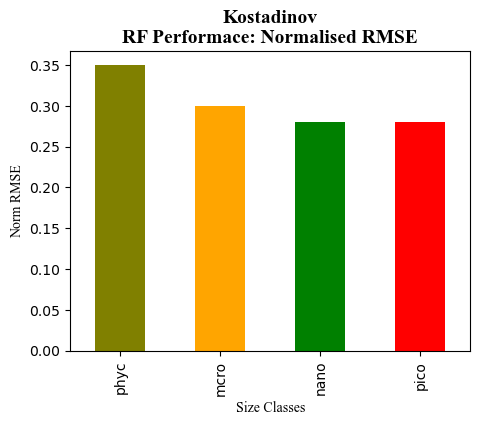

In [71]:
rntest = pd.Series(rn_test)
fig = plt.figure(figsize=(4,3), dpi=100)
ax = fig.add_axes([0,0,1,1])
rntest.plot.bar(color=['olive','orange','green','red'], ax=ax)
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_xlabel("Size Classes",fontdict=fonttxt)
ax.set_title("Kostadinov\nRF Performace: Normalised RMSE",fontdict=font)
plt.tight_layout()
# fig.savefig("kostadinov_rf_rn.jpg", dpi=200,bbox_inches='tight')

### Feature Importance

#### Feature Importance Phyc

In [72]:
model_phyc.feature_importances_

array([0.15966785, 0.05464299, 0.12207208, 0.09394578, 0.05843998,
       0.23298839, 0.12907775, 0.07433242, 0.03361967, 0.04121309])

In [73]:
index = model_phyc.feature_importances_.argsort()[::-1]
index

array([5, 0, 6, 2, 3, 7, 4, 1, 9, 8])

In [74]:
feature_phyc= pd.DataFrame(index= X.columns[index],
                           data= model_phyc.feature_importances_[index], 
                           columns=['Feature Importance'])

In [75]:
feat_phyc=pd.DataFrame({'inputs':X.columns,'Importance':model_phyc.feature_importances_})
feat_phyc

inputs  Importance
0    dfe    0.159668
1    mld    0.054643
2    nh4    0.122072
3    no3    0.093946
4    po4    0.058440
5    rsn    0.232988
6    sst    0.129078
7    sal    0.074332
8    sil    0.033620
9    w50    0.041213

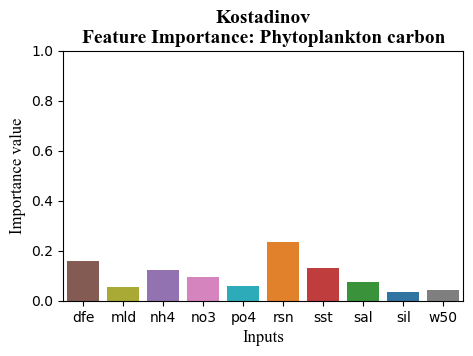

In [76]:
fig = plt.figure(figsize=(4,2.5), dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='inputs', y='Importance', data=feat_phyc, ax=ax, palette=my_colors)
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':12}
ax.set_title('Kostadinov\nFeature Importance: Phytoplankton carbon',fontdict=font)
ax.set_ylabel("Importance value",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "kostadinov_FI_phyc.jpg",dpi=200,bbox_inches='tight')

Permutation Feature Importance

The idea behind feature importance is simple. Inputs that are useful for prediction contain valuable information. If you destroy that information by randomly shuffling the feature values, the quality of your predictions should decrease. If the decrease in quality is small, then the information in the original predictor wasn’t very impactful in determining your predictions — your model is still pretty good without it. Furthermore, if the decrease is large, then the information in the original predictor had a large impact on your predictions.

This idea is implemented in three simple steps. Say that you’ve trained an ML model and recorded some measure of quality for the predictions (ex. MSE, log-loss, etc). For each predictor in the dataset:

Randomly shuffle the data in the predictor while keeping the values of other predictors constant
Generate new predictions based on the shuffled values and evaluate the quality of your new predictions
Compute the feature importance score by calculating the decrease in the quality of your new predictions relative to your original predictions
Once you’ve computed feature importance scores for all of your features, you can rank them in terms of predictive usefulness. To help explain permutation feature importance more concretely, consider the following synthetic case study.

#### Feature Importance Cmicro

In [77]:
model_mcro.feature_importances_

array([0.21613   , 0.05699248, 0.09455934, 0.11250592, 0.06029897,
       0.09548761, 0.16944883, 0.1007201 , 0.03483569, 0.05902106])

In [78]:
index = model_mcro.feature_importances_.argsort()[::-1]
index

array([0, 6, 3, 7, 5, 2, 4, 9, 1, 8])

In [79]:
feat_mcro= pd.DataFrame({'Inputs': X.columns,'Importances':model_mcro.feature_importances_})

In [80]:
feat_mcro

Inputs  Importances
0    dfe     0.216130
1    mld     0.056992
2    nh4     0.094559
3    no3     0.112506
4    po4     0.060299
5    rsn     0.095488
6    sst     0.169449
7    sal     0.100720
8    sil     0.034836
9    w50     0.059021

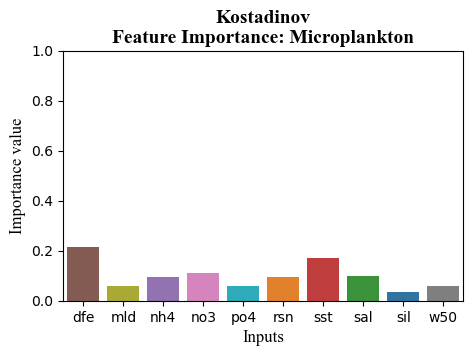

In [81]:
fig = plt.figure(figsize=(4,2.5), dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='Inputs', y='Importances', data=feat_mcro, ax=ax, palette=my_colors)
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':12}
ax.set_title('Kostadinov\nFeature Importance: Microplankton',fontdict=font)
ax.set_ylabel("Importance value",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "kostadinov_FI_mcro.jpg",dpi=200,bbox_inches='tight')

#### Feature Importance Cnano

In [82]:
model_nano.feature_importances_

array([0.20516929, 0.05367307, 0.11331426, 0.11107163, 0.06675581,
       0.13929995, 0.13388616, 0.09715886, 0.03280264, 0.04686832])

In [83]:
feat_nano = pd.DataFrame({'Inputs':X.columns, 'Feature Importance':model_nano.feature_importances_})
feat_nano

Inputs  Feature Importance
0    dfe            0.205169
1    mld            0.053673
2    nh4            0.113314
3    no3            0.111072
4    po4            0.066756
5    rsn            0.139300
6    sst            0.133886
7    sal            0.097159
8    sil            0.032803
9    w50            0.046868

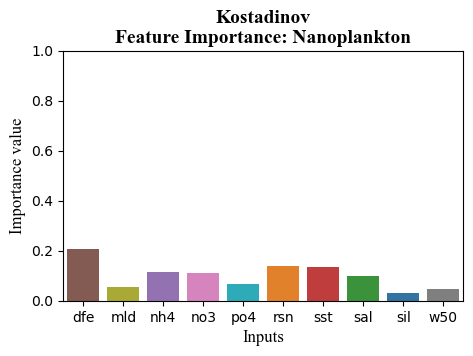

In [84]:
fig = plt.figure(figsize=(4,2.5), dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='Inputs', y='Feature Importance', data=feat_nano, ax=ax, palette=my_colors)
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':12}
ax.set_title('Kostadinov\nFeature Importance: Nanoplankton',fontdict=font)
ax.set_ylabel("Importance value",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "kostadinov_FI_nano.jpg",dpi=200,bbox_inches='tight')

#### Feature Importance Cpico

In [85]:
model_pico.feature_importances_

array([0.06161233, 0.03078084, 0.08320512, 0.05078904, 0.03194012,
       0.5378156 , 0.13311252, 0.03279962, 0.02163886, 0.01630595])

In [86]:
feat_pico = pd.DataFrame({'Inputs':X.columns, 'Feature Importance':model_pico.feature_importances_})
feat_pico

Inputs  Feature Importance
0    dfe            0.061612
1    mld            0.030781
2    nh4            0.083205
3    no3            0.050789
4    po4            0.031940
5    rsn            0.537816
6    sst            0.133113
7    sal            0.032800
8    sil            0.021639
9    w50            0.016306

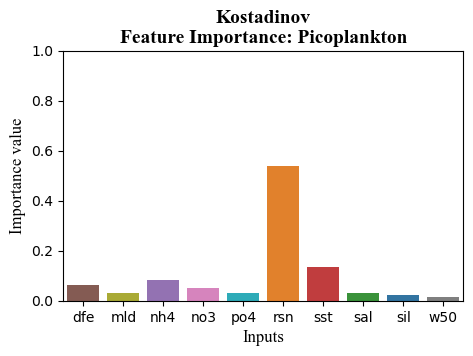

In [87]:
fig = plt.figure(figsize=(4,2.5), dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='Inputs', y='Feature Importance', data=feat_pico, ax=ax, palette=my_colors)
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':12}
ax.set_title('Kostadinov\nFeature Importance: Picoplankton',fontdict=font)
ax.set_ylabel("Importance value",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "kostadinov_FI_pico.jpg",dpi=200,bbox_inches='tight')

### Permutation Importance

#### Permutation Importance Phyc

In [88]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_phyc, Xs_test, yphyc_test, n_repeats=30, scoring='neg_root_mean_squared_error',n_jobs=-1)
Importances = result['importances_mean']

In [89]:
piphyc = pd.DataFrame({'Inputs':X.columns,'RMSE':Importances})
piphyc['NormRMSE'] = piphyc['RMSE']/yphyc_test.std()
# piphyc.to_pickle('piphyc.pkl')
# piphyc = pd.read_pickle('piphyc.pkl')
piphyc

Inputs      RMSE  NormRMSE
0    dfe  0.128163  0.393380
1    mld  0.041873  0.128524
2    nh4  0.087734  0.269287
3    no3  0.049968  0.153370
4    po4  0.030251  0.092853
5    rsn  0.178435  0.547681
6    sst  0.125584  0.385464
7    sal  0.054201  0.166363
8    sil  0.016013  0.049150
9    w50  0.019894  0.061061

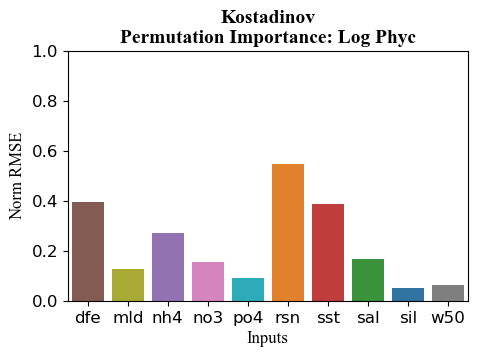

In [90]:
fig = plt.figure(figsize=(4,2.5),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='Inputs',y='NormRMSE',data=piphyc,ax=ax, palette=my_colors)
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':12}
ax.set_title('Kostadinov\nPermutation Importance: Log Phyc',fontdict=font)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.tick_params(axis='both', labelsize=12)
# ax.yaxis.set_tick_params(labelsize=12)
# ax.set(xlabel=None, ylabel=None)
fig.savefig(chartpath + "kostadinov_PI_phyc.jpg",dpi=200,bbox_inches='tight')
plt.show()

#### Permutation Importance Cmicro

In [91]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_mcro, Xs_test, ymcro_test, n_repeats=30, scoring='neg_root_mean_squared_error',n_jobs=-1)
Importances = result['importances_mean']
pimcro = pd.DataFrame({'Inputs':X.columns,'RMSE':Importances})
pimcro['NormRMSE'] = pimcro['RMSE']/ymcro_test.std()
# pimcro.to_pickle('pimcro.pkl')
# pimcro = pd.read_pickle('pimcro.pkl')
pimcro

Inputs      RMSE  NormRMSE
0    dfe  0.391426  0.519574
1    mld  0.132426  0.175780
2    nh4  0.201947  0.268063
3    no3  0.140747  0.186826
4    po4  0.090921  0.120688
5    rsn  0.217746  0.289033
6    sst  0.306153  0.406384
7    sal  0.174662  0.231844
8    sil  0.055648  0.073866
9    w50  0.092383  0.122629

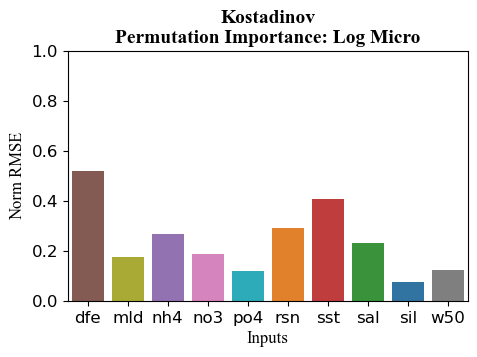

In [92]:
fig = plt.figure(figsize=(4,2.5),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='Inputs',y='NormRMSE',data=pimcro,ax=ax, palette=my_colors)
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':12}
ax.set_title('Kostadinov\nPermutation Importance: Log Micro',fontdict=font)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.tick_params(axis='both', labelsize=12)
# ax.yaxis.set_tick_params(labelsize=20)
# ax.set(xlabel=None, ylabel=None)
fig.savefig(chartpath + "kostadinov_PI_mcro.jpg",dpi=200,bbox_inches='tight')
plt.show()

#### Permutation Importance Cnano

In [93]:
# from sklearn.inspection import permutation_importance
result = permutation_importance(model_nano, Xs_test, ynano_test, n_repeats=10, scoring='neg_root_mean_squared_error',n_jobs=-1)
Importances = result['importances_mean']
pinano = pd.DataFrame({'Inputs':X.columns,'RMSE':Importances})
pinano['NormRMSE'] = pinano['RMSE']/ynano_test.std()
# pinano.to_pickle('pinano.pkl')
# pinano = pd.read_pickle('pinano.pkl')
pinano

Inputs      RMSE  NormRMSE
0    dfe  0.252019  0.522434
1    mld  0.077236  0.160109
2    nh4  0.148728  0.308313
3    no3  0.099440  0.206139
4    po4  0.069365  0.143794
5    rsn  0.194027  0.402217
6    sst  0.192444  0.398937
7    sal  0.118518  0.245688
8    sil  0.033770  0.070005
9    w50  0.052742  0.109333

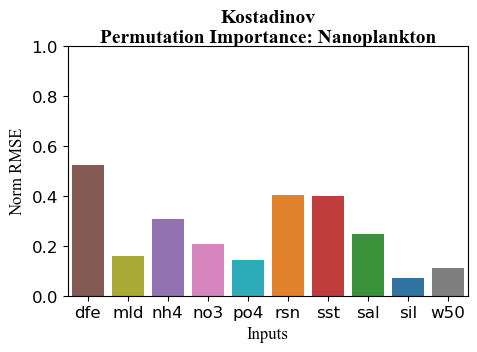

In [94]:
fig = plt.figure(figsize=(4,2.5),dpi=100)
ax = fig.add_axes([0,0,1,1])
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':12}

sns.barplot(x='Inputs',y="NormRMSE",data=pinano,ax=ax,palette=my_colors)
ax.set_title("Kostadinov\nPermutation Importance: Nanoplankton",fontdict=font,pad=1)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.tick_params(axis='both', labelsize=12)
# ax.yaxis.set_tick_params(labelsize=20)
# ax.set(xlabel=None, ylabel=None)
plt.show()
fig.savefig(chartpath + "Kostadinov_PI_nano.jpg",dpi=200,bbox_inches="tight")

#### Permutation Importance Cpico

In [95]:
result = permutation_importance(model_pico, Xs_test, ypico_test, n_repeats=30, scoring='neg_root_mean_squared_error',n_jobs=-1)
Importances = result['importances_mean']
pipico = pd.DataFrame({'Inputs':X.columns, 'RMSE':Importances})
pipico['NormRMSE'] = pipico['RMSE']/ypico_test.std()
# pipico.to_pickle('pipico.pkl')
# pipico = pd.read_pickle('pipico.pkl')
pipico

Inputs      RMSE  NormRMSE
0    dfe  0.052441  0.186103
1    mld  0.023952  0.085000
2    nh4  0.059501  0.211156
3    no3  0.020023  0.071056
4    po4  0.014990  0.053195
5    rsn  0.249079  0.883929
6    sst  0.056909  0.201956
7    sal  0.024011  0.085210
8    sil  0.010875  0.038595
9    w50  0.010760  0.038184

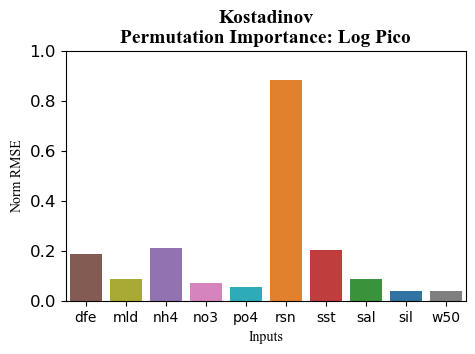

In [99]:
fig = plt.figure(figsize=(4,2.5),dpi=100)
ax = fig.add_axes([0,0,1,1])

font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
sns.barplot(x='Inputs',y="NormRMSE",data=pipico,ax=ax,palette=my_colors)
ax.set_title("Kostadinov\nPermutation Importance: Log Pico",fontdict=font)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.yaxis.set_tick_params(labelsize=12)
# ax.set(xlabel=None, ylabel=None)
# plt.grid(b=True, which='major', color='#300000', linestyle='-')
# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='#900000', linestyle=':')
plt.show()
fig.savefig(chartpath + "kostadinov_PI_pico.jpg",dpi=200,bbox_inches='tight')

### Median Replacement Anomaly

In [40]:
X.head()

dfe      mld       nh4       no3       po4  \
month lat   lon                                                           
6     -8.5  -24.5   7.445047e-07   69.044  0.000054  0.000368  0.000032   
12    -61.5 -43.5   2.283880e-07   64.590  0.000378  0.025139  0.001280   
2      31.5  158.5  4.652014e-07  185.941  0.000143  0.000613  0.000294   
4      31.5 -56.5   7.125967e-07   86.414  0.000178  0.000020  0.000070   
2      15.5  54.5   8.654294e-07   34.624  0.000125  0.000591  0.000414   

                           rsn        sal        sst       sil           w50  
month lat   lon                                                               
6     -8.5  -24.5   208.230769  36.167511  27.113010  0.001262 -1.302645e-06  
12    -61.5 -43.5   137.270370  34.043087  -0.373410  0.060885  2.294955e-07  
2      31.5  158.5  120.934615  34.793098  17.851299  0.002046 -1.057945e-06  
4      31.5 -56.5   225.757692  36.690411  19.960590  0.000599 -1.590695e-06  
2      15.5  54.5   235.265385  36.047688  25.153210  0.001232 -2.675216e-06

In [41]:
Xs = scaler.transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns, index=X.index)
Xs.head()

dfe       mld       nh4       no3       po4  \
month lat   lon                                                        
6     -8.5  -24.5   0.665441  0.449720  0.387506  0.079607  0.104854   
12    -61.5 -43.5   0.170599  0.420709  2.889186  5.433515  4.225600   
2      31.5  158.5  0.397651  1.211133  1.072117  0.132443  0.969578   
4      31.5 -56.5   0.634848  0.562860  1.344044  0.004289  0.231353   
2      15.5  54.5   0.781381  0.225525  0.930365  0.127694  1.367979   

                         rsn       sal       sst       sil       w50  
month lat   lon                                                       
6     -8.5  -24.5   6.470441  8.695061  8.219305  0.098790  5.092565  
12    -61.5 -43.5   4.265459  8.034607  0.434547  4.765074  5.183712  
2      31.5  158.5  3.757851  8.267775  5.596185  0.160100  5.107122  
4      31.5 -56.5   7.015062  8.857624  6.193583  0.046848  5.075429  
2      15.5  54.5   7.310499  8.657810  7.664246  0.096425  5.010911

In [42]:
df.head()

dfe      mld       nh4       no3       po4  \
month lat   lon                                                           
6     -8.5  -24.5   7.445047e-07   69.044  0.000054  0.000368  0.000032   
12    -61.5 -43.5   2.283880e-07   64.590  0.000378  0.025139  0.001280   
2      31.5  158.5  4.652014e-07  185.941  0.000143  0.000613  0.000294   
4      31.5 -56.5   7.125967e-07   86.414  0.000178  0.000020  0.000070   
2      15.5  54.5   8.654294e-07   34.624  0.000125  0.000591  0.000414   

                           rsn        sal        sst       sil           w50  \
month lat   lon                                                                
6     -8.5  -24.5   208.230769  36.167511  27.113010  0.001262 -1.302645e-06   
12    -61.5 -43.5   137.270370  34.043087  -0.373410  0.060885  2.294955e-07   
2      31.5  158.5  120.934615  34.793098  17.851299  0.002046 -1.057945e-06   
4      31.5 -56.5   225.757692  36.690411  19.960590  0.000599 -1.590695e-06   
2      15.5  54.5   235.265385  36.047688  25.153210  0.001232 -2.675216e-06   

                      cmicro     cnano     cpico   logmcro   lognano  \
month lat   lon                                                        
6     -8.5  -24.5   0.000009  0.000107  0.000474 -5.044469 -3.969062   
12    -61.5 -43.5   0.001421  0.002299  0.001127 -2.847307 -2.638375   
2      31.5  158.5  0.000381  0.000975  0.000794 -3.418725 -3.011087   
4      31.5 -56.5   0.000020  0.000145  0.000494 -4.709404 -3.838937   
2      15.5  54.5   0.000750  0.001576  0.000964 -3.124836 -2.802513   

                     logpico   logphyc       phyc  
month lat   lon                                    
6     -8.5  -24.5  -3.323969 -3.213464   7.340365  
12    -61.5 -43.5  -2.948119 -2.319349  57.521829  
2      31.5  158.5 -3.099953 -2.662443  26.105874  
4      31.5 -56.5  -3.306000 -3.149204   8.510929  
2      15.5  54.5  -3.016053 -2.495124  38.375815

In [43]:
df['logphyc_pred'] = model_phyc.predict(Xs)
df['logmcro_pred'] = model_mcro.predict(Xs)
df['lognano_pred'] = model_nano.predict(Xs)
df['logpico_pred'] = model_pico.predict(Xs)

In [44]:
def median_dataset(Xs, df, input, q=0.5):
    ''' The function takes a scaled input data and the original unscaled dataset.
    The specified input is replaced by 50th percentile of it's value and the model for the
    particular output is then used to do the prediction on the altered dataset. This is the median prediction.
    This prediction added to the original dataset against the original RF prediction for the respective output
    and coverted to an xarray dataset which is sorted by lat and lon. Returns a dataset with original input, output,
    original RF predictions and median RF prediction for the corressponding input and output'''
    # if isintance(input, str):
    #     pass
    # else:
    #     raise TypeError("Input needs to be a string")
          
    X5 = Xs.copy(deep=True)
    for col in Xs.columns:
        if col==input:
            X5[col] = X5[col].quantile(q, interpolation='linear')
        else:
            X5[col] = X5[col]
    print(X5.head())    
    ds50 = df[['logphyc','logphyc_pred','logmcro','logmcro_pred','lognano','lognano_pred','logpico','logpico_pred']].copy(deep=True)
    ds50['logphyc_med'] = model_phyc.predict(X5)
    ds50['logmcro_med'] = model_mcro.predict(X5)
    ds50['lognano_med'] = model_nano.predict(X5)
    ds50['logpico_med'] = model_pico.predict(X5)    
    # print(ds50.head())
    ds5 = ds50.to_xarray()
    ds5 = ds5.sortby(['lat','lon'])
    ds5m= ds5.mean(dim='month')
    return ds5m

In [58]:
def med_sensitivity_plot(ds5m, psc, levels, vmin, vmax, title, plot_name):
    import matplotlib.colors as colors
    from matplotlib.cm import ScalarMappable
    fig = plt.figure(figsize=(11.5,8), dpi=100)
    
    # Set the axes using the specified map projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # choose the data
    anom = (ds5m[psc + '_pred'] - ds5m[psc + '_med'])
    
    # Make a filled contour plot
    cs = ax.contourf(ds5m['lon'], ds5m['lat'],anom, levels=levels,vmin=vmin,vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     norm=colors.CenteredNorm(),
                     center=True,
                     cmap='coolwarm', extend='both')
    
    # Add coastlines
    ax.coastlines()
    
    # Define the xticks for longitude
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    # lon_formatter = cticker.LongitudeFormatter()
    # ax.xaxis.set_major_formatter(lon_formatter)
    
    # Define the yticks for latitude
    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    # lat_formatter = cticker.LatitudeFormatter()
    # ax.yaxis.set_major_formatter(lat_formatter)

    ax.set_xlabel("lon")
    ax.set_ylabel("lat")
    
    #Add Title
    fonttitle = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
    ax.set_title(title, fontdict=fonttitle)
    
    # Add colorbar
    cbar = plt.colorbar(cs, shrink=0.6)

    # Change the font size of the colorbar labels
    cbar.ax.tick_params(labelsize=20)
    
    plt.show()
    fig.savefig(chartpath + plot_name, dpi=500, bbox_inches="tight")

#### Sensitivity Iron

In [59]:
dfe5m = median_dataset(Xs, df, 'dfe')

                         dfe       mld       nh4       no3       po4  \
month lat   lon                                                        
6     -8.5  -24.5   0.249871  0.449720  0.387506  0.079607  0.104854   
12    -61.5 -43.5   0.249871  0.420709  2.889186  5.433515  4.225600   
2      31.5  158.5  0.249871  1.211133  1.072117  0.132443  0.969578   
4      31.5 -56.5   0.249871  0.562860  1.344044  0.004289  0.231353   
2      15.5  54.5   0.249871  0.225525  0.930365  0.127694  1.367979   

                         rsn       sal       sst       sil       w50  
month lat   lon                                                       
6     -8.5  -24.5   6.470441  8.695061  8.219305  0.098790  5.092565  
12    -61.5 -43.5   4.265459  8.034607  0.434547  4.765074  5.183712  
2      31.5  158.5  3.757851  8.267775  5.596185  0.160100  5.107122  
4      31.5 -56.5   7.015062  8.857624  6.193583  0.046848  5.075429  
2      15.5  54.5   7.310499  8.657810  7.664246  0.096425  5.010911 

In [60]:
dif = (dfe5m['logphyc_pred'] - dfe5m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.6705216516029782 0.570759672445373


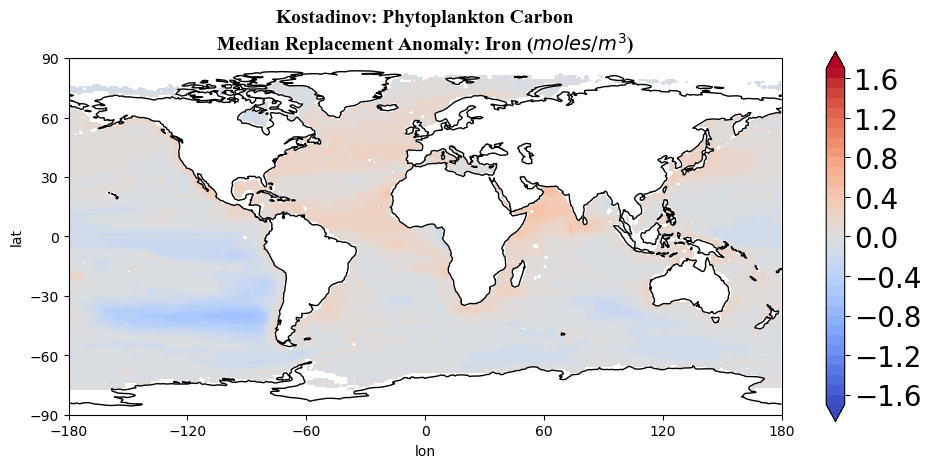

In [61]:
med_sensitivity_plot(
    dfe5m,
    psc='logphyc',
    levels=np.linspace(-1.7,1.7,35),
    vmin=-1.7, vmax=1.7,
    title ="Kostadinov: Phytoplankton Carbon\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
    plot_name="kostadinov_medianplot_phyc_dfe.jpg"
)

In [62]:
dif = (dfe5m['logmcro_pred'] - dfe5m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-1.691483524118501 1.3502571965028607


In [63]:
np.linspace(-1.7,1.4,32)

array([-1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4])

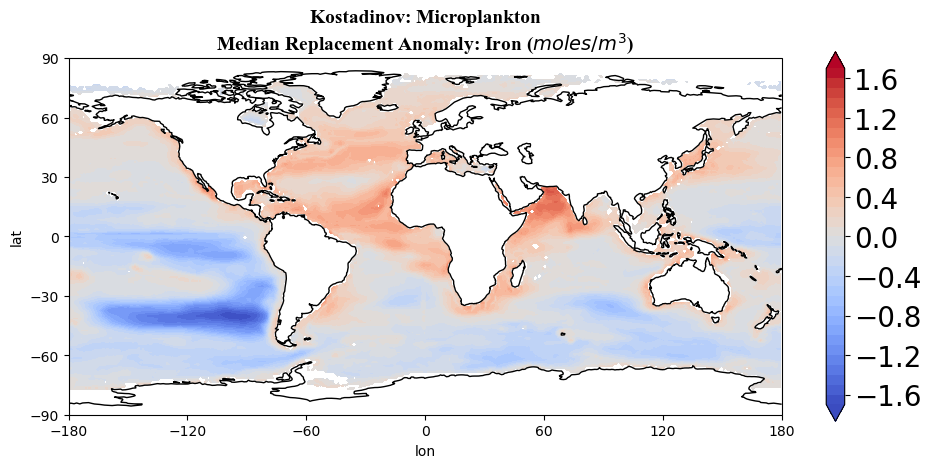

In [64]:
med_sensitivity_plot(
    dfe5m,
    psc='logmcro',
    # levels=np.linspace(-1.7,1.4,32),
    levels=np.linspace(-1.7,1.7,35),
    vmin=-1.7, vmax=1.7,
    title ="Kostadinov: Microplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
    plot_name="kostadinov_medianplot_mcro_dfe.png"
)

In [65]:
dif = (dfe5m['lognano_pred'] - dfe5m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-1.0495929994840192 0.7857581447432738


In [66]:
np.linspace(-1.1,1.0,22)

array([-1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,
        0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

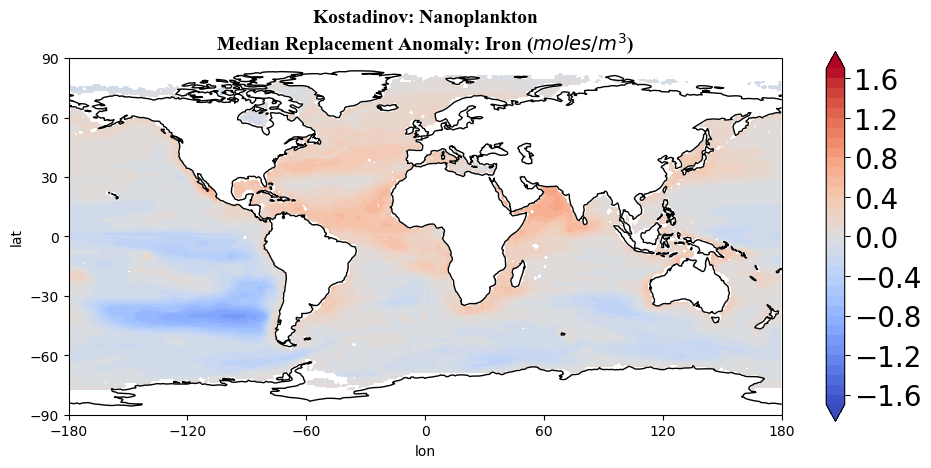

In [67]:
med_sensitivity_plot(
    dfe5m,
    psc='lognano',
    # levels=np.linspace(-1.1,1.0,22),
    levels=np.linspace(-1.7,1.7,35),
    vmin=-1.7, vmax=1.7,
    title ="Kostadinov: Nanoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
    plot_name="kostadinov_medianplot_nano_dfe.png"
)

In [68]:
dif = (dfe5m['logpico_pred'] - dfe5m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.2759459008132823 0.28440886577704205


In [69]:
np.linspace(-0.5,0.3,13)

array([-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
       -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
        0.16666667,  0.23333333,  0.3       ])

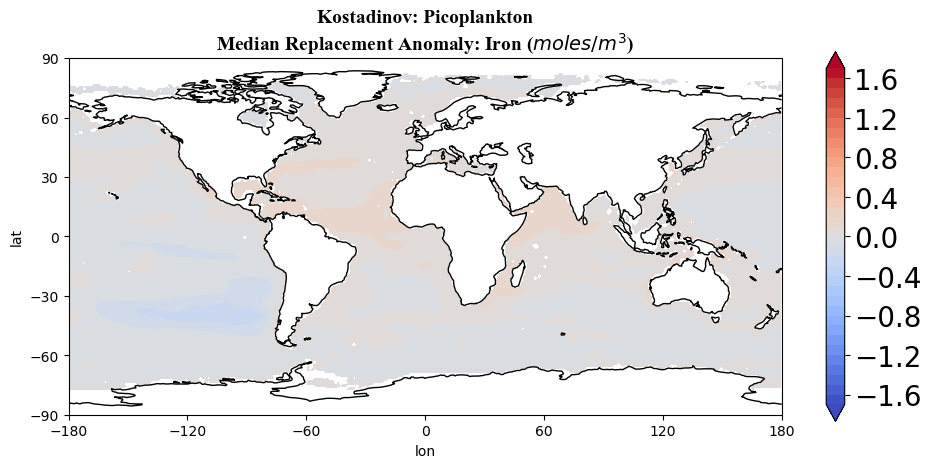

In [70]:
med_sensitivity_plot(
    dfe5m,
    psc='logpico',
    # levels=np.linspace(-0.5,0.5,11),
    levels=np.linspace(-1.7,1.7,35),
    vmin=-1.7, vmax=1.7,
    title ="Kostadinov: Picoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
    plot_name="kostadinov_medianplot_pico_dfe.png"
)

#### Sensitivity MLD

In [ ]:
mld5m = median_dataset(Xs, df, 'mld')

In [ ]:
dif = (mld5m['logphyc_pred'] - mld5m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

In [ ]:
np.linspace(-0.3,0.4,15)

In [ ]:
med_sensitivity_plot(mld5m, psc='logphyc', levels=np.linspace(-0.3,0.4,15), vmin=-0.3, vmax=0.4,
                     title ="Kostadinov: Phytoplankton Carbon\nMedian Replacement Anomaly: Mixed Layer Depth (m)",
                     plot_name="kostadinov_medianplot_phyc_mld.jpg")

In [ ]:
dif = (mld5m['logmcro_pred'] - mld5m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

In [ ]:
np.linspace(-0.9,0.7,17)

In [ ]:
med_sensitivity_plot(mld5m, psc='logmcro', levels=np.linspace(-0.9,0.7,17), vmin=-0.9, vmax=0.7,
                     title ="Kostadinov: Microplankton\nMedian Replacement Anomaly: Mixed layer Depth (m)",
                     plot_name="kostadinov_medianplot_mcro_mld.jpg")

In [ ]:
dif = (mld5m['lognano_pred'] - mld5m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

In [ ]:
np.linspace(-0.5,0.5,11)

In [ ]:
med_sensitivity_plot(mld5m, psc='lognano', levels=np.linspace(-0.5,0.5,11), vmin=-0.5, vmax=0.5,
                     title ="Kostadinov: Nanoplankton\nMedian Replacement Anomaly: Mixed layer Depth (m)",
                     plot_name="kostadinov_medianplot_nano_mld.jpg")

In [ ]:
dif = (mld5m['logpico_pred'] - mld5m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

In [ ]:
np.linspace(-0.1,0.1,5)

In [ ]:
med_sensitivity_plot(mld5m, psc='logpico', levels=np.linspace(-0.1,0.1,5), vmin=-0.1, vmax=0.1,
                     title ="Kostadinov: Picoplankton\nMedian Replacement Anomaly: Mixed Layer Depth (m)",
                     plot_name="kostadinov_medianplot_pico_mld.jpg")

#### $NH_4$

#### $NO_3$

In [131]:
no35m = median_dataset(Xs, df, 'no3')

                          dfe        mld        nh4        no3        po4  \
month lat   lon                                                             
1      18.5  134.5  12.286743  14.910397  12.729221  10.292852  10.558435   
      -2.5   4.5    12.286743  10.837061  13.805125  10.118527  15.040714   
4     -26.5 -7.5    12.286743  13.367822  12.634802  10.210363  14.092470   
11     12.5 -72.5   12.286743  12.053522  12.846441  10.683229  10.000000   
7     -19.5 -133.5  12.286743  17.239206  13.937005  10.097881  16.128125   

                          rsn        sst        sal        w50        sil  
month lat   lon                                                            
1      18.5  134.5  55.615891  82.093580  84.221366  54.412574  10.791610  
      -2.5   4.5    71.402739  85.508979  80.329693  54.753994  13.620399  
4     -26.5 -7.5    62.242775  74.731539  88.696449  54.336072  11.251723  
11     12.5 -72.5   67.788263  85.746548  87.647271  61.279982  16.753966  
7   

In [132]:
dif = (no35m['logphyc_pred'] - no35m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.6815314760379678 0.547936765903906


In [133]:
np.linspace(-0.7,0.6,14)

array([-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6])

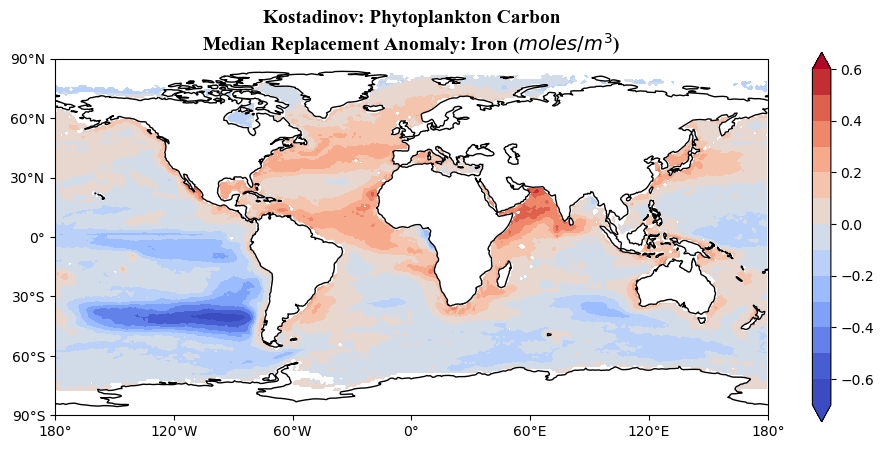

In [134]:
med_sensitivity_plot(no35m, psc='logphyc', levels=np.linspace(-0.7,0.6,14), vmin=-0.7, vmax=0.6,
                     title ="Kostadinov: Phytoplankton Carbon\nMedian Replacement Anomaly: Nitrate ($moles/m^3$)",
                     plot_name="kostadinov_medianplot_phyc_no3.jpg")

In [135]:
dif = (no35m['logmcro_pred'] - no35m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-1.7299278015325579 1.2650352684124142


In [136]:
np.linspace(-1.7,1.4,32)

array([-1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4])

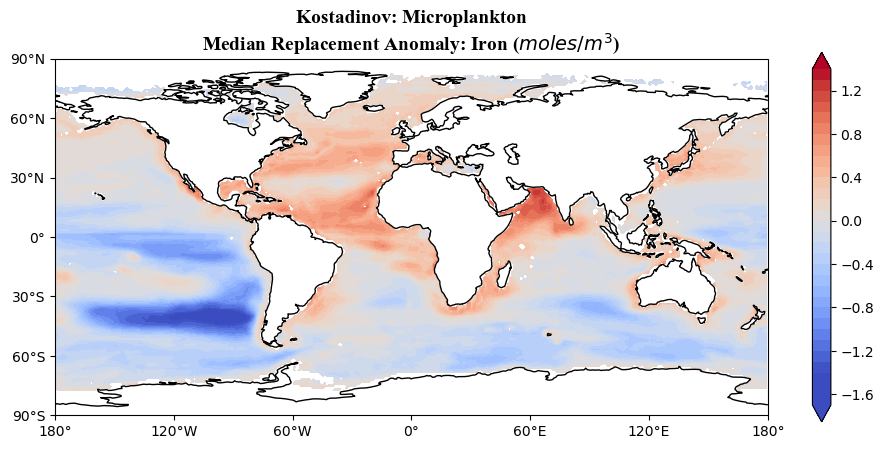

In [137]:
med_sensitivity_plot(no35m, psc='logmcro', levels=np.linspace(-1.7,1.4,32), vmin=-1.7, vmax=1.4,
                     title ="Kostadinov: Microplankton\nMedian Replacement Anomaly: Nitrate ($moles/m^3$)",
                     plot_name="kostadinov_medianplot_mcro_no3.jpg")

In [138]:
dif = (no35m['lognano_pred'] - no35m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-1.0575904546001489 0.7780903178892848


In [139]:
np.linspace(-1.1,1.0,22)

array([-1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,
        0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

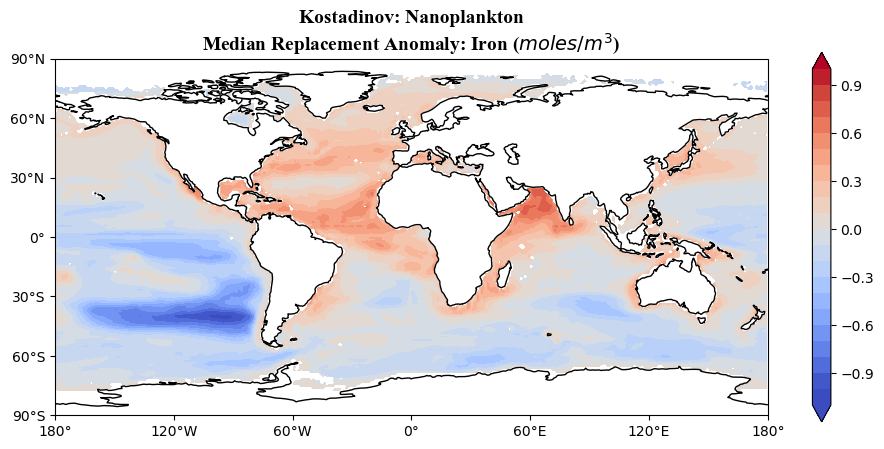

In [140]:
med_sensitivity_plot(no35m, psc='lognano', levels=np.linspace(-1.1,1.0,22), vmin=-1.1, vmax=1.0,
                     title ="Kostadinov: Nanoplankton\nMedian Replacement Anomaly: Nitrate ($moles/m^3$)",
                     plot_name="kostadinov_medianplot_nano_no3.jpg")

In [141]:
dif = (no35m['logpico_pred'] - no35m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.2817587659596513 0.25254542925872636


In [142]:
np.linspace(-0.3,0.3,13)

array([-0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,
        0.15,  0.2 ,  0.25,  0.3 ])

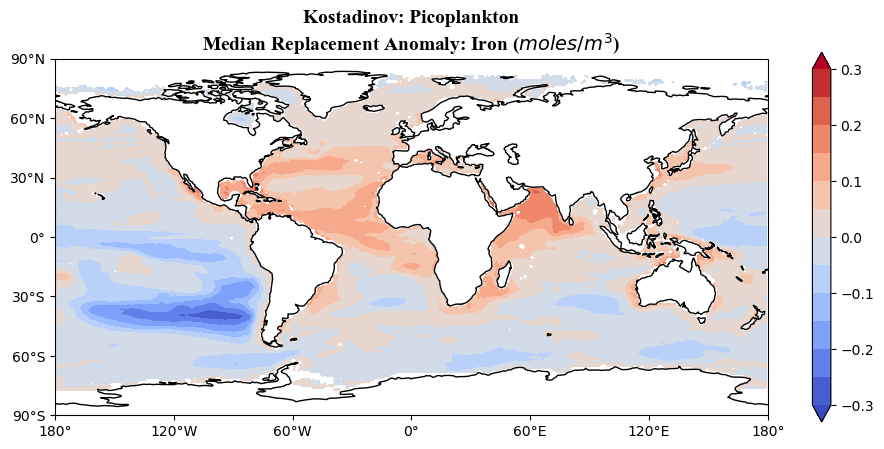

In [143]:
med_sensitivity_plot(no35m, psc='logpico', levels=np.linspace(-0.3,0.3,13), vmin=-0.3, vmax=0.3,
                     title ="Kostadinov: Picoplankton\nMedian Replacement Anomaly: Nitrate ($moles/m^3$)",
                     plot_name="kostadinov_medianplot_pico_no3.jpg")

#### $PO_4$

#### Shortwave radiation

In [71]:
rsn5m = median_dataset(Xs, df, 'rsn')

                         dfe       mld       nh4       no3       po4  \
month lat   lon                                                        
6     -8.5  -24.5   0.665441  0.449720  0.387506  0.079607  0.104854   
12    -61.5 -43.5   0.170599  0.420709  2.889186  5.433515  4.225600   
2      31.5  158.5  0.397651  1.211133  1.072117  0.132443  0.969578   
4      31.5 -56.5   0.634848  0.562860  1.344044  0.004289  0.231353   
2      15.5  54.5   0.781381  0.225525  0.930365  0.127694  1.367979   

                         rsn       sal       sst       sil       w50  
month lat   lon                                                       
6     -8.5  -24.5   5.471107  8.695061  8.219305  0.098790  5.092565  
12    -61.5 -43.5   5.471107  8.034607  0.434547  4.765074  5.183712  
2      31.5  158.5  5.471107  8.267775  5.596185  0.160100  5.107122  
4      31.5 -56.5   5.471107  8.857624  6.193583  0.046848  5.075429  
2      15.5  54.5   5.471107  8.657810  7.664246  0.096425  5.010911 

In [72]:
dif = (rsn5m['logphyc_pred'] - rsn5m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.8845552318277927 0.16300208930974636


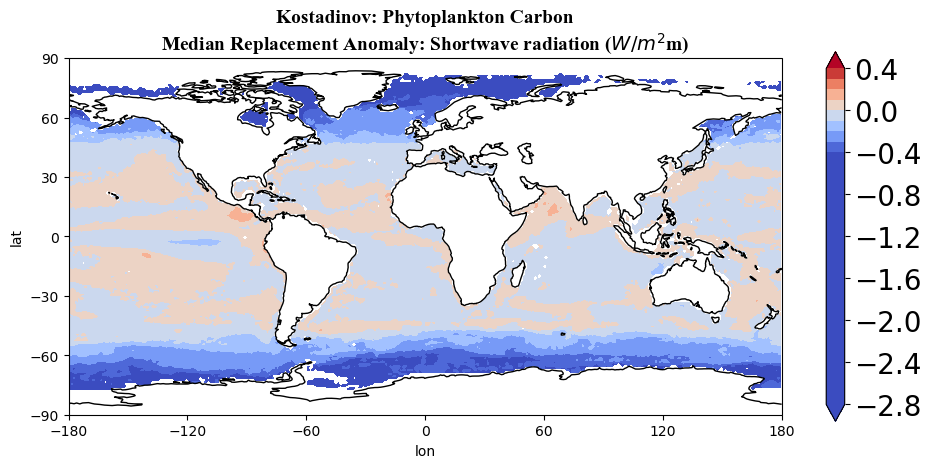

In [73]:
med_sensitivity_plot(
    rsn5m,
    psc='logphyc',
    levels=np.linspace(-2.8, 0.4, 33),
    vmin=-2.8, vmax=0.4,
    title ="Kostadinov: Phytoplankton Carbon\nMedian Replacement Anomaly: Shortwave radiation ($W/m^2$m)",
    plot_name="kostadinov_medianplot_phyc_rsn.png"
)

In [74]:
dif = (rsn5m['logmcro_pred'] - rsn5m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-2.335871470678578 0.2824815351849046


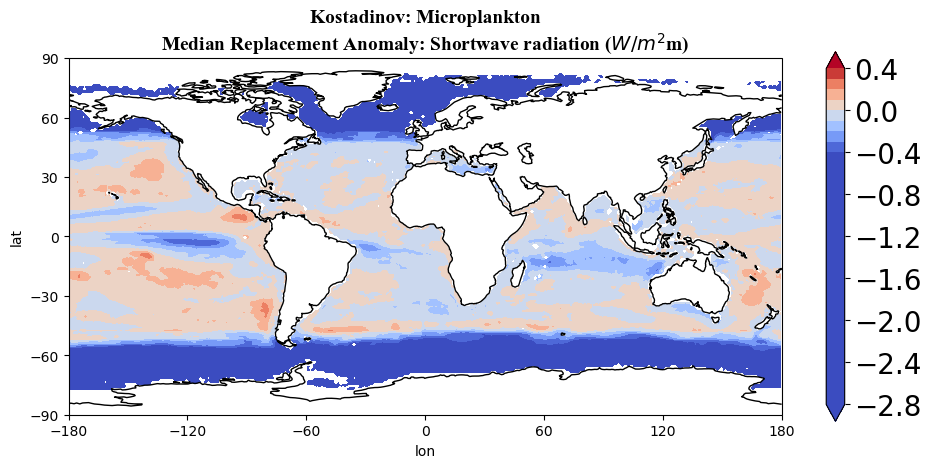

In [75]:
med_sensitivity_plot(
    rsn5m,
    psc='logmcro',
     levels=np.linspace(-2.8, 0.4, 33),
    vmin=-2.8, vmax=0.4,
    title ="Kostadinov: Microplankton\nMedian Replacement Anomaly: Shortwave radiation ($W/m^2$m)",
    plot_name="kostadinov_medianplot_mcro_rsn.png"
)

In [76]:
dif = (rsn5m['lognano_pred'] - rsn5m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-1.451291092750266 0.17542387935879278


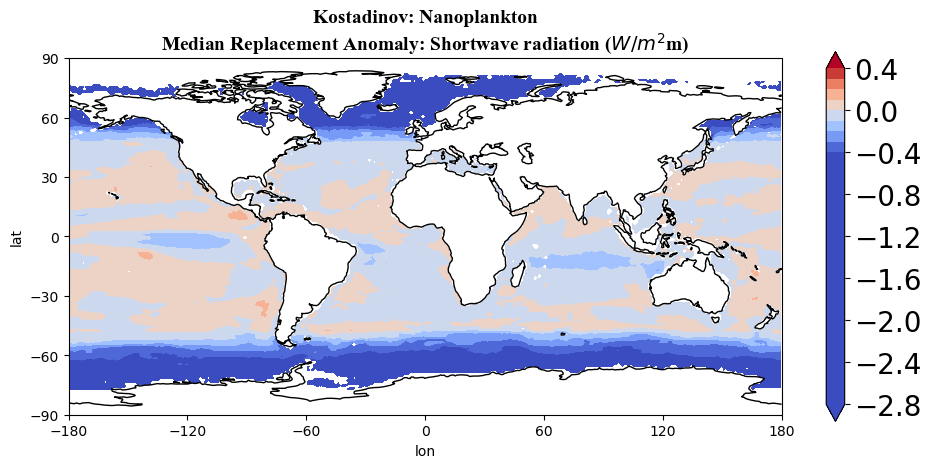

In [77]:
med_sensitivity_plot(
    rsn5m, 
    psc='lognano',
     levels=np.linspace(-2.8, 0.4, 33),
    vmin=-2.8, vmax=0.4,
    title ="Kostadinov: Nanoplankton\nMedian Replacement Anomaly: Shortwave radiation ($W/m^2$m)",
    plot_name="kostadinov_medianplot_nano_rsn.png"
)

In [78]:
dif = (rsn5m['logpico_pred'] - rsn5m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.43039701458162005 0.04832575991023491


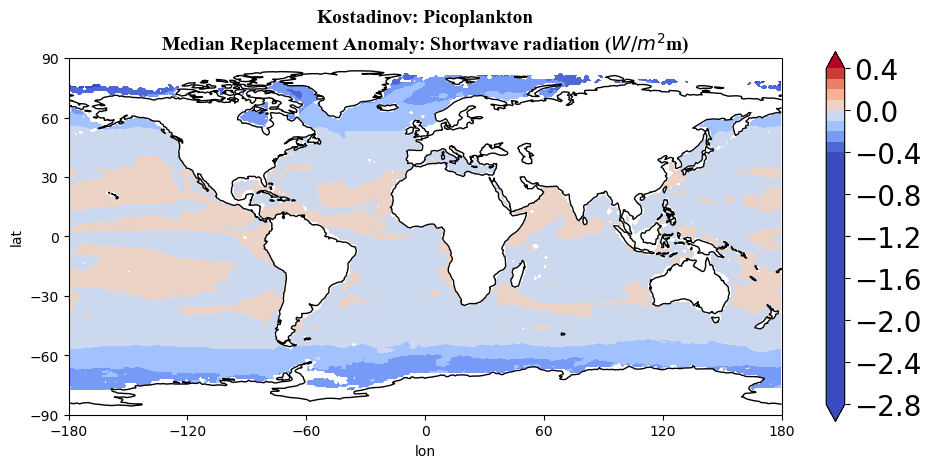

In [79]:
med_sensitivity_plot(
    rsn5m,
    psc='logpico',
     levels=np.linspace(-2.8, 0.4, 33),
    vmin=-2.8, vmax=0.4,
    title ="Kostadinov: Picoplankton\nMedian Replacement Anomaly: Shortwave radiation ($W/m^2$m)",
    plot_name="kostadinov_medianplot_pico_rsn.png"
)

#### Salinity

#### Sea Surface Temperature

In [80]:
tos5m = median_dataset(Xs, df, 'sst')

                         dfe       mld       nh4       no3       po4  \
month lat   lon                                                        
6     -8.5  -24.5   0.665441  0.449720  0.387506  0.079607  0.104854   
12    -61.5 -43.5   0.170599  0.420709  2.889186  5.433515  4.225600   
2      31.5  158.5  0.397651  1.211133  1.072117  0.132443  0.969578   
4      31.5 -56.5   0.634848  0.562860  1.344044  0.004289  0.231353   
2      15.5  54.5   0.781381  0.225525  0.930365  0.127694  1.367979   

                         rsn       sal       sst       sil       w50  
month lat   lon                                                       
6     -8.5  -24.5   6.470441  8.695061  5.569504  0.098790  5.092565  
12    -61.5 -43.5   4.265459  8.034607  5.569504  4.765074  5.183712  
2      31.5  158.5  3.757851  8.267775  5.569504  0.160100  5.107122  
4      31.5 -56.5   7.015062  8.857624  5.569504  0.046848  5.075429  
2      15.5  54.5   7.310499  8.657810  5.569504  0.096425  5.010911 

In [81]:
dif = (tos5m['logphyc_pred'] - tos5m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.36585668879752564 0.3342439316619048


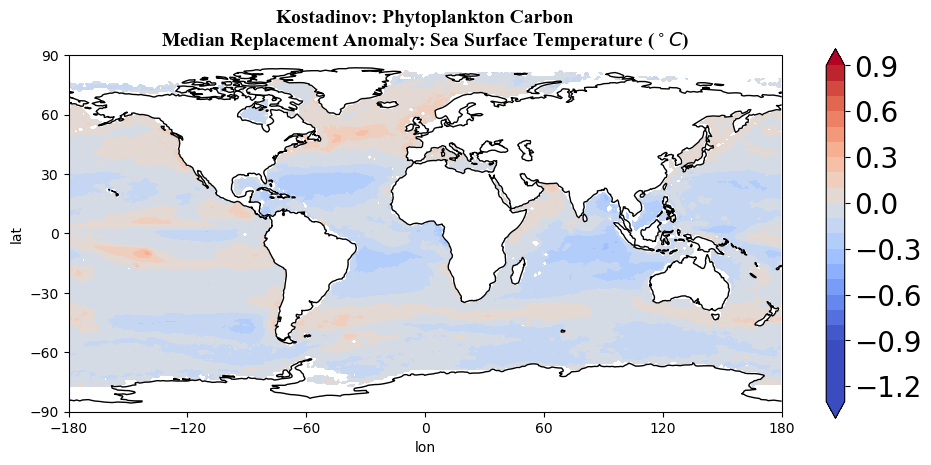

In [82]:
med_sensitivity_plot(
    tos5m,
    psc='logphyc',
    levels=np.linspace(-1.3, 0.9, 23),
    vmin=-1.3, vmax=0.9,
    title ="Kostadinov: Phytoplankton Carbon\nMedian Replacement Anomaly: Sea Surface Temperature ($^\circ C$)",
    plot_name="kostadinov_medianplot_phyc_sst.png"
)

In [83]:
dif = (tos5m['logmcro_pred'] - tos5m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.731247319343387 0.8074458679444665


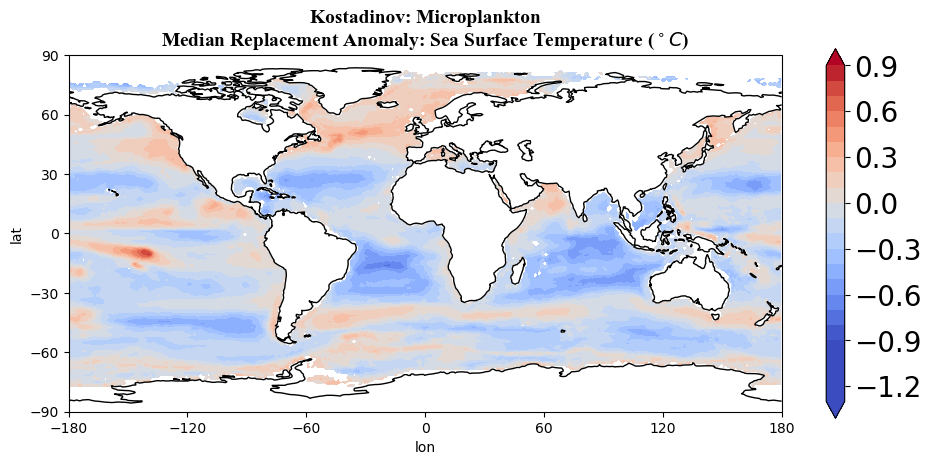

In [84]:
med_sensitivity_plot(
    tos5m,
    psc='logmcro',
    levels=np.linspace(-1.3, 0.9, 23),
    vmin=-1.3, vmax=0.9,
    title ="Kostadinov: Microplankton\nMedian Replacement Anomaly: Sea Surface Temperature ($^\circ C$)",
    plot_name="kostadinov_medianplot_mcro_sst.png"
)

In [85]:
dif = (tos5m['lognano_pred'] - tos5m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.5246423097637982 0.5038124977882443


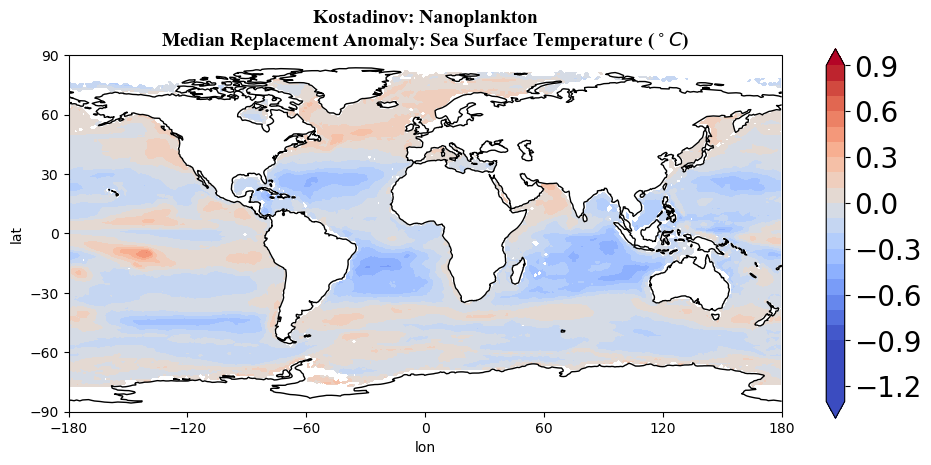

In [86]:
med_sensitivity_plot(
    tos5m,
    psc='lognano',
    levels=np.linspace(-1.3, 0.9, 23),
    vmin=-1.3, vmax=0.9,
    title ="Kostadinov: Nanoplankton\nMedian Replacement Anomaly: Sea Surface Temperature ($^\circ C$)",
    plot_name="kostadinov_medianplot_nano_sst.png"
)

In [87]:
dif = (tos5m['logpico_pred'] - tos5m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.16217622034448764 0.14006172437642084


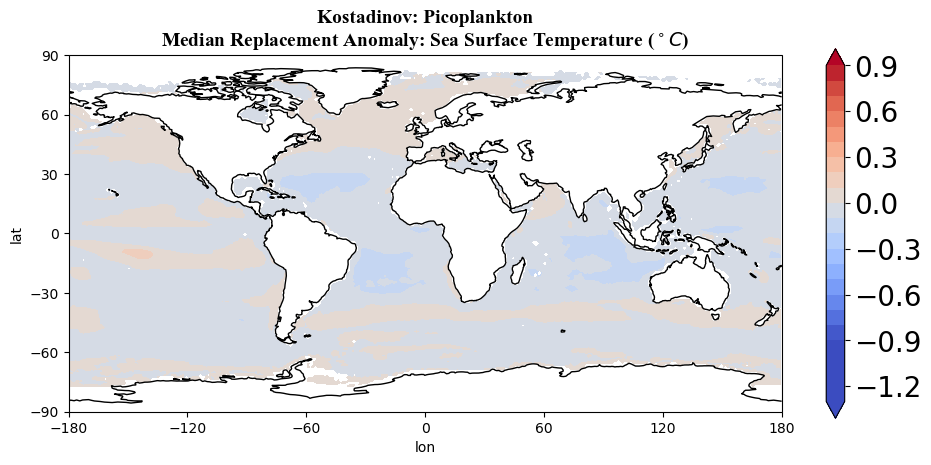

In [88]:
med_sensitivity_plot(
    tos5m,
    psc='logpico',
    levels=np.linspace(-1.3, 0.9, 23),
    vmin=-1.3, vmax=0.9,
    title ="Kostadinov: Picoplankton\nMedian Replacement Anomaly: Sea Surface Temperature ($^\circ C$)",
    plot_name="kostadinov_medianplot_pico_sst.png"
)

#### Silicate

In [109]:
sil5m = median_dataset(Xs, df, 'sil')

                          dfe        mld        nh4        no3        po4  \
month lat   lon                                                             
12     20.5  166.5  11.292623  14.512061  11.177777  10.167632  10.056864   
9     -54.5 -17.5   12.154463  19.200516  17.248332  53.323250  57.338347   
12    -20.5  51.5   14.975279  11.726705  10.252635  10.119815  16.213917   
2      32.5 -64.5   18.137054  22.892751  20.826146  10.637976  12.115161   
4     -1.5  -36.5   19.590802  11.932175  10.541419  10.430315  12.653270   

                          rsn        sst        sal        w50        sil  
month lat   lon                                                            
12     20.5  166.5  55.971230  83.249952  85.005639  54.727963  12.106047  
9     -54.5 -17.5   28.556722  15.756409  81.997844  55.891148  12.106047  
12    -20.5  51.5   88.729820  83.410777  85.211348  54.658092  12.106047  
2      32.5 -64.5   44.350637  64.657645  89.491630  54.534533  12.106047  
4   

In [110]:
dif = (sil5m['logphyc_pred'] - sil5m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.13732022869946547 0.18623371256897503


In [111]:
np.linspace(-0.2,0.2,5)

array([-0.2, -0.1,  0. ,  0.1,  0.2])

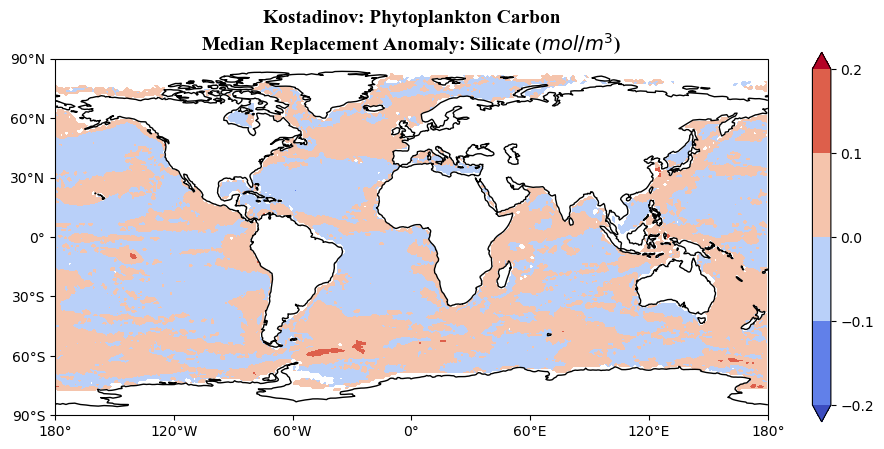

In [192]:
med_sensitivity_plot(sil5m, psc='logphyc', levels=np.linspace(-0.2,0.2,5), vmin=-0.2, vmax=0.2,
                     title ="Kostadinov: Phytoplankton Carbon\nMedian Replacement Anomaly: Silicate ($mol/m^3$)",
                     plot_name="kostadinov_medianplot_phyc_sil.jpg")

In [112]:
dif = (sil5m['logmcro_pred'] - sil5m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.2959991710345994 0.46028509158952535


In [113]:
np.linspace(-0.3,0.5,9)

array([-3.00000000e-01, -2.00000000e-01, -1.00000000e-01,  5.55111512e-17,
        1.00000000e-01,  2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
        5.00000000e-01])

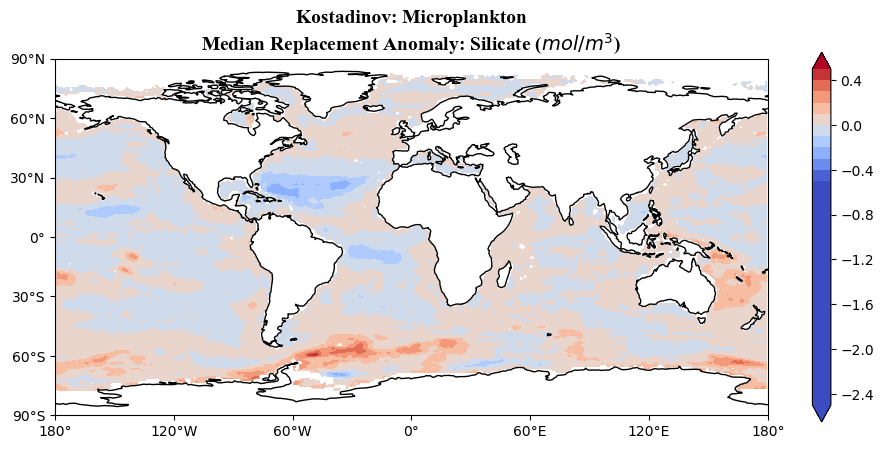

In [114]:
med_sensitivity_plot(sil5m, psc='logmcro', levels=np.linspace(-2.5,0.5,31), vmin=-2.5, vmax=0.5,
                     title ="Kostadinov: Microplankton\nMedian Replacement Anomaly: Silicate ($mol/m^3$)",
                     plot_name="kostadinov_medianplot_mcro_sil.jpg")

In [115]:
dif = (sil5m['lognano_pred'] - sil5m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.23302297466137606 0.2452566737865109


In [116]:
np.linspace(-0.3,0.3,7)

array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3])

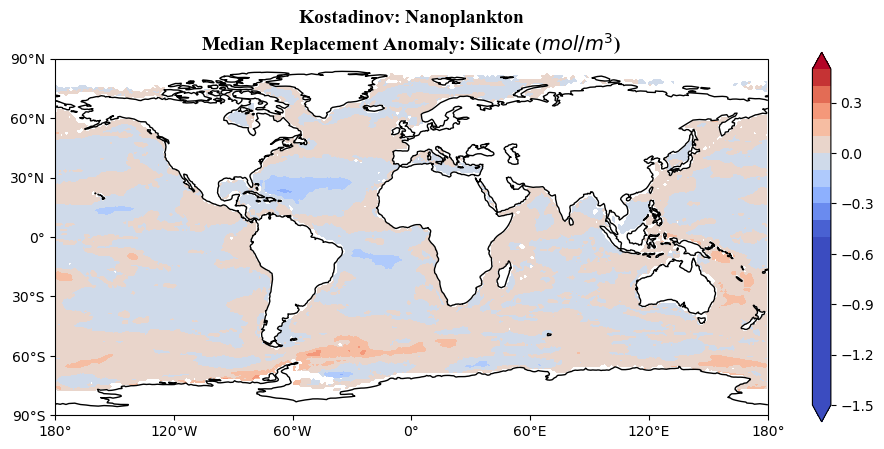

In [117]:
med_sensitivity_plot(sil5m, psc='lognano', levels=np.linspace(-1.5,0.5,21), vmin=-1.5, vmax=0.5,
                     title ="Kostadinov: Nanoplankton\nMedian Replacement Anomaly: Silicate ($mol/m^3$)",
                     plot_name="kostadinov_medianplot_nano_sil.jpg")

In [118]:
dif = (sil5m['logpico_pred'] - sil5m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.07119468941913021 0.09666581257778839


In [119]:
np.linspace(-0.1,0.1,5)

array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ])

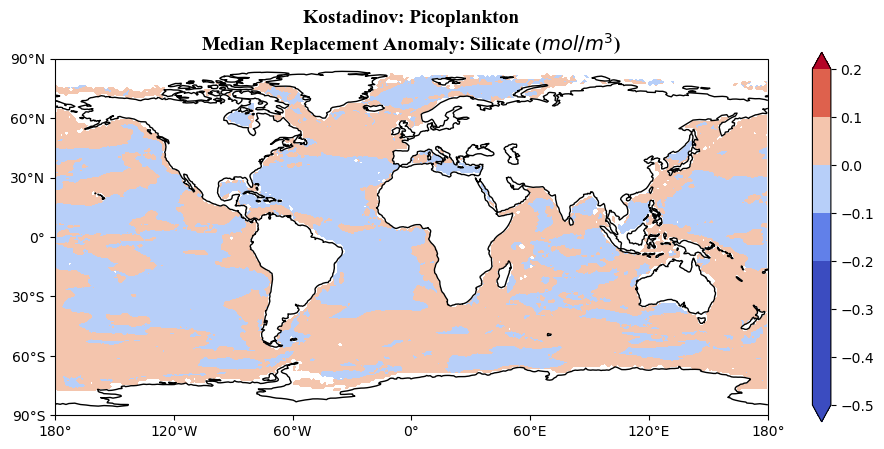

In [120]:
med_sensitivity_plot(sil5m, psc='logpico', levels=np.linspace(-0.5,0.2,8), vmin=-0.5, vmax=0.2,
                     title ="Kostadinov: Picoplankton\nMedian Replacement Anomaly: Silicate ($mol/m^3$)",
                     plot_name="kostadinov_medianplot_pico_sil.jpg")

#### Upwelling at 50 m depth

In [40]:
from sklearn.inspection import PartialDependenceDisplay

In [56]:
features = X.columns

In [131]:
Xs = scaler.transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

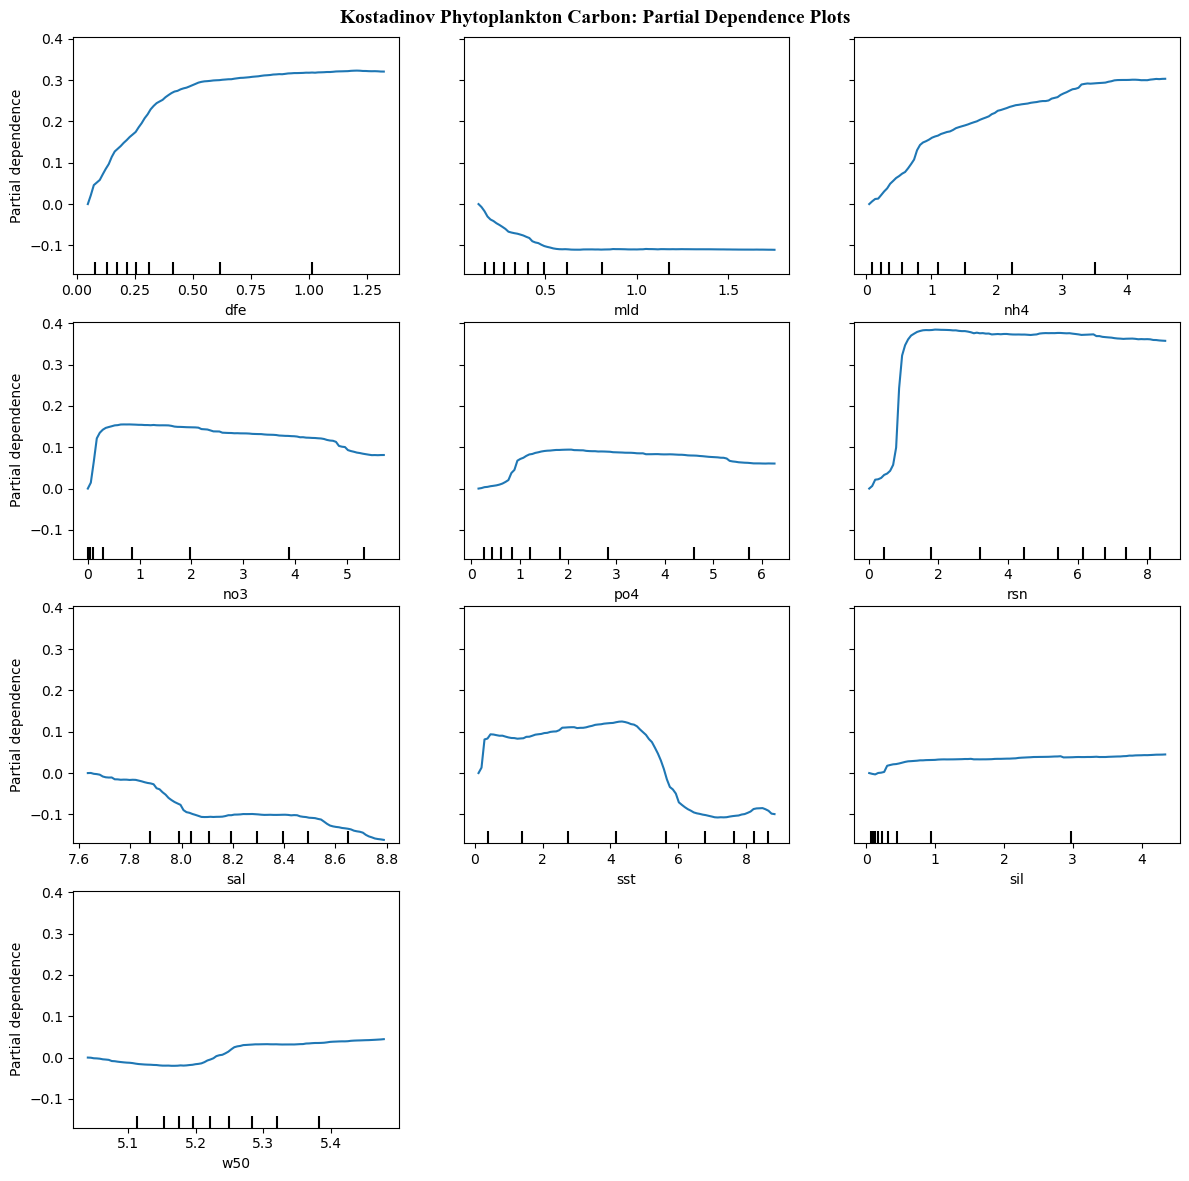

In [57]:
fig, ax = plt.subplots(figsize=(12,12), dpi=100)
PartialDependenceDisplay.from_estimator(model_phyc, Xs_test, features, grid_resolution=100, ax=ax,  kind='average', centered=True)
fig.suptitle("Kostadinov Phytoplankton Carbon: Partial Dependence Plots", fontsize=14, fontweight='bold', color='black', family='Times New Roman')
plt.tight_layout()
# fig.savefig(chartpath + "kostadinov_PDP_avg_phyc.jpg", dpi=200,bbox_inches='tight')

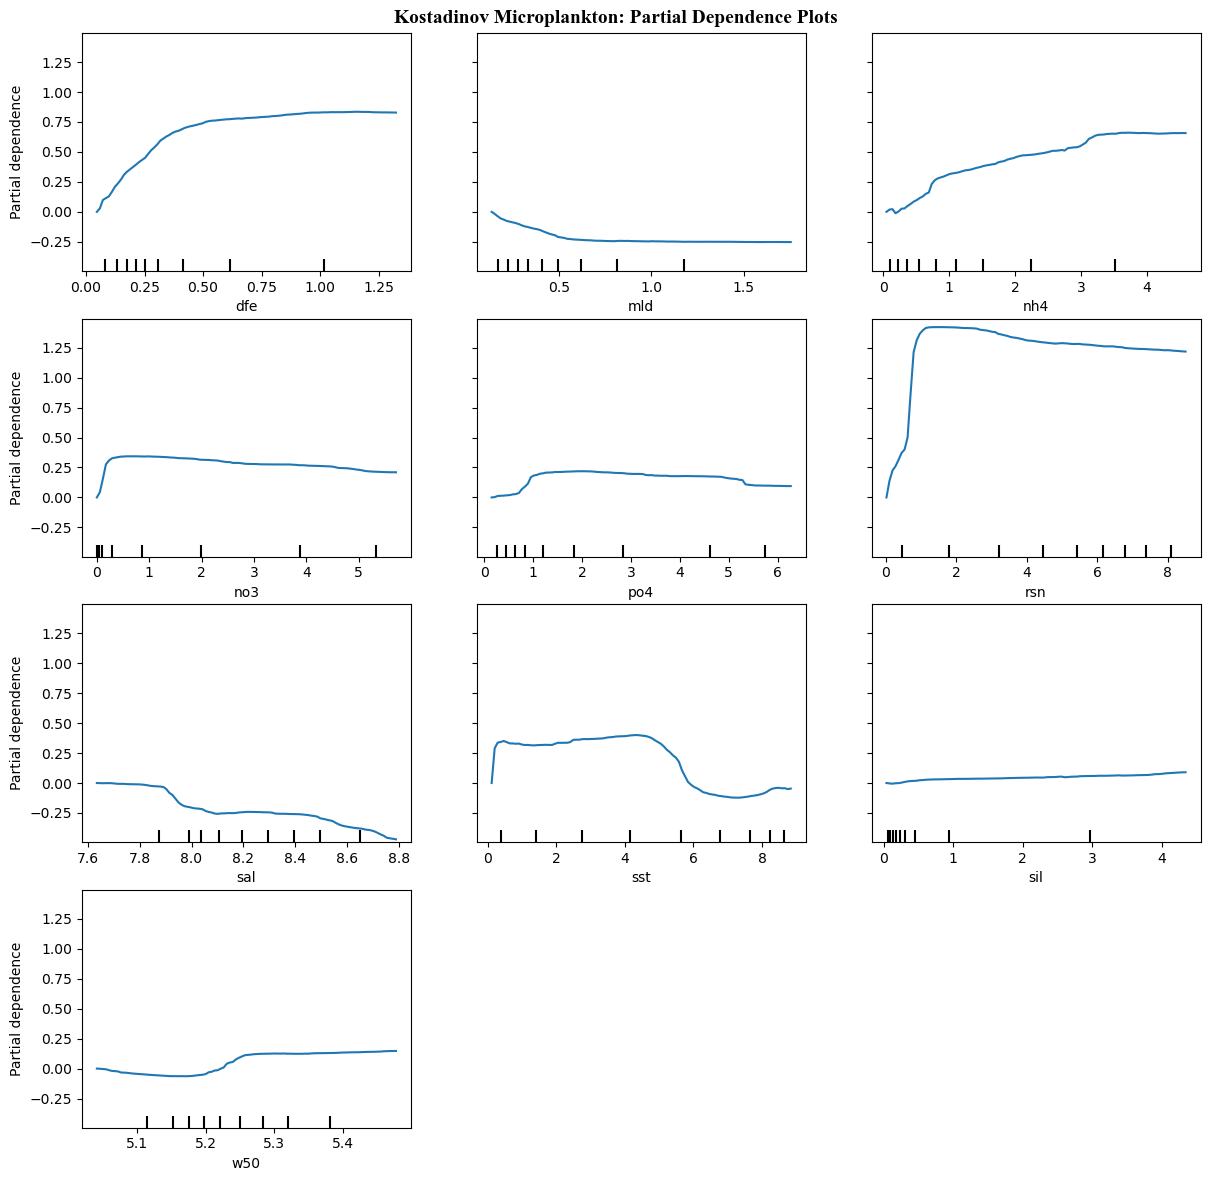

In [58]:
fig, ax = plt.subplots(figsize=(12,12), dpi=100)
PartialDependenceDisplay.from_estimator(model_mcro, Xs_test, features, grid_resolution=100, ax=ax, kind='average', centered=True)
fig.suptitle("Kostadinov Microplankton: Partial Dependence Plots", fontsize=14, fontweight='bold', color='black', family='Times New Roman')
plt.tight_layout()
# fig.savefig(chartpath + "kostadinov_PDP_avg_mcro.jpg", dpi=200,bbox_inches='tight')

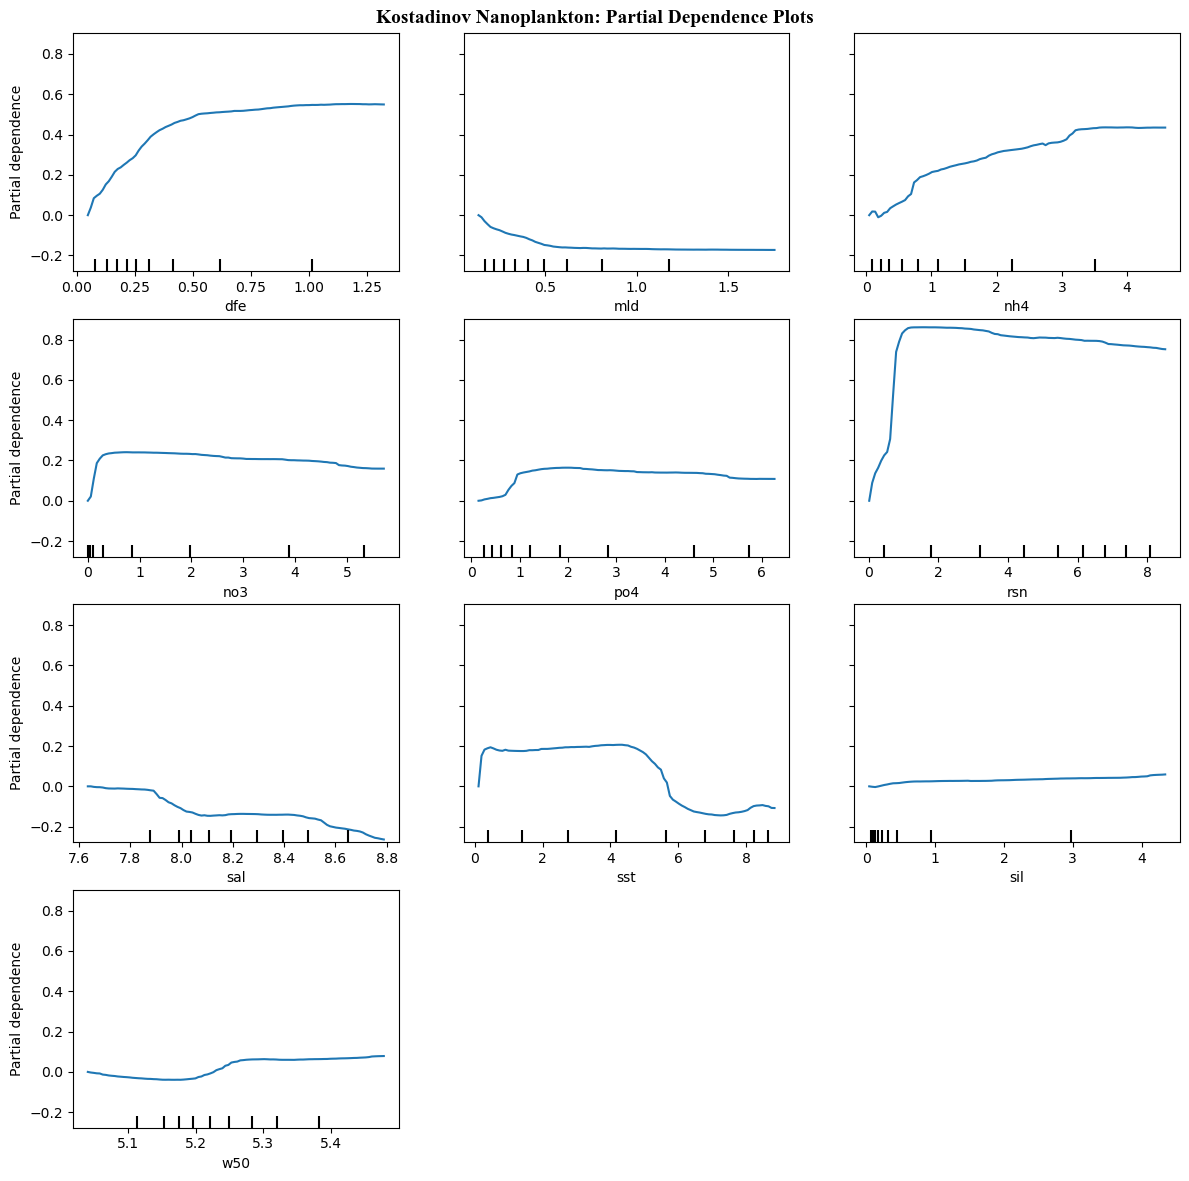

In [59]:
fig, ax = plt.subplots(figsize=(12,12), dpi=100)
PartialDependenceDisplay.from_estimator(model_nano, Xs_test, features, grid_resolution=100, ax=ax, kind='average', centered=True)
fig.suptitle("Kostadinov Nanoplankton: Partial Dependence Plots", fontsize=14, fontweight='bold', color='black', family='Times New Roman')
plt.tight_layout()
# fig.savefig(chartpath + "kostadinov_PDP_avg_nano.jpg", dpi=200,bbox_inches='tight')

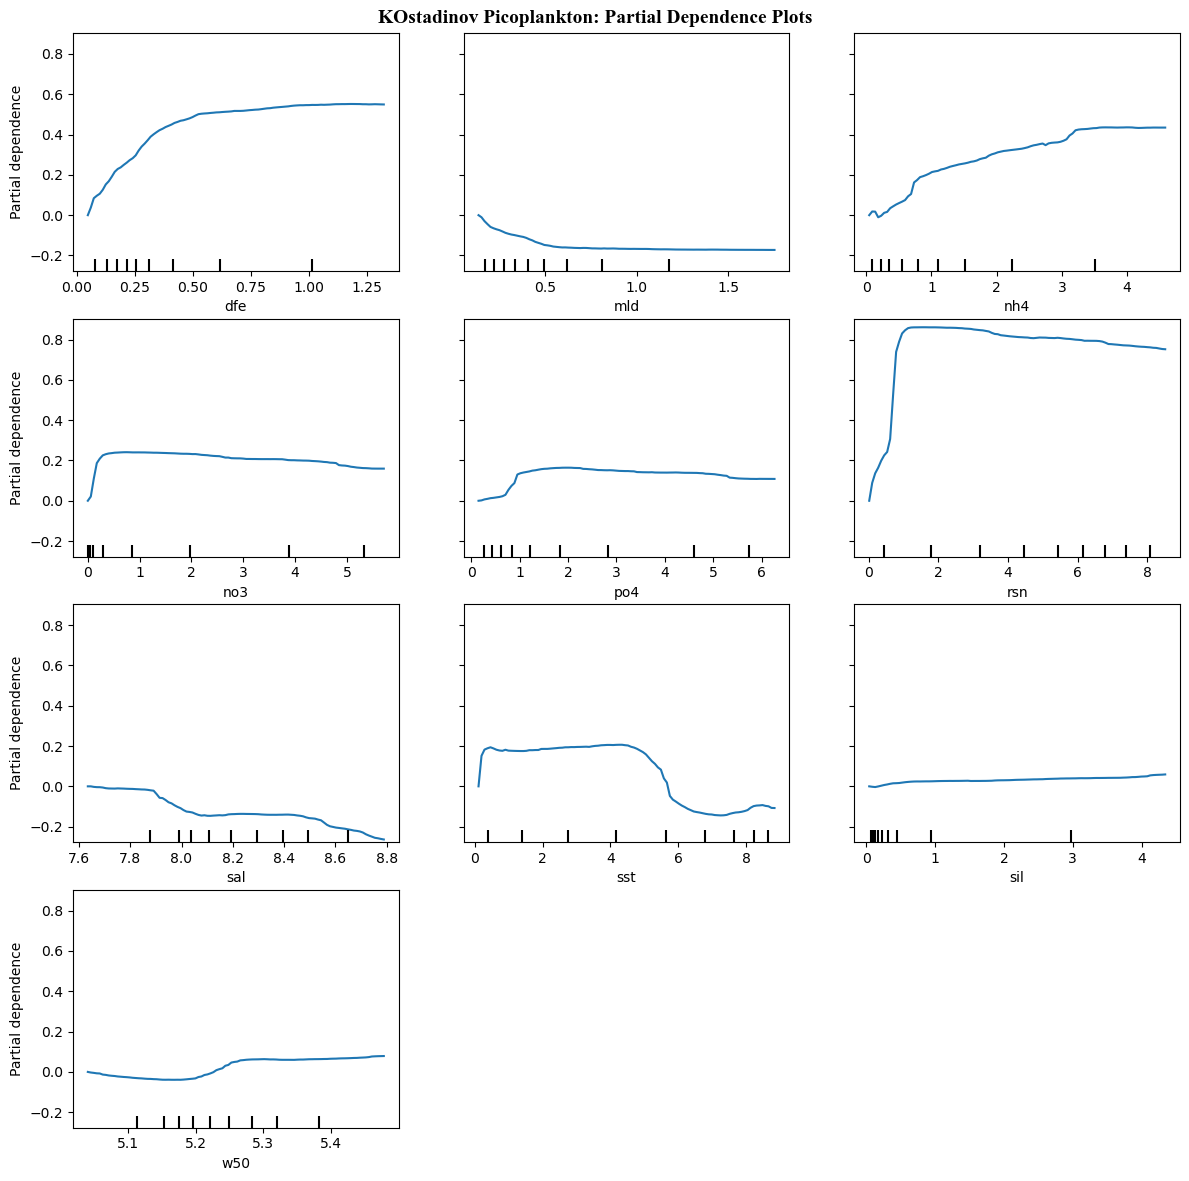

In [60]:
fig, ax = plt.subplots(figsize=(12,12), dpi=100)
PartialDependenceDisplay.from_estimator(model_nano, Xs_test, features, grid_resolution=100, ax=ax, kind='average', centered=True)
fig.suptitle("KOstadinov Picoplankton: Partial Dependence Plots", fontsize=14, fontweight='bold', color='black', family='Times New Roman')
plt.tight_layout()
# fig.savefig(chartpath + "kostadinov_PDP_avg_pico.jpg", dpi=200,bbox_inches='tight')

In [90]:
Xs = scaler.transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)
Xs.head(10)

dfe        mld        nh4        no3        po4        rsn  \
0  11.462206  13.581675  58.658949  26.248728  38.188636  68.905874   
1  12.694563  14.712607  12.749113  10.103303  19.376561  49.781728   
2  11.837218  11.745171  13.639330  10.407682  16.039722  86.968340   
3  13.307872  10.879562  37.733247  12.699594  26.361810  82.010544   
4  11.631951  17.490987  47.173712  56.323019  65.851275  60.401152   
5  10.632198  13.358560  17.647167  12.911216  19.164279  60.625756   
6  11.469914  12.521793  10.390660  10.019230  12.285431  82.709987   
7  11.688240  12.136999  19.857195  10.000436  12.363089  71.208162   
8  10.532056  15.867456  21.930123  12.956852  16.778968  28.086195   
9  16.597169  12.186124  16.109112  10.650794  17.411041  21.123133   

         sal        sil        sst        w50  
0  82.838357  10.662706  38.997908  56.078031  
1  80.707324  11.133026  56.431829  56.086060  
2  86.864201  12.389064  69.360924  55.948773  
3  84.902204  11.681755  68.203949  57.722307  
4  82.017529  32.687218  18.182667  57.172059  
5  83.698111  13.859672  82.990322  59.533508  
6  83.973621  10.293268  90.002012  56.030556  
7  83.676613  10.467124  91.815819  58.969588  
8  83.581149  11.617579  54.105355  56.380620  
9  83.940835  11.459062  26.976364  56.354860

In [52]:
Xs = scaler.transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)
Xs.head(10)

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.104457  0.761108  7.436466  8.481353   
1  0.283760  1.060358  1.004340  4.666372  4.576242  0.567122  7.982099   
2  0.260560  3.080589  1.602195  3.525147  4.137038  4.699015  8.095158   
3  1.202926  0.225414  0.498177  0.319772  0.188506  8.179508  8.671367   
4  1.465587  0.368392  1.156684  0.451886  1.849533  5.122070  8.808647   
5  0.331540  0.310598  0.336598  0.227693  0.541567  3.893048  8.153030   
6  0.278205  1.119019  0.881136  4.348998  5.547922  0.884768  7.954805   
7  1.682229  0.162754  0.255256  0.026197  0.515962  7.267656  8.645078   
8  0.628326  0.316838  1.201456  0.592111  2.395658  1.548001  7.785245   
9  0.020530  0.336880  1.871010  0.690265  0.736925  3.547870  8.076701   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251  
5  6.229070  0.394697  5.000435  
6  1.527507  1.238589  5.112624  
7  8.218934  0.126744  5.130953  
8  1.362779  0.358698  4.991003  
9  5.544837  0.123852  5.042342

In [53]:
re_orig={}
r2_orig={}
rn_orig={}

In [54]:
yphyc_pred = model_phyc.predict(Xs)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_orig['phyc']=re
rn_orig['phyc']=rn
r2_orig['phyc']=r2

In [55]:
ymcro_pred = model_mcro.predict(Xs)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
rn = re/ymcro.std()
r2 = r2_score(ymcro, ymcro_pred)
re_orig['mcro']=re
rn_orig['mcro']=rn
r2_orig['mcro']=r2

In [56]:
ynano_pred = model_nano.predict(Xs)
re = mean_squared_error(ynano, ynano_pred, squared=False)
rn = re/ynano.std()
r2 = r2_score(ynano, ynano_pred)
re_orig['nano']=re
rn_orig['nano']=rn
r2_orig['nano']=r2

In [57]:
ypico_pred = model_pico.predict(Xs)
re = mean_squared_error(ypico, ypico_pred, squared=False)
rn = re/ypico.std()
r2 = r2_score(ypico, ypico_pred)
re_orig['pico']=re
rn_orig['pico']=rn
r2_orig['pico']=r2

In [58]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

In [59]:
re_orig

{'phyc': 0.07919056231543614,
 'mcro': 0.21623967985431358,
 'nano': 0.12913667006811202,
 'pico': 0.040330079845073814}

In [60]:
r2_orig

{'phyc': 0.9409576858205209,
 'mcro': 0.938417822339541,
 'nano': 0.9437806271565229,
 'pico': 0.9370479363263082}

In [61]:
rn_test

{'phyc': 0.35, 'mcro': 0.3, 'nano': 0.28, 'pico': 0.3}

In [62]:
re_test

{'phyc': 0.11, 'mcro': 0.26, 'nano': 0.15, 'pico': 0.05}

In [63]:
r2_orig

{'phyc': 0.9409576858205209,
 'mcro': 0.938417822339541,
 'nano': 0.9437806271565229,
 'pico': 0.9370479363263082}

#### Sensitivity Shortwave Radiation

In [64]:
re_rsn={}
r2_rsn = {}
rn_rsn = {}

In [65]:
X5rsn = Xs.copy(deep=True)
for col in X5rsn.columns:
    if col == 'rsn':
        X5rsn[col] = X5rsn[col].quantile(q=0.5, interpolation='linear')
    else:
        X5rsn[col] = X5rsn[col]

In [66]:
X5rsn.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.104457  0.761108  5.437046  8.481353   
1  0.283760  1.060358  1.004340  4.666372  4.576242  5.437046  7.982099   
2  0.260560  3.080589  1.602195  3.525147  4.137038  5.437046  8.095158   
3  1.202926  0.225414  0.498177  0.319772  0.188506  5.437046  8.671367   
4  1.465587  0.368392  1.156684  0.451886  1.849533  5.437046  8.808647   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251

In [67]:
yphyc_pred = model_phyc.predict(X5rsn)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_rsn['phyc']=re
r2_rsn['phyc']=r2
rn_rsn['phyc']=rn

RMSE: 0.2768300101159057
Normalised RMSE: 0.8494169515294862
R2_score: 0.27848916885024755


In [68]:
ymcro_pred = model_mcro.predict(X5rsn)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_rsn['mcro']=re
r2_rsn['mcro']=r2
rn_rsn['mcro']=rn

RMSE: 0.7857248174690691
Normalised RMSE: 0.9017000598327708
R2_score: 0.1869351161271069


In [69]:
ynano_pred = model_nano.predict(X5rsn)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_rsn['nano']=re
r2_rsn['nano']=r2
rn_rsn['nano']=rn

RMSE: 0.4794796519009707
Normalised RMSE: 0.8803656571247519
R2_score: 0.22495451197259209


In [70]:
ypico_pred = model_pico.predict(X5rsn)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)
re_rsn['pico']=re
r2_rsn['pico']=r2
rn_rsn['pico']=rn

RMSE: 0.1400732445641909
Normalised RMSE: 0.8714261510587727
R2_score PICO : 0.24061470179355104


In [71]:
rn_rsn

{'phyc': 0.8494169515294862,
 'mcro': 0.9017000598327708,
 'nano': 0.8803656571247519,
 'pico': 0.8714261510587727}

In [72]:
rn_test

{'phyc': 0.35, 'mcro': 0.3, 'nano': 0.28, 'pico': 0.3}

In [73]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity Iron

In [74]:
re_dfe={}
rn_dfe={}
r2_dfe={}

In [75]:
X5dfe = Xs.copy(deep=True)
for col in X5dfe.columns:
    if col == 'dfe':
        X5dfe[col] = X5dfe[col].quantile(q=0.5, interpolation='linear')
    else:
        X5dfe[col] = X5dfe[col]

In [76]:
X5dfe.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.301156  0.414013  2.350783  0.104457  0.761108  7.436466  8.481353   
1  0.301156  1.060358  1.004340  4.666372  4.576242  0.567122  7.982099   
2  0.301156  3.080589  1.602195  3.525147  4.137038  4.699015  8.095158   
3  0.301156  0.225414  0.498177  0.319772  0.188506  8.179508  8.671367   
4  0.301156  0.368392  1.156684  0.451886  1.849533  5.122070  8.808647   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251

In [77]:
yphyc_pred = model_phyc.predict(X5dfe)
re = mean_squared_error(yphyc,yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn=re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_dfe['phyc']=re
r2_dfe['phyc']=r2
rn_dfe['phyc']=rn

RMSE: 0.20454663681917906
Normalised RMSE: 0.6276248034662526
R2_score: 0.6060861923582586


In [78]:
ymcro_pred = model_mcro.predict(X5dfe)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_dfe['mcro']=re
r2_dfe['mcro']=r2
rn_dfe['mcro']=rn

RMSE: 0.5285086188563476
Normalised RMSE: 0.6065180106948369
R2_score: 0.6321350494099497


In [79]:
ynano_pred = model_nano.predict(X5dfe)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_dfe['nano']=re
r2_dfe['nano']=r2
rn_dfe['nano']=rn

RMSE: 0.32732612560136215
Normalised RMSE: 0.6009987671357089
R2_score: 0.6387996440669786


In [80]:
ypico_pred = model_pico.predict(X5dfe)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)
re_dfe['pico']=re
r2_dfe['pico']=r2
rn_dfe['pico']=rn

RMSE: 0.08856270808970497
Normalised RMSE: 0.5509678888218094
R2_score PICO : 0.6964336813399207


In [81]:
rn_dfe

{'phyc': 0.6276248034662526,
 'mcro': 0.6065180106948369,
 'nano': 0.6009987671357089,
 'pico': 0.5509678888218094}

In [82]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity SST

In [83]:
re_tos={}
rn_tos={}
r2_tos={}

In [84]:
X5tos = Xs.copy(deep=True)
for col in X5tos.columns:
    if col == 'sst':
        X5tos[col] = X5tos[col].quantile(q=0.5, interpolation='linear')
    else:
        X5tos[col] = X5tos[col]

In [85]:
X5tos.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.104457  0.761108  7.436466  8.481353   
1  0.283760  1.060358  1.004340  4.666372  4.576242  0.567122  7.982099   
2  0.260560  3.080589  1.602195  3.525147  4.137038  4.699015  8.095158   
3  1.202926  0.225414  0.498177  0.319772  0.188506  8.179508  8.671367   
4  1.465587  0.368392  1.156684  0.451886  1.849533  5.122070  8.808647   

        sst       sil       w50  
0  5.569504  0.283637  5.031347  
1  5.569504  0.642373  5.124153  
2  5.569504  0.336277  5.054535  
3  5.569504  0.308014  4.941598  
4  5.569504  0.214157  4.971251

In [86]:
yphyc_pred = model_phyc.predict(X5tos)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_tos['phyc']=re
r2_tos['phyc']=r2
rn_tos['phyc']=rn

RMSE: 0.17807288809813923
Normalised RMSE: 0.5463935419972806
R2_score: 0.7014534047601214


In [87]:
ymcro_pred = model_mcro.predict(X5tos)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_tos['mcro']=re
r2_tos['mcro']=r2
rn_tos['mcro']=rn

RMSE: 0.4145912974650459
Normalised RMSE: 0.47578616510365535
R2_score: 0.7736270000052765


In [88]:
ynano_pred = model_nano.predict(X5tos)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_tos['nano']=re
r2_tos['nano']=r2
rn_tos['nano']=rn

RMSE: 0.2565326321697328
Normalised RMSE: 0.47101585729167395
R2_score: 0.778143547565227


In [89]:
ypico_pred = model_pico.predict(X5tos)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)
re_tos['pico']=re
r2_tos['pico']=r2
rn_tos['pico']=rn

RMSE: 0.08545889523550258
Normalised RMSE: 0.531658393296382
R2_score PICO : 0.7173386971811144


In [90]:
rn_tos

{'phyc': 0.5463935419972806,
 'mcro': 0.47578616510365535,
 'nano': 0.47101585729167395,
 'pico': 0.531658393296382}

In [91]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity MLD

In [92]:
re_mld={}
rn_mld={}
r2_mld={}

In [93]:
X5mld = Xs.copy(deep=True)
for col in X5mld.columns:
    if col == 'mld':
        X5mld[col] = X5mld[col].quantile(q=0.5, interpolation='linear')
    else:
        X5mld[col] = X5mld[col]

In [94]:
X5mld.head()

dfe      mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.40509  2.350783  0.104457  0.761108  7.436466  8.481353   
1  0.283760  0.40509  1.004340  4.666372  4.576242  0.567122  7.982099   
2  0.260560  0.40509  1.602195  3.525147  4.137038  4.699015  8.095158   
3  1.202926  0.40509  0.498177  0.319772  0.188506  8.179508  8.671367   
4  1.465587  0.40509  1.156684  0.451886  1.849533  5.122070  8.808647   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251

In [95]:
yphyc_pred = model_phyc.predict(X5mld)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_mld['phyc']=re
r2_mld['phyc']=r2
rn_mld['phyc']=rn

RMSE: 0.12954610661475188
Normalised RMSE: 0.3974954121381001
R2_score: 0.8419970308281939


In [96]:
ymcro_pred = model_mcro.predict(X5mld)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_mld['mcro']=re
r2_mld['mcro']=r2
rn_mld['mcro']=rn

RMSE: 0.32950208944103804
Normalised RMSE: 0.378137545306316
R2_score: 0.8570116651565811


In [97]:
ynano_pred = model_nano.predict(X5mld)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_mld['nano']=re
r2_mld['nano']=r2
rn_mld['nano']=rn

RMSE: 0.19849806209184973
Normalised RMSE: 0.3644594221645369
R2_score: 0.8671690214829482


In [98]:
ypico_pred = model_pico.predict(X5mld)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score :",r2)
re_mld['pico']=re
r2_mld['pico']=r2
rn_mld['pico']=rn

RMSE: 0.061346243025470364
Normalised RMSE: 0.3816483341121107
R2_score : 0.8543442112087374


In [99]:
rn_mld

{'phyc': 0.3974954121381001,
 'mcro': 0.378137545306316,
 'nano': 0.3644594221645369,
 'pico': 0.3816483341121107}

In [100]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity $NH_4$

In [101]:
re_nh4={}
rn_nh4={}
r2_nh4={}

In [102]:
X5nh4 = Xs.copy(deep=True)
for col in X5nh4.columns:
    if col == 'nh4':
        X5nh4[col] = X5nh4[col].quantile(q=0.5, interpolation='linear')
    else:
        X5nh4[col] = X5nh4[col]

In [103]:
X5nh4.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  0.795458  0.104457  0.761108  7.436466  8.481353   
1  0.283760  1.060358  0.795458  4.666372  4.576242  0.567122  7.982099   
2  0.260560  3.080589  0.795458  3.525147  4.137038  4.699015  8.095158   
3  1.202926  0.225414  0.795458  0.319772  0.188506  8.179508  8.671367   
4  1.465587  0.368392  0.795458  0.451886  1.849533  5.122070  8.808647   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251

In [104]:
yphyc_pred = model_phyc.predict(X5nh4)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_nh4['phyc']=re
r2_nh4['phyc']=r2
rn_nh4['phyc']=rn

RMSE: 0.16564147324985018
Normalised RMSE: 0.5082493592216815
R2_score: 0.741681989660739


In [105]:
ymcro_pred = model_mcro.predict(X5nh4)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_nh4['mcro']=re
r2_nh4['mcro']=r2
rn_nh4['mcro']=rn

RMSE: 0.42128056788707574
Normalised RMSE: 0.48346279107457846
R2_score: 0.7662631874747325


In [106]:
ynano_pred = model_nano.predict(X5nh4)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_nh4['nano']=re
r2_nh4['nano']=r2
rn_nh4['nano']=rn

RMSE: 0.26019094863126624
Normalised RMSE: 0.4777328392592285
R2_score: 0.7717708048966452


In [107]:
ypico_pred = model_pico.predict(X5nh4)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score :",r2)
re_nh4['pico']=re
r2_nh4['pico']=r2
rn_nh4['pico']=rn

RMSE: 0.08041014450379198
Normalised RMSE: 0.5002490157847935
R2_score : 0.7497503417314548


In [108]:
rn_nh4

{'phyc': 0.5082493592216815,
 'mcro': 0.48346279107457846,
 'nano': 0.4777328392592285,
 'pico': 0.5002490157847935}

In [109]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity $NO_3$

In [110]:
re_no3={}
rn_no3={}
r2_no3={}

In [111]:
X5no3 = Xs.copy(deep=True)
for col in X5no3.columns:
    if col == 'no3':
        X5no3[col] = X5no3[col].quantile(q=0.5, interpolation='linear')
    else:
        X5no3[col] = X5no3[col]

In [112]:
X5no3.head()

dfe       mld       nh4      no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.29833  0.761108  7.436466  8.481353   
1  0.283760  1.060358  1.004340  0.29833  4.576242  0.567122  7.982099   
2  0.260560  3.080589  1.602195  0.29833  4.137038  4.699015  8.095158   
3  1.202926  0.225414  0.498177  0.29833  0.188506  8.179508  8.671367   
4  1.465587  0.368392  1.156684  0.29833  1.849533  5.122070  8.808647   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251

In [113]:
yphyc_pred = model_phyc.predict(X5no3)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_no3['phyc']=re
r2_no3['phyc']=r2
rn_no3['phyc']=rn

RMSE: 0.13904669116011784
Normalised RMSE: 0.4266467225718717
R2_score: 0.8179721518900165


In [114]:
ymcro_pred = model_mcro.predict(X5no3)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_no3['mcro']=re
r2_no3['mcro']=r2
rn_no3['mcro']=rn

RMSE: 0.3415637162874471
Normalised RMSE: 0.39197950295775
R2_score: 0.8463517128612317


In [115]:
ynano_pred = model_nano.predict(X5no3)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_no3['nano']=re
r2_no3['nano']=r2
rn_no3['nano']=rn

RMSE: 0.20848255510277144
Normalised RMSE: 0.3827918054382969
R2_score: 0.8534700938009391


In [116]:
ypico_pred = model_pico.predict(X5no3)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score :",r2)
re_no3['pico']=re
r2_no3['pico']=r2
rn_no3['pico']=rn

RMSE: 0.06330940842474037
Normalised RMSE: 0.3938616134796321
R2_score : 0.8448726695964792


In [117]:
rn_no3

{'phyc': 0.4266467225718717,
 'mcro': 0.39197950295775,
 'nano': 0.3827918054382969,
 'pico': 0.3938616134796321}

In [118]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity $PO_4$

In [119]:
re_po4={}
rn_po4={}
r2_po4={}

In [120]:
X5po4 = Xs.copy(deep=True)
for col in X5po4.columns:
    if col == 'po4':
        X5po4[col] = X5po4[col].quantile(q=0.5, interpolation='linear')
    else:
        X5po4[col] = X5po4[col]

In [121]:
X5po4.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.104457  1.205432  7.436466  8.481353   
1  0.283760  1.060358  1.004340  4.666372  1.205432  0.567122  7.982099   
2  0.260560  3.080589  1.602195  3.525147  1.205432  4.699015  8.095158   
3  1.202926  0.225414  0.498177  0.319772  1.205432  8.179508  8.671367   
4  1.465587  0.368392  1.156684  0.451886  1.205432  5.122070  8.808647   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251

In [122]:
yphyc_pred = model_phyc.predict(X5po4)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_po4['phyc']=re
r2_po4['phyc']=r2
rn_po4['phyc']=rn

RMSE: 0.12866895127212352
Normalised RMSE: 0.3948039748302691
R2_score: 0.8441294599035979


In [123]:
ymcro_pred = model_mcro.predict(X5po4)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_po4['mcro']=re
r2_po4['mcro']=r2
rn_po4['mcro']=rn

RMSE: 0.3263323202138419
Normalised RMSE: 0.37449990902670166
R2_score: 0.8597494928164745


In [124]:
ynano_pred = model_nano.predict(X5po4)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_po4['nano']=re
r2_po4['nano']=r2
rn_po4['nano']=rn

RMSE: 0.19509748119874368
Normalised RMSE: 0.3582156647481461
R2_score: 0.8716812398829674


In [125]:
ypico_pred = model_pico.predict(X5po4)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score :",r2)
re_po4['pico']=re
r2_po4['pico']=r2
rn_po4['pico']=rn

RMSE: 0.058565831250269866
Normalised RMSE: 0.3643507871097557
R2_score : 0.8672481960036538


In [126]:
rn_po4

{'phyc': 0.3948039748302691,
 'mcro': 0.37449990902670166,
 'nano': 0.3582156647481461,
 'pico': 0.3643507871097557}

In [127]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity Salinity

In [128]:
re_sal={}
rn_sal={}
r2_sal={}

In [129]:
X5sal = Xs.copy(deep=True)
for col in X5sal.columns:
    if col == 'sal':
        X5sal[col] = X5sal[col].quantile(q=0.5, interpolation='linear')
    else:
        X5sal[col] = X5sal[col]

In [130]:
X5sal.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.104457  0.761108  7.436466  8.192983   
1  0.283760  1.060358  1.004340  4.666372  4.576242  0.567122  8.192983   
2  0.260560  3.080589  1.602195  3.525147  4.137038  4.699015  8.192983   
3  1.202926  0.225414  0.498177  0.319772  0.188506  8.179508  8.192983   
4  1.465587  0.368392  1.156684  0.451886  1.849533  5.122070  8.192983   

        sst       sil       w50  
0  5.033822  0.283637  5.031347  
1  1.316563  0.642373  5.124153  
2  2.442226  0.336277  5.054535  
3  8.276884  0.308014  4.941598  
4  7.797103  0.214157  4.971251

In [131]:
yphyc_pred = model_phyc.predict(X5sal)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_sal['phyc']=re
r2_sal['phyc']=r2
rn_sal['phyc']=rn

RMSE: 0.14000308498115938
Normalised RMSE: 0.42958129286499347
R2_score: 0.8154594847634373


In [132]:
ymcro_pred = model_mcro.predict(X5sal)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_sal['mcro']=re
r2_sal['mcro']=r2
rn_sal['mcro']=rn

RMSE: 0.377763009462159
Normalised RMSE: 0.43352191589397715
R2_score: 0.8120583124935059


In [133]:
ynano_pred = model_nano.predict(X5sal)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_sal['nano']=re
r2_sal['nano']=r2
rn_sal['nano']=rn

RMSE: 0.23324193917748556
Normalised RMSE: 0.428252152596974
R2_score: 0.8165996683836783


In [134]:
ypico_pred = model_pico.predict(X5sal)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score :",r2)
re_sal['pico']=re
r2_sal['pico']=r2
rn_sal['pico']=rn

RMSE: 0.06537928666244128
Normalised RMSE: 0.4067387766484586
R2_score : 0.8345631838260641


In [135]:
rn_sal

{'phyc': 0.42958129286499347,
 'mcro': 0.43352191589397715,
 'nano': 0.428252152596974,
 'pico': 0.4067387766484586}

In [136]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity Wo5

In [137]:
re_w50={}
rn_w50={}
r2_w50={}

In [138]:
X5w50 = Xs.copy(deep=True)
for col in X5w50.columns:
    if col == 'w50':
        X5w50[col] = X5w50[col].quantile(q=0.5, interpolation='linear')
    else:
        X5w50[col] = X5w50[col]

In [139]:
X5w50.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.104457  0.761108  7.436466  8.481353   
1  0.283760  1.060358  1.004340  4.666372  4.576242  0.567122  7.982099   
2  0.260560  3.080589  1.602195  3.525147  4.137038  4.699015  8.095158   
3  1.202926  0.225414  0.498177  0.319772  0.188506  8.179508  8.671367   
4  1.465587  0.368392  1.156684  0.451886  1.849533  5.122070  8.808647   

        sst       sil       w50  
0  5.033822  0.283637  5.050886  
1  1.316563  0.642373  5.050886  
2  2.442226  0.336277  5.050886  
3  8.276884  0.308014  5.050886  
4  7.797103  0.214157  5.050886

In [140]:
yphyc_pred = model_phyc.predict(X5w50)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_w50['phyc']=re
r2_w50['phyc']=r2
rn_w50['phyc']=rn

RMSE: 0.10200291996724181
Normalised RMSE: 0.3129827192124301
R2_score: 0.9020415902517517


In [141]:
ymcro_pred = model_mcro.predict(X5w50)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_w50['mcro']=re
r2_w50['mcro']=r2
rn_w50['mcro']=rn

RMSE: 0.27404089848012947
Normalised RMSE: 0.31449012308420116
R2_score: 0.9010957330659509


In [142]:
ynano_pred = model_nano.predict(X5w50)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_w50['nano']=re
r2_w50['nano']=r2
rn_w50['nano']=rn

RMSE: 0.16433379139907428
Normalised RMSE: 0.30173089865079017
R2_score: 0.9089582536204556


In [143]:
ypico_pred = model_pico.predict(X5w50)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score :",r2)
re_w50['pico']=re
r2_w50['pico']=r2
rn_w50['pico']=rn

RMSE: 0.048898317283347134
Normalised RMSE: 0.30420707791879936
R2_score : 0.9074578390848684


In [144]:
rn_w50

{'phyc': 0.3129827192124301,
 'mcro': 0.31449012308420116,
 'nano': 0.30173089865079017,
 'pico': 0.30420707791879936}

In [145]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

#### Sensitivity Sil

In [146]:
re_sil={}
rn_sil={}
r2_sil={}

In [147]:
X5sil = Xs.copy(deep=True)
for col in X5sil.columns:
    if col == 'sil':
        X5sil[col] = X5sil[col].quantile(q=0.5, interpolation='linear')
    else:
        X5sil[col] = X5sil[col]

In [148]:
X5sil.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.251374  0.414013  2.350783  0.104457  0.761108  7.436466  8.481353   
1  0.283760  1.060358  1.004340  4.666372  4.576242  0.567122  7.982099   
2  0.260560  3.080589  1.602195  3.525147  4.137038  4.699015  8.095158   
3  1.202926  0.225414  0.498177  0.319772  0.188506  8.179508  8.671367   
4  1.465587  0.368392  1.156684  0.451886  1.849533  5.122070  8.808647   

        sst       sil       w50  
0  5.033822  0.230452  5.031347  
1  1.316563  0.230452  5.124153  
2  2.442226  0.230452  5.054535  
3  8.276884  0.230452  4.941598  
4  7.797103  0.230452  4.971251

In [149]:
yphyc_pred = model_phyc.predict(X5sil)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn = re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_sil['phyc']=re
r2_sil['phyc']=r2
rn_sil['phyc']=rn

RMSE: 0.10243049655385236
Normalised RMSE: 0.3142946824659518
R2_score: 0.9012186234420454


In [150]:
ymcro_pred = model_mcro.predict(X5sil)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_sil['mcro']=re
r2_sil['mcro']=r2
rn_sil['mcro']=rn

RMSE: 0.2722403821102489
Normalised RMSE: 0.3124238453208478
R2_score: 0.9023911144631449


In [151]:
ynano_pred = model_nano.predict(X5sil)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)
re_sil['nano']=re
r2_sil['nano']=r2
rn_sil['nano']=rn

RMSE: 0.1616714107083488
Normalised RMSE: 0.29684253995399423
R2_score: 0.9118843020819439


In [152]:
ypico_pred = model_pico.predict(X5sil)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score :",r2)
re_sil['pico']=re
r2_sil['pico']=r2
rn_sil['pico']=rn

RMSE: 0.05007384662300967
Normalised RMSE: 0.3115203018760651
R2_score : 0.9029548764148119


In [153]:
rn_sil

{'phyc': 0.3142946824659518,
 'mcro': 0.3124238453208478,
 'nano': 0.29684253995399423,
 'pico': 0.3115203018760651}

In [154]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

In [155]:
rnorm_df = pd.DataFrame({'orig':rn_orig,'dfe':rn_dfe,'mld':rn_mld,'nh4':rn_nh4,'no3':rn_no3,'po4':rn_po4,'rsn':rn_rsn,
                         'sal':rn_sal,'sst':rn_tos,'sil':rn_sil,'w50':rn_w50})

In [156]:
rnorm_df

orig       dfe       mld       nh4       no3       po4       rsn  \
phyc  0.242986  0.627625  0.397495  0.508249  0.426647  0.394804  0.849417   
mcro  0.248157  0.606518  0.378138  0.483463  0.391980  0.374500  0.901700   
nano  0.237106  0.600999  0.364459  0.477733  0.382792  0.358216  0.880366   
pico  0.250902  0.550968  0.381648  0.500249  0.393862  0.364351  0.871426   

           sal       sst       sil       w50  
phyc  0.429581  0.546394  0.314295  0.312983  
mcro  0.433522  0.475786  0.312424  0.314490  
nano  0.428252  0.471016  0.296843  0.301731  
pico  0.406739  0.531658  0.311520  0.304207

In [157]:
# rnorm_df = rnorm_df.drop(['orig'], axis=1)
# rnorm = rnorm_df.T 

In [158]:
rnorm_diff = rnorm_df.subtract(rnorm_df['orig'], axis=0)

In [159]:
rnormdiff = rnorm_diff.T.drop(['orig'])
rnormdiff

phyc      mcro      nano      pico
dfe  0.384639  0.358361  0.363893  0.300066
mld  0.154509  0.129980  0.127353  0.130746
nh4  0.265263  0.235306  0.240627  0.249347
no3  0.183661  0.143822  0.145686  0.142959
po4  0.151818  0.126343  0.121110  0.113449
rsn  0.606431  0.653543  0.643260  0.620524
sal  0.186595  0.185365  0.191146  0.155837
sst  0.303408  0.227629  0.233910  0.280756
sil  0.071309  0.064267  0.059737  0.060618
w50  0.069997  0.066333  0.064625  0.053305

In [310]:
# my_colors={'dfe':brown,'rsn':orange,'sst':red,'nh4':purple,'no3':pink,'mld':olive,
#            'sal':green,'w50':gray,'sil':blue, 'po4':cyan}

In [160]:
rn_orig

{'phyc': 0.24298596096470942,
 'mcro': 0.2481572783852274,
 'nano': 0.2371059730119604,
 'pico': 0.2509022073461004}

In [161]:
rn_test

{'phyc': 0.35, 'mcro': 0.3, 'nano': 0.28, 'pico': 0.3}

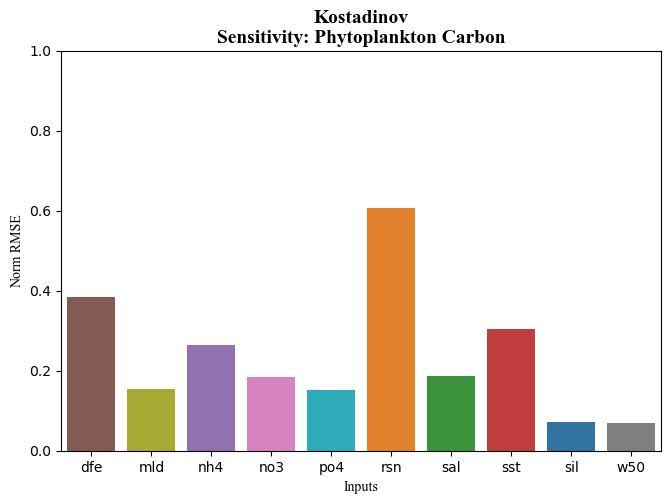

In [164]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=rnormdiff.index,y='phyc',data=rnormdiff, ax=ax, palette=my_colors)
# graph.axhline(rn_orig['phyc'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("Kostadinov\nSensitivity: Phytoplankton Carbon", fontdict=font)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
plt.show()
fig.savefig(chartpath + "Kostadinov_sensbar_phyc.jpg",dpi=200,bbox_inches='tight')

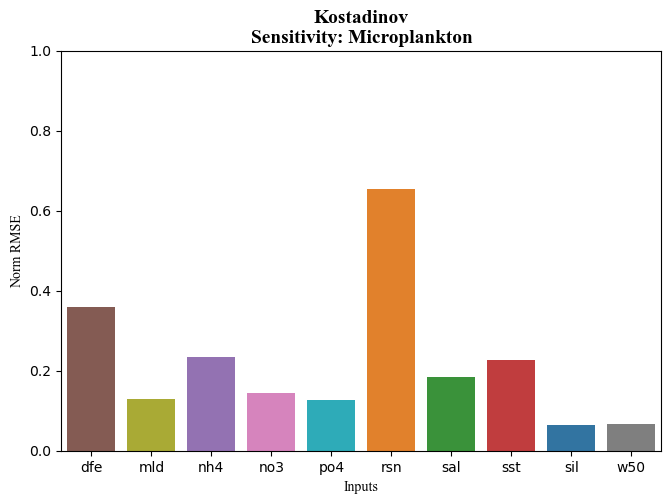

In [166]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=rnormdiff.index,y='mcro',data=rnormdiff, ax=ax, palette=my_colors)
# graph.axhline(rn_orig['mcro'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("Kostadinov\nSensitivity: Microplankton", fontdict=font)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
plt.show()
fig.savefig(chartpath + "Kostadinov_sensbar_mcro.jpg",dpi=200,bbox_inches='tight')

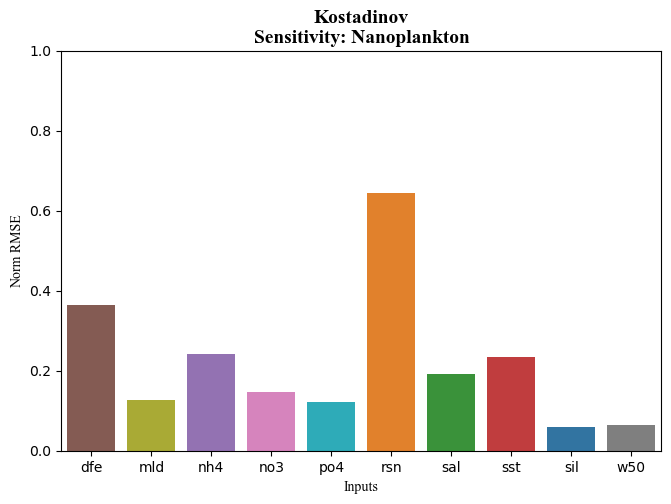

In [167]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=rnormdiff.index,y='nano',data=rnormdiff, ax=ax, palette=my_colors)
# graph.axhline(rn_orig['nano'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("Kostadinov\nSensitivity: Nanoplankton", fontdict=font)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
plt.show()
fig.savefig(chartpath + "Kostadinov_sensbar_nano.jpg",dpi=200,bbox_inches='tight')

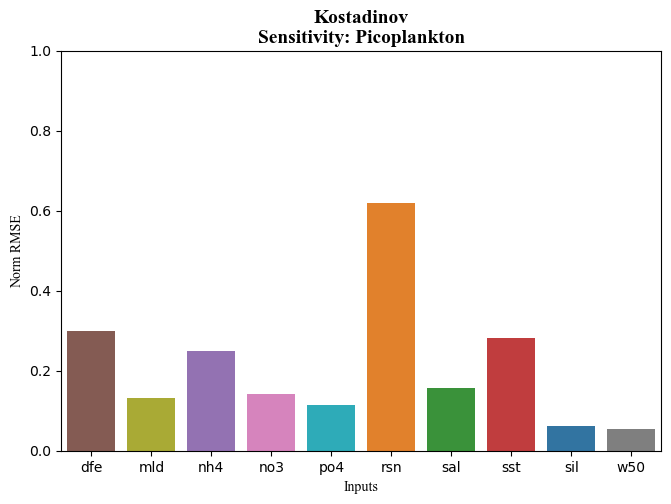

In [168]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=rnormdiff.index,y='pico',data=rnormdiff, ax=ax, palette=my_colors)
# graph.axhline(rn_orig['pico'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("Kostadinov\nSensitivity: Picoplankton", fontdict=font)
ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
ax.set_ylim([0.0, 1.0])
plt.show()
fig.savefig(chartpath + "Kostadinov_sensbar_pico.jpg",dpi=200,bbox_inches='tight')

In [91]:
X.head()

dfe      mld       nh4       no3       po4  \
month lat   lon                                                           
1      10.5 -87.5   4.525819e-07   21.583  0.000170  0.003409  0.000951   
10    -45.5  57.5   3.028882e-07  168.869  0.000275  0.016236  0.001623   
5     -52.5  169.5  5.530051e-07  243.282  0.000251  0.013220  0.000721   
1      7.5  -108.5  1.914354e-07   34.658  0.000131  0.000275  0.000237   
7      72.5  11.5   4.029917e-07   31.728  0.000072  0.001562  0.000201   

                           rsn       sst        sal           w50       sil  
month lat   lon                                                              
1      10.5 -87.5   230.388462  26.24719  33.470612  2.781491e-06  0.004841  
10    -45.5  57.5   148.970370   6.52131  34.048100  2.051357e-07  0.007582  
5     -52.5  169.5   28.307692   8.34759  34.314911  4.508459e-07  0.002801  
1      7.5  -108.5  200.411538  26.95071  33.710690  2.224768e-06  0.001490  
7      72.5  11.5   136.818519   7.96000  35.018089 -7.646706e-07  0.002262

In [92]:
dataq = df.quantile(q=np.arange(0,1,0.01))

In [93]:
dataq.shape

(100, 18)

In [94]:
dataq.columns

Index(['dfe', 'mld', 'nh4', 'no3', 'po4', 'rsn', 'sst', 'sal', 'w50', 'sil',
       'cmicro', 'cnano', 'cpico', 'logmcro', 'lognano', 'logpico', 'logphyc',
       'phyc'],
      dtype='object')

In [109]:
Xq = dataq.drop(['phyc', 'cmicro', 'cnano', 'cpico', 'logphyc','logmcro', 'lognano', 'logpico'], axis=1)
Xq.head()

dfe       mld       nh4           no3       po4  rsn       sst  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0 -1.907710   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0 -1.839509   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0 -1.774310   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0 -1.713110   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0 -1.628910   

            sal       w50       sil  
0.00   8.198891 -0.000087  0.000000  
0.01  29.785942 -0.000009  0.000089  
0.02  31.683790 -0.000006  0.000222  
0.03  32.332041 -0.000005  0.000336  
0.04  32.599701 -0.000004  0.000432

In [96]:
Xqs = scaler.transform(Xq)
Xqs = pd.DataFrame(Xqs, columns=Xq.columns)
Xqs.head()

dfe        mld        nh4        no3        po4   rsn        sst  \
0   9.998053  10.000000  10.000000  10.000000  10.000000  10.0  10.000000   
1  10.238511  10.860800  10.262356  10.000000  10.317412  10.0  10.176287   
2  10.314197  11.006168  10.330454  10.001223  10.635563  10.0  10.344814   
3  10.356336  11.114617  10.378351  10.005532  10.890109  10.0  10.503004   
4  10.382958  11.208736  10.443560  10.011427  11.115622  10.0  10.720645   

         sal        w50        sil  
0  10.000000  10.000000  10.000000  
1  70.381442  51.642469  10.063597  
2  75.689941  53.341084  10.158533  
3  77.503173  54.051973  10.240056  
4  78.251848  54.498046  10.309141

#### Sensitivity Analysis for sw

In [95]:
Xqrsn50=Xqs.copy(deep=True)
for col in Xqs.columns:
    if col!='rsn':
        Xqrsn50[col]=Xqrsn50[col].quantile(q=0.5,interpolation='linear')
    else:
        Xqrsn50[col]=Xqrsn50[col]

In [96]:
Xqrsn50.head()

dfe        mld        nh4        no3        po4   rsn        sst  \
0  12.231098  13.610663  17.037158  12.567062  20.627522  10.0  60.241688   
1  12.231098  13.610663  17.037158  12.567062  20.627522  10.0  60.241688   
2  12.231098  13.610663  17.037158  12.567062  20.627522  10.0  60.241688   
3  12.231098  13.610663  17.037158  12.567062  20.627522  10.0  60.241688   
4  12.231098  13.610663  17.037158  12.567062  20.627522  10.0  60.241688   

         sal        w50       sil  
0  83.268201  55.446769  12.12296  
1  83.268201  55.446769  12.12296  
2  83.268201  55.446769  12.12296  
3  83.268201  55.446769  12.12296  
4  83.268201  55.446769  12.12296

In [97]:
yqphyc_pred = model_phyc.predict(Xqrsn50)
yqmcro_pred = model_mcro.predict(Xqrsn50)
yqnano_pred = model_nano.predict(Xqrsn50)
yqpico_pred = model_pico.predict(Xqrsn50)

In [98]:
rsn50 = Xq.copy(deep=True)
rsn50['logphyc_pred']=yqphyc_pred
rsn50['logmcro_pred']=yqmcro_pred
rsn50['lognano_pred']=yqnano_pred
rsn50['logpico_pred']=yqpico_pred

In [99]:
rsn50.head()

dfe       mld       nh4           no3       po4  rsn       sst  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0 -1.907710   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0 -1.839509   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0 -1.774310   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0 -1.713110   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0 -1.628910   

            sal       w50       sil  logphyc_pred  logmcro_pred  lognano_pred  \
0.00   8.198891 -0.000087  0.000000     -3.285895     -1.457145     -0.223362   
0.01  29.785942 -0.000009  0.000089     -3.285895     -1.457145     -0.223362   
0.02  31.683790 -0.000006  0.000222     -3.285895     -1.457145     -0.223362   
0.03  32.332041 -0.000005  0.000336     -3.285895     -1.457145     -0.223362   
0.04  32.599701 -0.000004  0.000432     -3.285895     -1.457145     -0.223362   

      logpico_pred  
0.00      0.632545  
0.01      0.632545  
0.02      0.632545  
0.03      0.632545  
0.04      0.632545

In [100]:
optlist = ['logmcro_pred','lognano_pred','logpico_pred']
print(rsn50[optlist].to_numpy().min(), rsn50[optlist].to_numpy().max())

-1.4899693925531494 0.9703721028530028


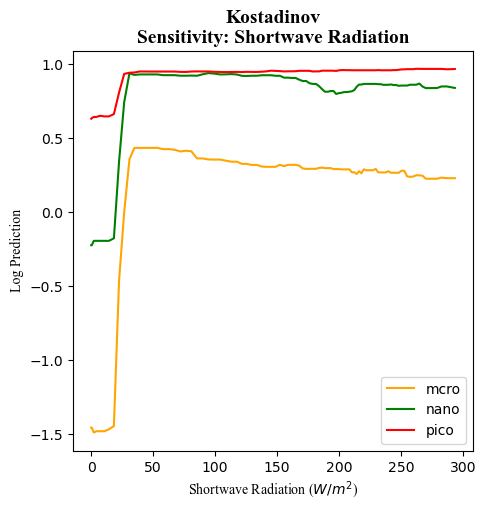

In [101]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax=fig.add_axes([0,0,1,1])
# sns.lineplot(data=rsn50.reset_index(drop=True),x='rsn',y='logphyc_pred',ax=ax,sort=True,label='phyc',color='blue', )
sns.lineplot(data=rsn50.reset_index(drop=True),x='rsn',y='logmcro_pred',ax=ax,sort=True,label='mcro',color='orange')
sns.lineplot(data=rsn50.reset_index(drop=True),x='rsn',y='lognano_pred',ax=ax,sort=True,label='nano',color='green')
sns.lineplot(data=rsn50.reset_index(drop=True),x='rsn',y='logpico_pred',ax=ax,sort=True,label='pico',color='red')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_ylabel("Log Prediction", fontdict=fonttxt)
ax.set_xlabel(r"Shortwave Radiation ($W/m^2$)", fontdict=fonttxt)
ax.set_title("Kostadinov\nSensitivity: Shortwave Radiation", fontdict=font)
# ax.set_ylim([-1.5,1.0])
plt.legend()
plt.show()
fig.savefig(chartpath + "kostadinov_sensplot_rsn.jpg",bbox_inches='tight')

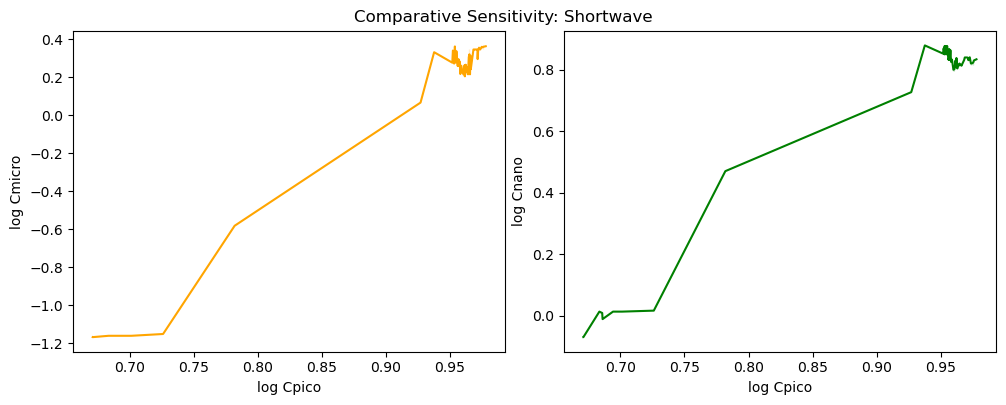

In [218]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=rsn50.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=rsn50.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle(r"Comparative Sensitivity: Shortwave")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_rsn.jpg",bbox_inches='tight')

In [222]:
# rmsersn = pd.DataFrame(columns=['rtest', 'rorig','rrsn','rtest_mean','rorig_mean','rrsn_mean'], index=['phyc','cmicro','cnano','cpico'])

# rmsersn.loc['phyc'] = pd.Series({'rtest':rsmephyc_test, 'rorig':rsmephyc, 'rrsn':rphyc_rsn50,
#                                  'rtest_mean':rsmephyc_test/df_j["phyc"].mean(),'rorig_mean':rsmephyc/df_j["phyc"].mean(),
#                                  'rrsn_mean':rphyc_rsn50/df_j["phyc"].mean() })

# rmsersn.loc['cmicro'] = pd.Series({'rtest':rsmemicro_test, 'rorig':rsmemicro, 'rrsn':rmicro_rsn50,
#                                  'rtest_mean':rsmemicro_test/df_j["cmicro"].mean(),'rorig_mean':rsmemicro/df_j["cmicro"].mean(),
#                                  'rrsn_mean':rmicro_rsn50/df_j["cmicro"].mean() })

# rmsersn.loc['cnano'] = pd.Series({'rtest':rsmenano_test, 'rorig':rsmenano, 'rrsn':rnano_rsn50,
#                                  'rtest_mean':rsmenano_test/df_j["cnano"].mean(),'rorig_mean':rsmenano/df_j["cnano"].mean(),
#                                  'rrsn_mean':rnano_rsn50/df_j["cnano"].mean() })

# rmsersn.loc['cpico'] = pd.Series({'rtest':rsmepico_test, 'rorig':rsmepico, 'rrsn':rpico_rsn50,
#                                  'rtest_mean':rsmepico_test/df_j["cpico"].mean(),'rorig_mean':rsmepico/df_j["cpico"].mean(),
#                                  'rrsn_mean':rpico_rsn50/df_j["cpico"].mean() })

# rmse['rsw'] = [rphyc_rsn50,rmicro_rsn50,rnano_rsn50,rpico_rsn50]

#### Sensitivity Analysis dfe

In [217]:
Xqdfe50=Xqs.copy(deep=True)
for col in Xqs.columns:
    if col!='dfe':
        Xqdfe50[col]=Xqdfe50[col].quantile(q=0.5,interpolation='linear')
    else:
        Xqdfe50[col]=Xqdfe50[col]

In [218]:
yqphyc_pred = model_phyc.predict(Xqrsn50)
yqmcro_pred = model_mcro.predict(Xqrsn50)
yqnano_pred = model_nano.predict(Xqrsn50)
yqpico_pred = model_pico.predict(Xqrsn50)

In [219]:
dfe50 = Xq.copy(deep=True)
dfe50['logphyc_pred']=yqphyc_pred
dfe50['logmcro_pred']=yqmcro_pred
dfe50['lognano_pred']=yqnano_pred
dfe50['logpico_pred']=yqpico_pred
dfe50['logdfe']=np.log10(dfe50['dfe'])

In [220]:
dfe50.head()

dfe       mld       nh4           no3       po4  rsn  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0   

            sal       sil       sst       w50  logphyc_pred  logmcro_pred  \
0.00   8.198891  0.000000 -1.907710 -0.000087       0.79661     -1.187146   
0.01  29.785942  0.000089 -1.839509 -0.000009       0.79661     -1.187146   
0.02  31.683790  0.000222 -1.774310 -0.000006       0.79661     -1.187146   
0.03  32.332041  0.000336 -1.713110 -0.000005       0.79661     -1.187146   
0.04  32.599701  0.000432 -1.628910 -0.000004       0.79661     -1.187146   

      lognano_pred  logpico_pred    logdfe  
0.00     -0.056467      0.676047 -7.297104  
0.01     -0.056467      0.676047 -7.106129  
0.02     -0.056467      0.676047 -7.060029  
0.03     -0.056467      0.676047 -7.036335  
0.04     -0.056467      0.676047 -7.022007

In [226]:
dfe50 = dfe50.replace([np.inf,-np.inf], np.nan)

C:\Users\dutts\.conda\envs\phy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dutts\.conda\envs\phy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dutts\.conda\envs\phy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dutts\.conda\envs\phy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

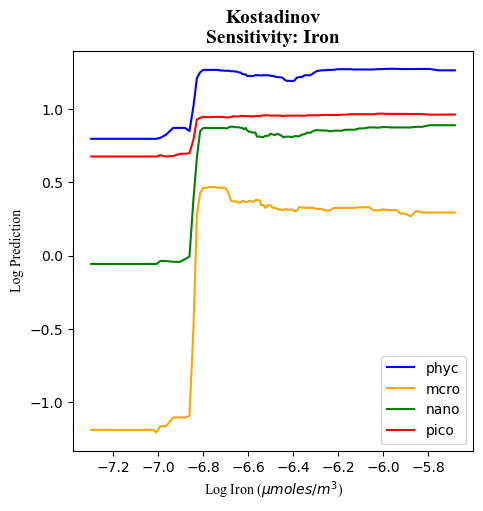

In [227]:
fig= plt.figure(figsize=(4,4), dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data=dfe50.reset_index(drop=True),x="logdfe",y="logphyc_pred",ax=ax,sort=True,label="phyc",color='blue')
sns.lineplot(data=dfe50.reset_index(drop=True),x="logdfe",y="logmcro_pred",ax=ax,sort=True,label="mcro", color='orange')
sns.lineplot(data=dfe50.reset_index(drop=True),x="logdfe",y="lognano_pred",ax=ax,sort=True,label="nano",color='green')
sns.lineplot(data=dfe50.reset_index(drop=True),x="logdfe",y="logpico_pred",ax=ax,sort=True,label="pico",color='red')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_ylabel("Log Prediction", fontdict=fonttxt)
ax.set_ylabel("Log Prediction",fontdict=fonttxt)
ax.set_xlabel(r"Log Iron ($\mu moles/m^3$)", fontdict=fonttxt)
ax.set_title("Kostadinov\nSensitivity: Iron", fontdict=font)
# ax.set_xlim()
# fig.tight_layout(pad=1.0)
plt.legend()
plt.show()
fig.savefig(chartpath + "kostadinov_sensplot_dfe.jpg",bbox_inches='tight')

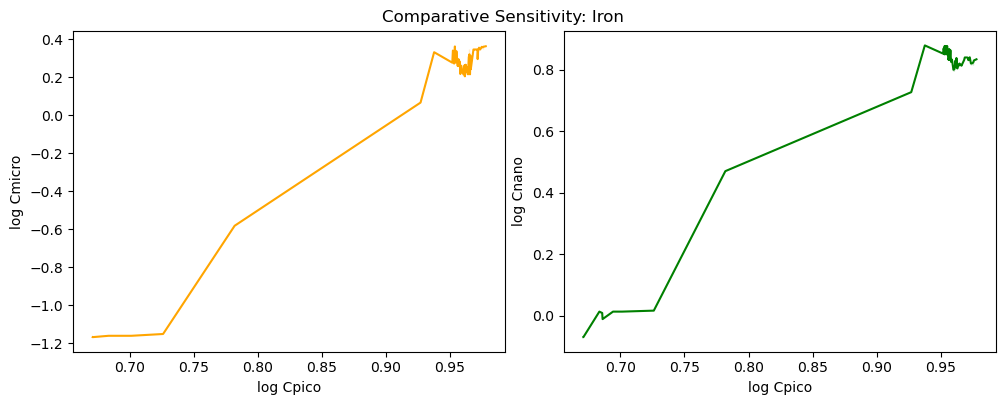

In [232]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=dfe50.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=dfe50.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle("Comparative Sensitivity: Iron")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_dfe.jpg",bbox_inches='tight')

#### Sensitivity Analysis for tos

In [105]:
Xqtos50=Xqs.copy(deep=True)
for col in Xqs.columns:
    if col!='sst':
        Xqtos50[col]=Xqtos50[col].quantile(q=0.5,interpolation='linear')
    else:
        Xqtos50[col]=Xqtos50[col]

In [106]:
yqphyc_pred = model_phyc.predict(Xqtos50)
yqmcro_pred = model_mcro.predict(Xqtos50)
yqnano_pred = model_nano.predict(Xqtos50)
yqpico_pred = model_pico.predict(Xqtos50)

In [107]:
tos50 = Xq.copy(deep=True)
tos50['logphyc_pred']=yqphyc_pred
tos50['logmcro_pred']=yqmcro_pred
tos50['lognano_pred']=yqnano_pred
tos50['logpico_pred']=yqpico_pred

In [108]:
tos50.head()

dfe       mld       nh4           no3       po4  rsn       sst  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0 -1.907710   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0 -1.839509   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0 -1.774310   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0 -1.713110   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0 -1.628910   

            sal       w50       sil  logphyc_pred  logmcro_pred  lognano_pred  \
0.00   8.198891 -0.000087  0.000000     -2.698062      0.638908      1.100546   
0.01  29.785942 -0.000009  0.000089     -2.689760      0.673768      1.100546   
0.02  31.683790 -0.000006  0.000222     -2.689760      0.669010      1.100546   
0.03  32.332041 -0.000005  0.000336     -2.719219      0.670996      1.100546   
0.04  32.599701 -0.000004  0.000432     -2.700590      0.670996      1.100546   

      logpico_pred  
0.00      1.020682  
0.01      1.040375  
0.02      1.040375  
0.03      1.040375  
0.04      1.040375

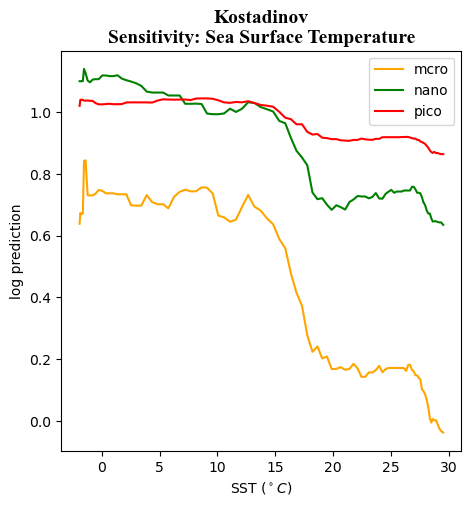

In [113]:
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=tos50.reset_index(drop=True),x="sst",y="logphyc_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phyc",color='blue')
sns.lineplot(data=tos50.reset_index(drop=True),x="sst",y="logmcro_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="mcro", color='orange')
sns.lineplot(data=tos50.reset_index(drop=True),x="sst",y="lognano_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="nano",color='green')
sns.lineplot(data=tos50.reset_index(drop=True),x="sst",y="logpico_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="pico",color='red')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_ylabel("log prediction")
ax.set_xlabel(r"SST ($^\circ C$)")
ax.set_title("Kostadinov\nSensitivity: Sea Surface Temperature",fontdict=font)
plt.legend()
plt.show()
fig.savefig(chartpath + "kostadinov_sst_sens_plot.jpg",bbox_inches='tight')

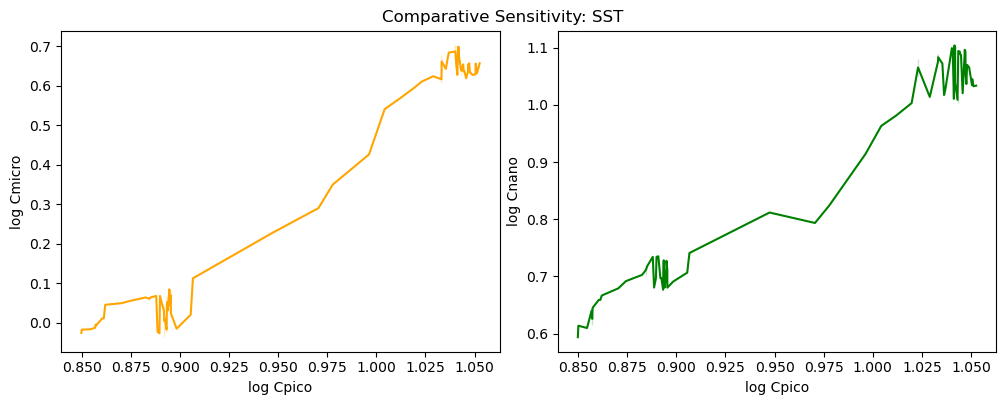

In [246]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=tos50.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=tos50.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle("Comparative Sensitivity: SST")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_dfe.jpg",bbox_inches='tight')

In [247]:
# rmsetos = pd.DataFrame(columns=['rtest', 'rorig','rtos','rtest_mean','rorig_mean','rtos_mean'], index=['phyc','cmicro','cnano','cpico'])

# rmsetos.loc['phyc'] = pd.Series({'rtest':rsmephyc_test, 'rorig':rsmephyc, 'rtos':rphyc_tos50,
#                                  'rtest_mean':rsmephyc_test/df_j["phyc"].mean(),'rorig_mean':rsmephyc/df_j["phyc"].mean(),
#                                  'rtos_mean':rphyc_tos50/df_j["phyc"].mean() })

# rmsetos.loc['cmicro'] = pd.Series({'rtest':rsmemicro_test, 'rorig':rsmemicro, 'rtos':rmicro_tos50,
#                                  'rtest_mean':rsmemicro_test/df_j["cmicro"].mean(),'rorig_mean':rsmemicro/df_j["cmicro"].mean(),
#                                  'rtos_mean':rmicro_tos50/df_j["cmicro"].mean() })

# rmsetos.loc['cnano'] = pd.Series({'rtest':rsmenano_test, 'rorig':rsmenano, 'rtos':rnano_tos50,
#                                  'rtest_mean':rsmenano_test/df_j["cnano"].mean(),'rorig_mean':rsmenano/df_j["cnano"].mean(),
#                                  'rtos_mean':rnano_tos50/df_j["cnano"].mean() })

# rmsetos.loc['cpico'] = pd.Series({'rtest':rsmepico_test, 'rorig':rsmepico, 'rtos':rpico_tos50,
#                                  'rtest_mean':rsmepico_test/df_j["cpico"].mean(),'rorig_mean':rsmepico/df_j["cpico"].mean(),
#                                  'rtos_mean':rpico_tos50/df_j["cpico"].mean() })

# rmse['rtos'] = [rphyc_tos50,rmicro_tos50,rnano_tos50,rpico_tos50]

#### Sensitivity Analysis for nh4

In [248]:
Xnh4_50 = dataprep(Xs.copy(deep=True), 'nh4', 0.5)
print(Xnh4_50.shape)
Xnh4_50.head()

(431112, 10)


dfe       mld       nh4       no3     po4      rsn       sal  \
0  0.024987  0.040509  0.325350  0.030147  0.1204  0.54316  0.813054   
1  0.024987  0.040509  0.366898  0.030147  0.1204  0.54316  0.813054   
2  0.024987  0.040509  0.111734  0.030147  0.1204  0.54316  0.813054   
3  0.024987  0.040509  0.002103  0.030147  0.1204  0.54316  0.813054   
4  0.024987  0.040509  0.008983  0.030147  0.1204  0.54316  0.813054   

        sil      sst       w50  
0  0.023933  0.55695  0.515614  
1  0.023933  0.55695  0.515614  
2  0.023933  0.55695  0.515614  
3  0.023933  0.55695  0.515614  
4  0.023933  0.55695  0.515614

In [249]:
yphyc_pred = model_phyc.predict(Xnh4_50)
re = mean_squared_error(yphyc,yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn=re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.33727656225139124
Normalised RMSE: 1.047014835167721
R2_score: -0.0962426078868388


In [250]:
ymcro_pred = model_mcro.predict(Xnh4_50)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.8892971203615531
Normalised RMSE: 1.0927885632625463
R2_score: -0.1941896140191639


In [251]:
ynano_pred = model_nano.predict(Xnh4_50)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.549104877528415
Normalised RMSE: 1.0635689076264694
R2_score: -0.13118144513883712


In [252]:
ypico_pred = model_pico.predict(Xnh4_50)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)

RMSE: 0.17269043588786073
Normalised RMSE: 1.124093736389819
R2_score PICO : -0.2635896591917217


In [253]:
nh4_50 = X.copy(deep=True)
nh4_50["phyc_pred"] = yphyc_pred
nh4_50["mcro_pred"] = ymcro_pred
nh4_50["nano_pred"] = ynano_pred
nh4_50["pico_pred"] = ypico_pred
nh4_50['nh4_scaled'] = nh4_50['nh4'] * 1e6

In [254]:
nh4_50.head()

dfe      mld       nh4       no3       po4  \
lon   lat   month                                                        
353.5 -59.5 4      2.306388e-07   86.517  0.000425  0.025467  0.001708   
318.5 -68.5 3      2.514458e-07   30.365  0.000478  0.023877  0.001816   
170.5 -29.5 9      2.459837e-07  107.952  0.000149  0.000654  0.000159   
181.5 -26.5 3      1.320913e-07   38.409  0.000007  0.000191  0.000199   
15.5   42.5 9      2.358271e-06   16.955  0.000016  0.000908  0.000031   

                          rsn        sal       sil       sst           w50  \
lon   lat   month                                                            
353.5 -59.5 4       34.019231  34.020813  0.065237   0.07411  1.227698e-06   
318.5 -68.5 3       38.784615  33.715412  0.083421  -1.28571  1.870424e-07   
170.5 -29.5 9      201.314815  35.750488  0.001274  18.73140 -1.005181e-06   
181.5 -26.5 3      212.400000  35.506290  0.001566  25.08090 -7.575274e-07   
15.5   42.5 9      168.125926  37.851990  0.003989  21.97101  6.550670e-09   

                   phyc_pred  mcro_pred  nano_pred  pico_pred  nh4_scaled  
lon   lat   month                                                          
353.5 -59.5 4       1.493137   0.738012   1.149789   1.032219  424.716212  
318.5 -68.5 3       1.498373   0.754784   1.154765   1.030548  478.386620  
170.5 -29.5 9       1.309550   0.363109   0.906235   0.978327  148.772150  
181.5 -26.5 3       1.075807  -0.186216   0.473969   0.867061    7.153200  
15.5   42.5 9       1.082398  -0.169417   0.485482   0.888573   16.041161

In [255]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=nh4_50.reset_index(drop=True),x="nh4_scaled",y="phyc_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="phyc")
# sns.lineplot(data=nh4_50.reset_index(drop=True),x="nh4_scaled",y="mcro_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cmicro")
# sns.lineplot(data=nh4_50.reset_index(drop=True),x="nh4_scaled",y="nano_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cnano")
# sns.lineplot(data=nh4_50.reset_index(drop=True),x="nh4_scaled",y="pico_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cpico")
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"$NH_4 (\mu moles/m^3)$")
# ax.set_title(r"Sensivity: $NH_4$")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig("sens_logplot_nh4.jpg",bbox_inches='tight')

In [256]:
Xqnh450 = Xqs.copy(deep=True)
for col in Xqs.columns:
    if col != 'nh4':
        Xqnh450[col] = Xqnh450[col].quantile(q=0.5, interpolation='linear')
    else:
        Xqnh450[col] = Xqnh450[col]

In [257]:
Xqnh450.head()

dfe       mld       nh4       no3       po4       rsn       sal  \
0  0.02479  0.040118  0.000000  0.028523  0.118084  0.539095  0.812561   
1  0.02479  0.040118  0.002473  0.028523  0.118084  0.539095  0.812561   
2  0.02479  0.040118  0.003114  0.028523  0.118084  0.539095  0.812561   
3  0.02479  0.040118  0.003566  0.028523  0.118084  0.539095  0.812561   
4  0.02479  0.040118  0.004180  0.028523  0.118084  0.539095  0.812561   

        sil       sst       w50  
0  0.023588  0.550506  0.515487  
1  0.023588  0.550506  0.515487  
2  0.023588  0.550506  0.515487  
3  0.023588  0.550506  0.515487  
4  0.023588  0.550506  0.515487

In [258]:
yqphyc_pred = model_phyc.predict(Xqnh450)
yqmcro_pred = model_mcro.predict(Xqnh450)
yqnano_pred = model_nano.predict(Xqnh450)
yqpico_pred = model_pico.predict(Xqnh450)

In [259]:
nh450 = Xq.copy(deep=True)
nh450['logphyc_pred']=yqphyc_pred
nh450['logmcro_pred']=yqmcro_pred
nh450['lognano_pred']=yqnano_pred
nh450['logpico_pred']=yqpico_pred
nh450['nh4_scaled']=nh450['nh4']*1e3

In [260]:
nh450.head()

dfe       mld       nh4           no3       po4  rsn  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0   

            sal       sil       sst       w50  logphyc_pred  logmcro_pred  \
0.00   8.198891  0.000000 -1.907710 -0.000087      1.126839     -0.165232   
0.01  29.785942  0.000089 -1.839509 -0.000009      1.123654     -0.165232   
0.02  31.683790  0.000222 -1.774310 -0.000006      1.126477     -0.149633   
0.03  32.332041  0.000336 -1.713110 -0.000005      1.127253     -0.138550   
0.04  32.599701  0.000432 -1.628910 -0.000004      1.127253     -0.142646   

      lognano_pred  logpico_pred  nh4_scaled  
0.00      0.498669      0.872740    0.004437  
0.01      0.500228      0.874063    0.007631  
0.02      0.500861      0.871021    0.008460  
0.03      0.500861      0.871021    0.009043  
0.04      0.500861      0.871021    0.009837

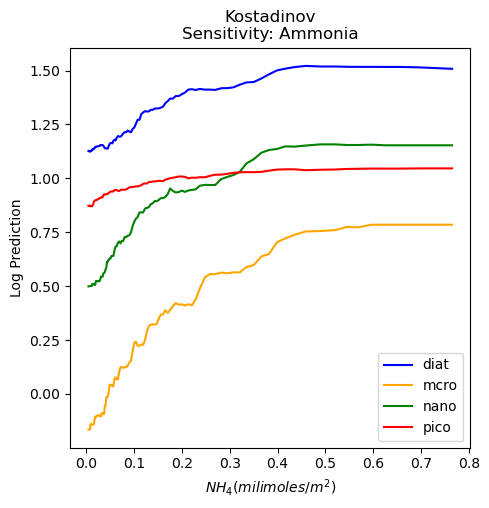

In [261]:
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data=nh450.reset_index(drop=True),x="nh4_scaled",y="logphyc_pred",ax=ax,sort=True,label="diat",color='blue')
sns.lineplot(data=nh450.reset_index(drop=True),x="nh4_scaled",y="logmcro_pred",ax=ax,sort=True,label="mcro", color='orange')
sns.lineplot(data=nh450.reset_index(drop=True),x="nh4_scaled",y="lognano_pred",ax=ax,sort=True,label="nano",color='green')
sns.lineplot(data=nh450.reset_index(drop=True),x="nh4_scaled",y="logpico_pred",ax=ax,sort=True,label="pico",color='red')
ax.set_ylabel("Log Prediction")
ax.set_xlabel(r"$NH_4 (milimoles/m^2)$")
ax.set_title("Kostadinov\nSensitivity: Ammonia")
plt.legend()
plt.show()
fig.savefig(path + "kostadinov_nh4_sens_plot.jpg",bbox_inches='tight')

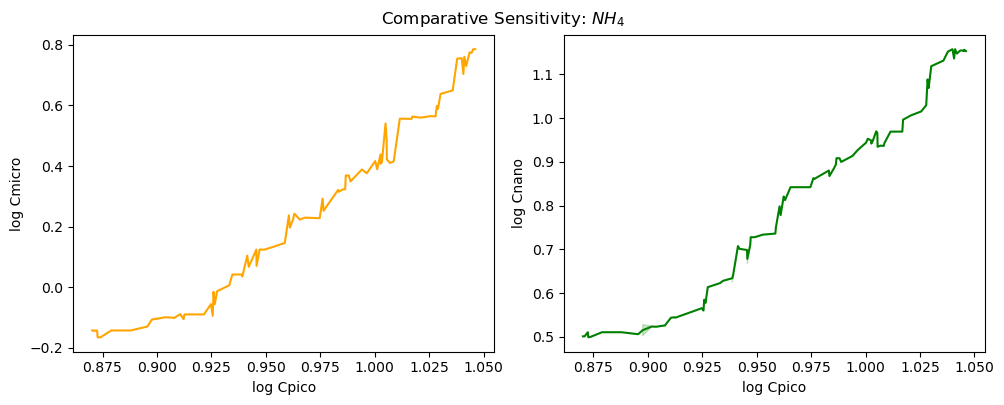

In [262]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=nh450.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=nh450.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle(r"Comparative Sensitivity: $NH_4$")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_nh4.jpg",bbox_inches='tight')

#### Sensitivity Analysis for no3

In [263]:
Xno3_50 = dataprep(Xs.copy(deep=True), 'no3', 0.5)
print(Xno3_50.shape)
Xno3_50.head()

(431112, 10)


dfe       mld       nh4       no3     po4      rsn       sal  \
0  0.024987  0.040509  0.079609  0.550438  0.1204  0.54316  0.813054   
1  0.024987  0.040509  0.079609  0.516083  0.1204  0.54316  0.813054   
2  0.024987  0.040509  0.079609  0.014138  0.1204  0.54316  0.813054   
3  0.024987  0.040509  0.079609  0.004123  0.1204  0.54316  0.813054   
4  0.024987  0.040509  0.079609  0.019626  0.1204  0.54316  0.813054   

        sil      sst       w50  
0  0.023933  0.55695  0.515614  
1  0.023933  0.55695  0.515614  
2  0.023933  0.55695  0.515614  
3  0.023933  0.55695  0.515614  
4  0.023933  0.55695  0.515614

In [264]:
yphyc_pred = model_phyc.predict(Xno3_50)
re = mean_squared_error(yphyc,yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn=re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.3314740419741422
Normalised RMSE: 1.0290019475508432
R2_score: -0.0588474641478427


In [265]:
ymcro_pred = model_mcro.predict(Xno3_50)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.8885205233710536
Normalised RMSE: 1.0918342631866202
R2_score: -0.19210482345416868


In [266]:
ynano_pred = model_nano.predict(Xno3_50)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.5457380413550066
Normalised RMSE: 1.0570476356115
R2_score: -0.11735229574308059


In [267]:
ypico_pred = model_pico.predict(Xno3_50)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)

RMSE: 0.16346869169675995
Normalised RMSE: 1.0640666432244685
R2_score PICO : -0.13224044754850817


In [268]:
no3_50 = X.copy(deep=True)
no3_50["logphyc_pred"] = yphyc_pred
no3_50["logmcro_pred"] = ymcro_pred
no3_50["lognano_pred"] = ynano_pred
no3_50["logpico_pred"] = ypico_pred
no3_50 = no3_50[no3_50['no3'] != 0.0]
no3_50["log_no3"] = np.log10(no3_50["no3"])
no3_50["no3_scaled"] = no3_50["no3"] * 1e3

In [269]:
no3_50.head(10)

dfe      mld       nh4       no3       po4  \
lon   lat   month                                                        
353.5 -59.5 4      2.306388e-07   86.517  0.000425  0.025467  0.001708   
318.5 -68.5 3      2.514458e-07   30.365  0.000478  0.023877  0.001816   
170.5 -29.5 9      2.459837e-07  107.952  0.000149  0.000654  0.000159   
181.5 -26.5 3      1.320913e-07   38.409  0.000007  0.000191  0.000199   
15.5   42.5 9      2.358271e-06   16.955  0.000016  0.000908  0.000031   
28.5   79.5 2      1.133527e-06   18.700  0.000046  0.003601  0.000285   
159.5 -25.5 9      2.301513e-07  121.225  0.000068  0.000527  0.000270   
257.5 -39.5 1      7.349711e-08   30.406  0.000401  0.007347  0.000631   
298.5 -49.5 5      7.185889e-07   82.896  0.000406  0.017158  0.001254   
209.5  48.5 4      3.828287e-07   98.706  0.000255  0.014607  0.001284   

                          rsn        sal       sil        sst           w50  \
lon   lat   month                                                             
353.5 -59.5 4       34.019231  34.020813  0.065237   0.074110  1.227698e-06   
318.5 -68.5 3       38.784615  33.715412  0.083421  -1.285710  1.870424e-07   
170.5 -29.5 9      201.314815  35.750488  0.001274  18.731400 -1.005181e-06   
181.5 -26.5 3      212.400000  35.506290  0.001566  25.080900 -7.575274e-07   
15.5   42.5 9      168.125926  37.851990  0.003989  21.971010  6.550670e-09   
28.5   79.5 2        0.000000  34.043911  0.005305  -1.763810  1.932375e-06   
159.5 -25.5 9      225.092593  35.708912  0.001200  21.004700 -2.153952e-06   
257.5 -39.5 1      252.115385  34.050110  0.000496  16.578491 -9.931343e-07   
298.5 -49.5 5       45.342308  33.777512  0.007590   7.577990 -2.531348e-07   
209.5  48.5 4      153.823077  32.730812  0.025382   5.796810  8.787803e-07   

                   logphyc_pred  logmcro_pred  lognano_pred  logpico_pred  \
lon   lat   month                                                           
353.5 -59.5 4          1.308977      0.332343      0.879308      0.977728   
318.5 -68.5 3          1.308977      0.352636      0.869899      0.974310   
170.5 -29.5 9          1.214130      0.211338      0.759959      0.940526   
181.5 -26.5 3          1.133048      0.106055      0.610283      0.879145   
15.5   42.5 9          1.252950      0.223416      0.816534      0.947861   
28.5   79.5 2          1.287437      0.240773      0.853207      0.964331   
159.5 -25.5 9          1.175464      0.233468      0.728113      0.936227   
257.5 -39.5 1          1.299211      0.232240      0.851586      0.962908   
298.5 -49.5 5          1.328651      0.305908      0.905010      0.977860   
209.5  48.5 4          1.325304      0.292754      0.904980      0.975803   

                    log_no3  no3_scaled  
lon   lat   month                        
353.5 -59.5 4     -1.594023   25.466950  
318.5 -68.5 3     -1.622012   23.877445  
170.5 -29.5 9     -3.184354    0.654103  
181.5 -26.5 3     -3.719541    0.190748  
15.5   42.5 9     -3.041890    0.908050  
28.5   79.5 2     -2.443593    3.600867  
159.5 -25.5 9     -3.278219    0.526964  
257.5 -39.5 1     -2.133897    7.346879  
298.5 -49.5 5     -1.765536   17.157881  
209.5  48.5 4     -1.835434   14.607157

In [270]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=no3_50.reset_index(drop=True),x="no3_scaled",y="logphyc_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="phyc")
# sns.lineplot(data=no3_50.reset_index(drop=True),x="no3_scaled",y="logmcro_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cmicro")
# sns.lineplot(data=no3_50.reset_index(drop=True),x="no3_scaled",y="lognano_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cnano")
# sns.lineplot(data=no3_50.reset_index(drop=True),x="no3_scaled",y="logpico_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cpico")
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"$NO_3 (milimoles/m^3)$")
# ax.set_title(r"Sensivity: $NO_3$")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig("sens_logplot_no3.jpg",bbox_inches='tight')

In [271]:
Xqno350 = Xqs.copy(deep=True)
for col in Xqs.columns:
    if col != 'no3':
        Xqno350[col] = Xqno350[col].quantile(q=0.5, interpolation='linear')
    else:
        Xqno350[col] = Xqno350[col]

In [272]:
Xqno350.shape

(100, 10)

In [273]:
yqphyc_pred = model_phyc.predict(Xqno350)
yqmcro_pred = model_mcro.predict(Xqno350)
yqnano_pred = model_nano.predict(Xqno350)
yqpico_pred = model_pico.predict(Xqno350)

In [274]:
no350 = Xq.copy(deep=True)
no350['logphyc_pred']=yqphyc_pred
no350['logmcro_pred']=yqmcro_pred
no350['lognano_pred']=yqnano_pred
no350['logpico_pred']=yqpico_pred

In [275]:
no350.shape

(100, 14)

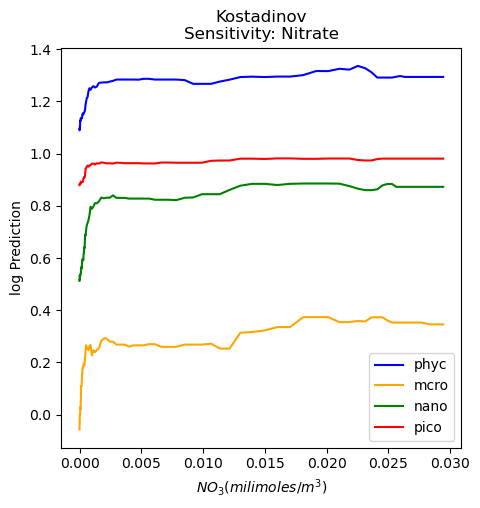

In [276]:
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data=no350.reset_index(drop=True),x="no3",y="logphyc_pred",ax=ax,sort=True,label="phyc",color='blue')
sns.lineplot(data=no350.reset_index(drop=True),x="no3",y="logmcro_pred",ax=ax,sort=True,label="mcro", color='orange')
sns.lineplot(data=no350.reset_index(drop=True),x="no3",y="lognano_pred",ax=ax,sort=True,label="nano",color='green')
sns.lineplot(data=no350.reset_index(drop=True),x="no3",y="logpico_pred",ax=ax,sort=True,label="pico",color='red')
ax.set_ylabel("log Prediction")
ax.set_xlabel(r"$NO_3 (milimoles/m^3)$")
ax.set_title("Kostadinov\nSensitivity: Nitrate")
plt.legend()
plt.show()
fig.savefig(path + "kostadinov_no3_sens_plot.jpg",bbox_inches='tight')

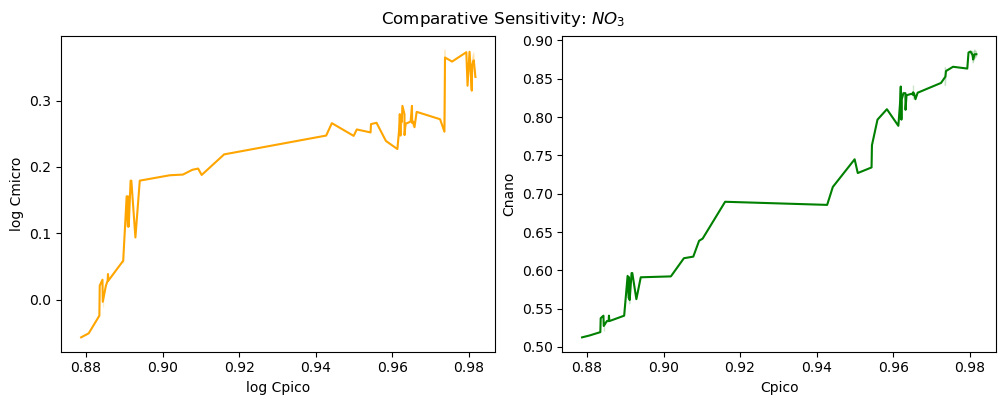

In [277]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=no350.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=no350.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("Cpico")
ax2.set_ylabel("Cnano")
fig.suptitle(r"Comparative Sensitivity: $NO_3$")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_no3.jpg",bbox_inches='tight')

#### Sensitivity Analysis for po4

In [278]:
Xpo4_50 = dataprep(Xs.copy(deep=True), 'po4', 0.5)
print(Xpo4_50.shape)
Xpo4_50.head()

(431112, 10)


dfe       mld       nh4       no3       po4      rsn       sal  \
0  0.024987  0.040509  0.079609  0.030147  0.563670  0.54316  0.813054   
1  0.024987  0.040509  0.079609  0.030147  0.599387  0.54316  0.813054   
2  0.024987  0.040509  0.079609  0.030147  0.052609  0.54316  0.813054   
3  0.024987  0.040509  0.079609  0.030147  0.065532  0.54316  0.813054   
4  0.024987  0.040509  0.079609  0.030147  0.010306  0.54316  0.813054   

        sil      sst       w50  
0  0.023933  0.55695  0.515614  
1  0.023933  0.55695  0.515614  
2  0.023933  0.55695  0.515614  
3  0.023933  0.55695  0.515614  
4  0.023933  0.55695  0.515614

In [279]:
yphyc_pred = model_phyc.predict(Xpo4_50)
re = mean_squared_error(yphyc,yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn=re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.375937535517753
Normalised RMSE: 1.167030920132832
R2_score: -0.36196432773517584


In [280]:
ymcro_pred = model_mcro.predict(Xpo4_50)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.9471078861258813
Normalised RMSE: 1.1638277493953242
R2_score: -0.3544981721333107


In [281]:
ynano_pred = model_nano.predict(Xpo4_50)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.6149686464916276
Normalised RMSE: 1.191141361769788
R2_score: -0.4188210347917187


In [282]:
ypico_pred = model_pico.predict(Xpo4_50)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)

RMSE: 0.18669473130490552
Normalised RMSE: 1.2152518869840712
R2_score PICO : -0.4768405744724089


In [283]:
po4_50 = X.copy(deep=True)
po4_50["logphyc_pred"] = yphyc_pred
po4_50["logmcro_pred"] = ymcro_pred
po4_50["lognano_pred"] = ynano_pred
po4_50["logpico_pred"] = ypico_pred
po4_50["po4_scaled"] = po4_50["po4"] * 1e6

In [284]:
po4_50.head()

dfe      mld       nh4       no3       po4  \
lon   lat   month                                                        
353.5 -59.5 4      2.306388e-07   86.517  0.000425  0.025467  0.001708   
318.5 -68.5 3      2.514458e-07   30.365  0.000478  0.023877  0.001816   
170.5 -29.5 9      2.459837e-07  107.952  0.000149  0.000654  0.000159   
181.5 -26.5 3      1.320913e-07   38.409  0.000007  0.000191  0.000199   
15.5   42.5 9      2.358271e-06   16.955  0.000016  0.000908  0.000031   

                          rsn        sal       sil       sst           w50  \
lon   lat   month                                                            
353.5 -59.5 4       34.019231  34.020813  0.065237   0.07411  1.227698e-06   
318.5 -68.5 3       38.784615  33.715412  0.083421  -1.28571  1.870424e-07   
170.5 -29.5 9      201.314815  35.750488  0.001274  18.73140 -1.005181e-06   
181.5 -26.5 3      212.400000  35.506290  0.001566  25.08090 -7.575274e-07   
15.5   42.5 9      168.125926  37.851990  0.003989  21.97101  6.550670e-09   

                   logphyc_pred  logmcro_pred  lognano_pred  logpico_pred  \
lon   lat   month                                                           
353.5 -59.5 4          1.346994      0.458700      0.976125      0.987543   
318.5 -68.5 3          1.346994      0.455991      0.977589      0.989286   
170.5 -29.5 9          1.274057      0.181945      0.786754      0.950536   
181.5 -26.5 3          1.272767      0.205374      0.793492      0.953314   
15.5   42.5 9          1.261093      0.141290      0.796555      0.947415   

                    po4_scaled  
lon   lat   month               
353.5 -59.5 4      1707.599676  
318.5 -68.5 3      1815.802632  
170.5 -29.5 9       159.376379  
181.5 -26.5 3       198.525585  
15.5   42.5 9        31.222235

In [285]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=po4_50.reset_index(drop=True),x="po4_scaled",y="logphyc_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="phyc")
# sns.lineplot(data=po4_50.reset_index(drop=True),x="po4_scaled",y="logmcro_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cmicro")
# sns.lineplot(data=po4_50.reset_index(drop=True),x="po4_scaled",y="lognano_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cnano")
# sns.lineplot(data=po4_50.reset_index(drop=True),x="po4_scaled",y="logpico_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cpico")
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"$PO_4 (\mu moles/m^3)$")
# ax.set_title(r"Sensivity: $PO_4 $")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# # fig.savefig("sens_logplot_po4.jpg",bbox_inches='tight')

In [286]:
Xqpo450 = Xqs.copy(deep=True)
for col in Xqs.columns:
    if col != 'po4':
        Xqpo450[col] = Xqpo450[col].quantile(q=0.5, interpolation='linear')
    else:
        Xqpo450[col] = Xqpo450[col]

In [287]:
yqphyc_pred = model_phyc.predict(Xqpo450)
yqmcro_pred = model_mcro.predict(Xqpo450)
yqnano_pred = model_nano.predict(Xqpo450)
yqpico_pred = model_pico.predict(Xqpo450)

In [288]:
po450 = Xq.copy(deep=True)
po450['logphyc_pred']=yqphyc_pred
po450['logmcro_pred']=yqmcro_pred
po450['lognano_pred']=yqnano_pred
po450['logpico_pred']=yqpico_pred

In [289]:
po450.head()

dfe       mld       nh4           no3       po4  rsn  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0   

            sal       sil       sst       w50  logphyc_pred  logmcro_pred  \
0.00   8.198891  0.000000 -1.907710 -0.000087      1.256581      0.125227   
0.01  29.785942  0.000089 -1.839509 -0.000009      1.256581      0.125227   
0.02  31.683790  0.000222 -1.774310 -0.000006      1.256581      0.125227   
0.03  32.332041  0.000336 -1.713110 -0.000005      1.256581      0.125227   
0.04  32.599701  0.000432 -1.628910 -0.000004      1.256581      0.125227   

      lognano_pred  logpico_pred  
0.00      0.774401      0.947196  
0.01      0.774401      0.947196  
0.02      0.774401      0.947196  
0.03      0.774401      0.947196  
0.04      0.774401      0.947196

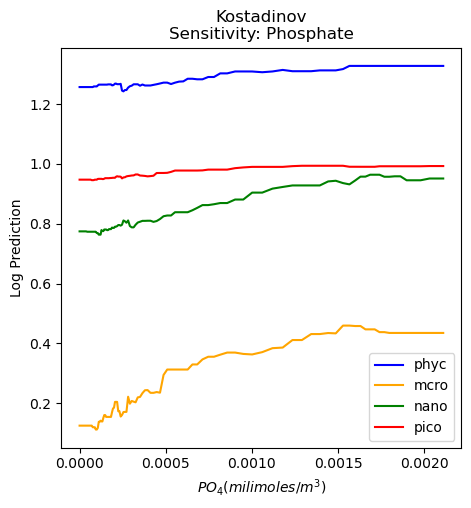

In [290]:
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data=po450.reset_index(drop=True),x="po4",y="logphyc_pred",ax=ax,sort=True,label="phyc",color='blue')
sns.lineplot(data=po450.reset_index(drop=True),x="po4",y="logmcro_pred",ax=ax,sort=True,label="mcro", color='orange')
sns.lineplot(data=po450.reset_index(drop=True),x="po4",y="lognano_pred",ax=ax,sort=True,label="nano",color='green')
sns.lineplot(data=po450.reset_index(drop=True),x="po4",y="logpico_pred",ax=ax,sort=True,label="pico",color='red')
ax.set_ylabel("Log Prediction")
ax.set_xlabel(r"$PO_4 (milimoles/m^3)$")
ax.set_title("Kostadinov\nSensitivity: Phosphate")
plt.legend()
plt.show()
fig.savefig(path + "kostadinov_po4_sens_plot.jpg",bbox_inches='tight')

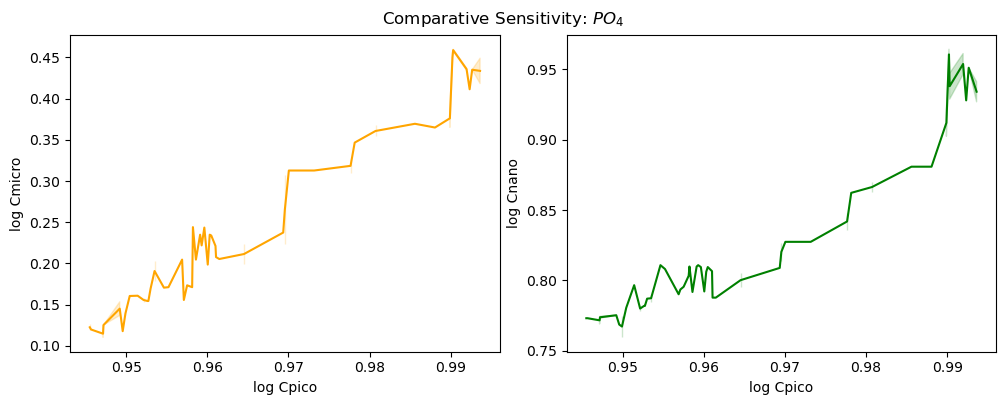

In [291]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=po450.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=po450.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle(r"Comparative Sensitivity: $PO_4$")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_po4.jpg",bbox_inches='tight')

#### Sensitivity Analysis for mld

In [292]:
Xmld_50 = dataprep(Xs.copy(deep=True), 'mld', 0.5)
print(Xmld_50.shape)
Xmld_50.head()

(431112, 10)


dfe       mld       nh4       no3     po4      rsn       sal  \
0  0.024987  0.056353  0.079609  0.030147  0.1204  0.54316  0.813054   
1  0.024987  0.019778  0.079609  0.030147  0.1204  0.54316  0.813054   
2  0.024987  0.070315  0.079609  0.030147  0.1204  0.54316  0.813054   
3  0.024987  0.025018  0.079609  0.030147  0.1204  0.54316  0.813054   
4  0.024987  0.011044  0.079609  0.030147  0.1204  0.54316  0.813054   

        sil      sst       w50  
0  0.023933  0.55695  0.515614  
1  0.023933  0.55695  0.515614  
2  0.023933  0.55695  0.515614  
3  0.023933  0.55695  0.515614  
4  0.023933  0.55695  0.515614

In [293]:
yphyc_pred = model_phyc.predict(Xmld_50)
re = mean_squared_error(yphyc,yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn=re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.36088798475913825
Normalised RMSE: 1.1203122783105324
R2_score: -0.2551025122475934


In [294]:
ymcro_pred = model_mcro.predict(Xmld_50)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.9221296006582347
Normalised RMSE: 1.1331338631069556
R2_score: -0.2839953300532345


In [295]:
ynano_pred = model_nano.predict(Xmld_50)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.6071254261051439
Normalised RMSE: 1.1759497186427523
R2_score: -0.3828609484365031


In [296]:
ypico_pred = model_pico.predict(Xmld_50)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)

RMSE: 0.18137928882110527
Normalised RMSE: 1.1806520808543317
R2_score PICO : -0.39394256939093597


In [297]:
mld_50 = X.copy(deep=True)
mld_50["logphyc_pred"] = yphyc_pred
mld_50["logmcro_pred"] = ymcro_pred
mld_50["lognano_pred"] = ynano_pred
mld_50["logpico_pred"] = ypico_pred
mld_50 = mld_50[mld_50['mld'] != 0.0]
mld_50["log_mld"]   = np.log10(mld_50["mld"])

In [298]:
mld_50.head()

dfe      mld       nh4       no3       po4  \
lon   lat   month                                                        
353.5 -59.5 4      2.306388e-07   86.517  0.000425  0.025467  0.001708   
318.5 -68.5 3      2.514458e-07   30.365  0.000478  0.023877  0.001816   
170.5 -29.5 9      2.459837e-07  107.952  0.000149  0.000654  0.000159   
181.5 -26.5 3      1.320913e-07   38.409  0.000007  0.000191  0.000199   
15.5   42.5 9      2.358271e-06   16.955  0.000016  0.000908  0.000031   

                          rsn        sal       sil       sst           w50  \
lon   lat   month                                                            
353.5 -59.5 4       34.019231  34.020813  0.065237   0.07411  1.227698e-06   
318.5 -68.5 3       38.784615  33.715412  0.083421  -1.28571  1.870424e-07   
170.5 -29.5 9      201.314815  35.750488  0.001274  18.73140 -1.005181e-06   
181.5 -26.5 3      212.400000  35.506290  0.001566  25.08090 -7.575274e-07   
15.5   42.5 9      168.125926  37.851990  0.003989  21.97101  6.550670e-09   

                   logphyc_pred  logmcro_pred  lognano_pred  logpico_pred  \
lon   lat   month                                                           
353.5 -59.5 4          1.210118      0.210679      0.814898      0.939493   
318.5 -68.5 3          1.339085      0.261471      0.866784      0.975974   
170.5 -29.5 9          1.208621      0.227281      0.837014      0.936090   
181.5 -26.5 3          1.290520      0.257576      0.862235      0.955257   
15.5   42.5 9          1.378009      0.303598      0.892629      0.985213   

                    log_mld  
lon   lat   month            
353.5 -59.5 4      1.937101  
318.5 -68.5 3      1.482373  
170.5 -29.5 9      2.033231  
181.5 -26.5 3      1.584433  
15.5   42.5 9      1.229298

In [299]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=mld_50.reset_index(drop=True),x="log_mld",y="logphyc_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="phyc")
# sns.lineplot(data=mld_50.reset_index(drop=True),x="log_mld",y="logmcro_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cmicro")
# sns.lineplot(data=mld_50.reset_index(drop=True),x="log_mld",y="lognano_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cnano")
# sns.lineplot(data=mld_50.reset_index(drop=True),x="log_mld",y="logpico_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cpico")
# ax.set_ylabel("log Prediction")
# ax.set_xlabel("log MLD (m)")
# ax.set_title("Sensivity: MLD")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# #fig.savefig("kostadinov_logplot_mld.jpg",bbox_inches='tight')

In [300]:
Xqmld50 = Xqs.copy(deep=True)
for col in Xqs.columns:
    if col != 'mld':
        Xqmld50[col] = Xqmld50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xqmld50[col] = Xqmld50[col]

In [301]:
yqphyc_pred = model_phyc.predict(Xqmld50)
yqmcro_pred = model_mcro.predict(Xqmld50)
yqnano_pred = model_nano.predict(Xqmld50)
yqpico_pred = model_pico.predict(Xqmld50)

In [302]:
mld50 = Xq.copy(deep=True)
mld50['logphyc_pred']=yqphyc_pred
mld50['logmcro_pred']=yqmcro_pred
mld50['lognano_pred']=yqnano_pred
mld50['logpico_pred']=yqpico_pred
mld50['logmld'] = np.log(mld50['mld'])

C:\Users\dutts\miniconda3\envs\phy\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [303]:
mld50.head()

dfe       mld       nh4           no3       po4  rsn  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0   

            sal       sil       sst       w50  logphyc_pred  logmcro_pred  \
0.00   8.198891  0.000000 -1.907710 -0.000087      1.397510      0.270381   
0.01  29.785942  0.000089 -1.839509 -0.000009      1.397510      0.270381   
0.02  31.683790  0.000222 -1.774310 -0.000006      1.386588      0.270381   
0.03  32.332041  0.000336 -1.713110 -0.000005      1.376769      0.265661   
0.04  32.599701  0.000432 -1.628910 -0.000004      1.376769      0.259204   

      lognano_pred  logpico_pred    logmld  
0.00      0.932766      0.988494      -inf  
0.01      0.932766      0.986882  2.643128  
0.02      0.925483      0.985615  2.799170  
0.03      0.912690      0.986370  2.901531  
0.04      0.912436      0.980038  2.982596

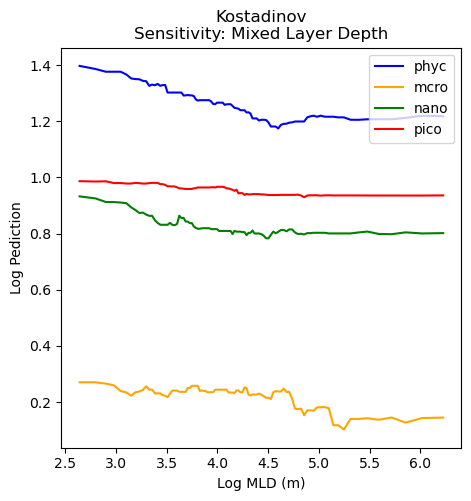

In [304]:
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data=mld50.reset_index(drop=True),x="logmld",y="logphyc_pred",ax=ax,sort=True,label="phyc",color='blue')
sns.lineplot(data=mld50.reset_index(drop=True),x="logmld",y="logmcro_pred",ax=ax,sort=True,label="mcro", color='orange')
sns.lineplot(data=mld50.reset_index(drop=True),x="logmld",y="lognano_pred",ax=ax,sort=True,label="nano",color='green')
sns.lineplot(data=mld50.reset_index(drop=True),x="logmld",y="logpico_pred",ax=ax,sort=True,label="pico",color='red')
ax.set_ylabel("Log Pediction")
ax.set_xlabel(r"Log MLD (m)")
ax.set_title("Kostadinov\nSensitivity: Mixed Layer Depth")
plt.legend()
plt.show()
fig.savefig(path + "kostadinov_mld_sens_plot.jpg",bbox_inches='tight')

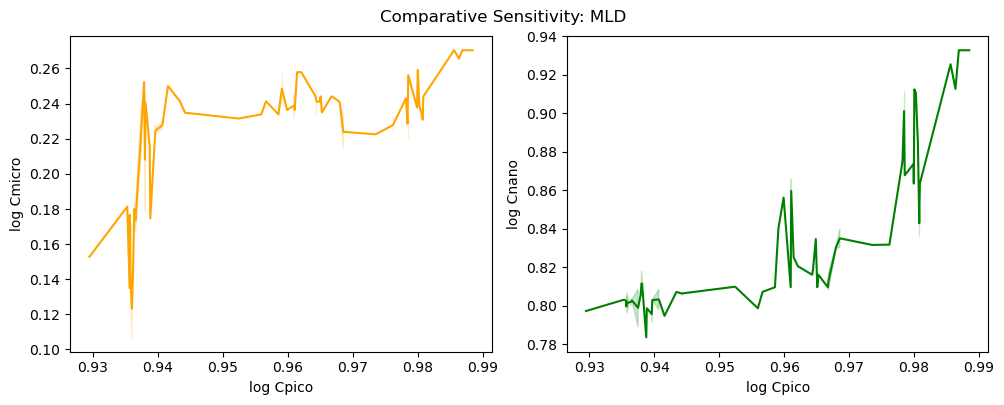

In [305]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=mld50.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=mld50.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle(r"Comparative Sensitivity: MLD")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_mld.jpg",bbox_inches='tight')

In [306]:
# rmsemld = pd.DataFrame(columns=['rtest', 'rorig','rmld','rtest_mean','rorig_mean','rmld_mean'], index=['phyc','cmicro','cnano','cpico'])

# rmsemld.loc['phyc'] = pd.Series({'rtest':rsmephyc_test, 'rorig':rsmephyc, 'rmld':rphyc_mld50,
#                                  'rtest_mean':rsmephyc_test/df_j["phyc"].mean(),'rorig_mean':rsmephyc/df_j["phyc"].mean(),
#                                  'rmld_mean':rphyc_mld50/df_j["phyc"].mean() })

# rmsemld.loc['cmicro'] = pd.Series({'rtest':rsmemicro_test, 'rorig':rsmemicro, 'rmld':rmicro_mld50,
#                                  'rtest_mean':rsmemicro_test/df_j["cmicro"].mean(),'rorig_mean':rsmemicro/df_j["cmicro"].mean(),
#                                  'rmld_mean':rmicro_mld50/df_j["cmicro"].mean() })

# rmsemld.loc['cnano'] = pd.Series({'rtest':rsmenano_test, 'rorig':rsmenano, 'rmld':rnano_mld50,
#                                  'rtest_mean':rsmenano_test/df_j["cnano"].mean(),'rorig_mean':rsmenano/df_j["cnano"].mean(),
#                                  'rmld_mean':rnano_mld50/df_j["cnano"].mean() })

# rmsemld.loc['cpico'] = pd.Series({'rtest':rsmepico_test, 'rorig':rsmepico, 'rmld':rpico_mld50,
#                                  'rtest_mean':rsmepico_test/df_j["cpico"].mean(),'rorig_mean':rsmepico/df_j["cpico"].mean(),
#                                  'rmld_mean':rpico_mld50/df_j["cpico"].mean() })

# rmse['rmld'] = [rphyc_mld50,rmicro_mld50,rnano_mld50,rpico_mld50]

#### Sensitivity Analysis si

In [107]:
Xqsil50 = Xqs.copy(deep=True)
for col in Xqs.columns:
    if col != 'sil':
        Xqsil50[col] = Xqsil50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xqsil50[col] = Xqsil50[col]

In [108]:
yqphyc_pred = model_phyc.predict(Xqsil50)
yqmcro_pred = model_mcro.predict(Xqsil50)
yqnano_pred = model_nano.predict(Xqsil50)
yqpico_pred = model_pico.predict(Xqsil50)

In [109]:
sil50 = Xq.copy(deep=True)
sil50['logphyc_pred']=yqphyc_pred
sil50['logmcro_pred']=yqmcro_pred
sil50['lognano_pred']=yqnano_pred
sil50['logpico_pred']=yqpico_pred

In [110]:
sil50.head()

dfe       mld       nh4           no3       po4  rsn       sst  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0 -1.907710   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0 -1.839509   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0 -1.774310   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0 -1.713110   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0 -1.628910   

            sal       w50       sil  logphyc_pred  logmcro_pred  lognano_pred  \
0.00   8.198891 -0.000087  0.000000     -2.822021      0.243280      0.834626   
0.01  29.785942 -0.000009  0.000089     -2.822021      0.243280      0.840816   
0.02  31.683790 -0.000006  0.000222     -2.822021      0.243280      0.840816   
0.03  32.332041 -0.000005  0.000336     -2.822021      0.247865      0.841591   
0.04  32.599701 -0.000004  0.000432     -2.821830      0.268616      0.841591   

      logpico_pred  
0.00      0.944346  
0.01      0.944346  
0.02      0.944346  
0.03      0.944346  
0.04      0.941715

In [111]:
print(sil50[optlist].to_numpy().min(), sil50[optlist].to_numpy().max())

0.24328035401069623 0.9732309435296459


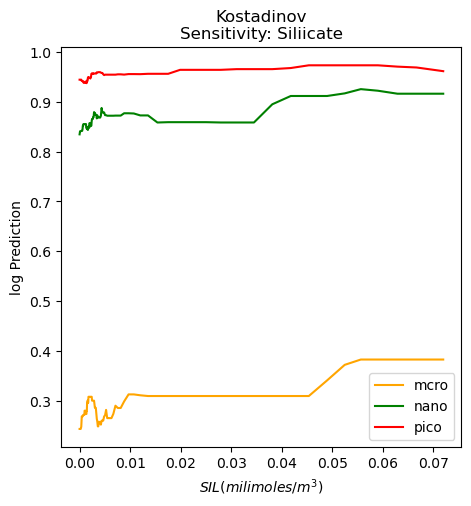

In [113]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax=fig.add_axes([0,0,1,1])
# sns.lineplot(data=sil50.reset_index(drop=True),x='sil',y='logphyc_pred',ax=ax,sort=True,label='phyc',color='blue')
sns.lineplot(data=sil50.reset_index(drop=True),x='sil',y='logmcro_pred',ax=ax,sort=True,label='mcro',color='orange')
sns.lineplot(data=sil50.reset_index(drop=True),x='sil',y='lognano_pred',ax=ax,sort=True,label='nano',color='green')
sns.lineplot(data=sil50.reset_index(drop=True),x='sil',y='logpico_pred',ax=ax,sort=True,label='pico',color='red')
ax.set_ylabel("log Prediction")
# ax.set_ylim([0.3,1.0])
ax.set_xlabel(r"$SIL (milimoles/m^3)$")
ax.set_title("Kostadinov\nSensitivity: Siliicate")
plt.legend()
plt.show()
fig.savefig(chartpath + "kostadinov_sensplot_sil.jpg",bbox_inches='tight')

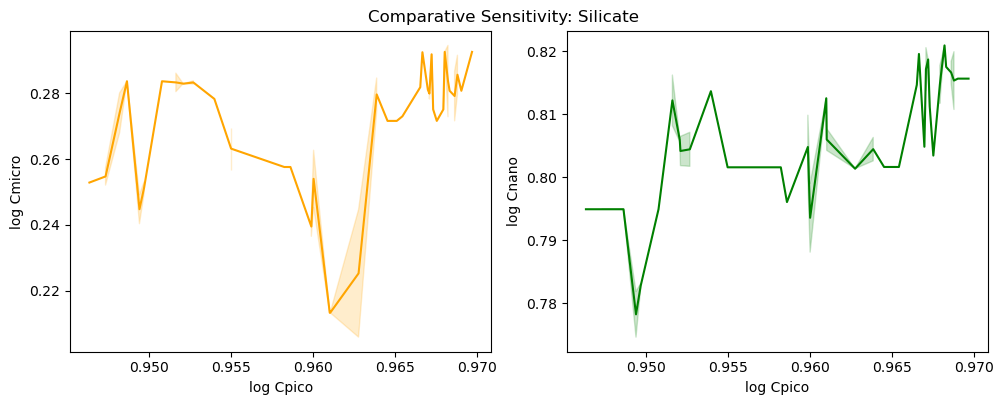

In [320]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=sil50.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=sil50.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle(r"Comparative Sensitivity: Silicate")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_si.jpg",bbox_inches='tight')

In [321]:
# rmsesi = pd.DataFrame(columns=['rtest', 'rorig','rsi','rtest_mean','rorig_mean','rsi_mean'], index=['phyc','cmicro','cnano','cpico'])

# rmsesi.loc['phyc'] = pd.Series({'rtest':rsmephyc_test, 'rorig':rsmephyc, 'rsi':rphyc_si50,
#                                  'rtest_mean':rsmephyc_test/df_j["phyc"].mean(),'rorig_mean':rsmephyc/df_j["phyc"].mean(),
#                                  'rsi_mean':rphyc_si50/df_j["phyc"].mean() })

# rmsesi.loc['cmicro'] = pd.Series({'rtest':rsmemicro_test, 'rorig':rsmemicro, 'rsi':rmicro_si50,
#                                  'rtest_mean':rsmemicro_test/df_j["cmicro"].mean(),'rorig_mean':rsmemicro/df_j["cmicro"].mean(),
#                                  'rsi_mean':rmicro_si50/df_j["cmicro"].mean() })

# rmsesi.loc['cnano'] = pd.Series({'rtest':rsmenano_test, 'rorig':rsmenano, 'rsi':rnano_si50,
#                                  'rtest_mean':rsmenano_test/df_j["cnano"].mean(),'rorig_mean':rsmenano/df_j["cnano"].mean(),
#                                  'rsi_mean':rnano_si50/df_j["cnano"].mean() })

# rmsesi.loc['cpico'] = pd.Series({'rtest':rsmepico_test, 'rorig':rsmepico, 'rsi':rpico_si50,
#                                  'rtest_mean':rsmepico_test/df_j["cpico"].mean(),'rorig_mean':rsmepico/df_j["cpico"].mean(),
#                                  'rsi_mean':rpico_si50/df_j["cpico"].mean() })


# rmse['rsi'] = [rphyc_si50,rmicro_si50,rnano_si50,rpico_si50]

#### Sensitivity Analysis for sos

In [322]:
Xsos_50 = dataprep(Xs.copy(deep=True), 'sal', 0.5)
print(Xsos_50.shape)
Xsos_50.head()

(431112, 10)


dfe       mld       nh4       no3     po4      rsn       sal  \
0  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.796235   
1  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.786721   
2  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.850122   
3  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.842515   
4  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.915593   

        sil      sst       w50  
0  0.023933  0.55695  0.515614  
1  0.023933  0.55695  0.515614  
2  0.023933  0.55695  0.515614  
3  0.023933  0.55695  0.515614  
4  0.023933  0.55695  0.515614

In [323]:
yphyc_pred = model_phyc.predict(Xsos_50)
re = mean_squared_error(yphyc,yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn=re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.35310436837800846
Normalised RMSE: 1.0961494317495457
R2_score: -0.20154636381118674


In [324]:
ymcro_pred = model_mcro.predict(Xsos_50)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.9284189124807857
Normalised RMSE: 1.1408623127703048
R2_score: -0.3015698357986727


In [325]:
ynano_pred = model_nano.predict(Xsos_50)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.5937806318935197
Normalised RMSE: 1.1501020003233633
R2_score: -0.3227376793474326


In [326]:
ypico_pred = model_pico.predict(Xsos_50)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)

RMSE: 0.17869780269884158
Normalised RMSE: 1.1631974850699411
R2_score PICO : -0.35303152774175794


In [327]:
sos_50 = X.copy(deep=True)
sos_50["logphyc_pred"] = yphyc_pred
sos_50["logmcro_pred"] = ymcro_pred
sos_50["lognano_pred"] = ynano_pred
sos_50["logpico_pred"] = ypico_pred

In [328]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=sos_50.reset_index(drop=True),x="sal",y="logphyc_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="phyc")
# sns.lineplot(data=sos_50.reset_index(drop=True),x="sal",y="logmcro_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cmicro")
# sns.lineplot(data=sos_50.reset_index(drop=True),x="sal",y="lognano_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cnano")
# sns.lineplot(data=sos_50.reset_index(drop=True),x="sal",y="logpico_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cpico")
# ax.set_ylabel("log Prediction")
# ax.set_xlabel("surface salinity (PSU)")
# ax.set_title("Sensivity: Surface Salinity")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# # fig.savefig("sens_logplot_sos.jpg",bbox_inches='tight')

In [329]:
Xqsal50 = Xqs.copy(deep=True)
for col in Xqs.columns:
    if col != 'sal':
        Xqsal50[col] = Xqsal50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xqsal50[col] = Xqsal50[col]

In [330]:
yqphyc_pred = model_phyc.predict(Xqsal50)
yqmcro_pred = model_mcro.predict(Xqsal50)
yqnano_pred = model_nano.predict(Xqsal50)
yqpico_pred = model_pico.predict(Xqsal50)

In [331]:
sal50 = Xq.copy(deep=True)
sal50['logphyc_pred']=yqphyc_pred
sal50['logmcro_pred']=yqmcro_pred
sal50['lognano_pred']=yqnano_pred
sal50['logpico_pred']=yqpico_pred
sal50['logsal'] = np.log(sal50['sal'])

In [332]:
sal50.head()

dfe       mld       nh4           no3       po4  rsn  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0   

            sal       sil       sst       w50  logphyc_pred  logmcro_pred  \
0.00   8.198891  0.000000 -1.907710 -0.000087      1.274402      0.404930   
0.01  29.785942  0.000089 -1.839509 -0.000009      1.278397      0.399556   
0.02  31.683790  0.000222 -1.774310 -0.000006      1.273241      0.408894   
0.03  32.332041  0.000336 -1.713110 -0.000005      1.273241      0.408894   
0.04  32.599701  0.000432 -1.628910 -0.000004      1.273034      0.405925   

      lognano_pred  logpico_pred    logsal  
0.00      0.862835      0.974101  2.103999  
0.01      0.862835      0.972077  3.394037  
0.02      0.856873      0.972077  3.455805  
0.03      0.845830      0.964217  3.476059  
0.04      0.833766      0.958860  3.484303

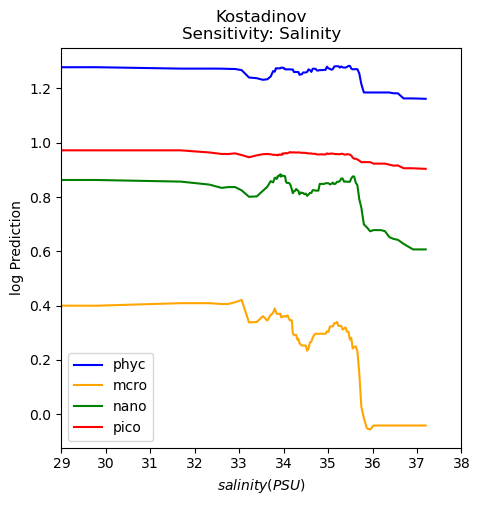

In [333]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax=fig.add_axes([0,0,1,1])
sns.lineplot(data=sal50.reset_index(drop=True),x='sal',y='logphyc_pred',ax=ax,sort=True,label='phyc',color='blue')
sns.lineplot(data=sal50.reset_index(drop=True),x='sal',y='logmcro_pred',ax=ax,sort=True,label='mcro',color='orange')
sns.lineplot(data=sal50.reset_index(drop=True),x='sal',y='lognano_pred',ax=ax,sort=True,label='nano',color='green')
sns.lineplot(data=sal50.reset_index(drop=True),x='sal',y='logpico_pred',ax=ax,sort=True,label='pico',color='red')
# ax.set_xlim([33,35])
ax.set_ylabel("log Prediction")
ax.set_xlabel(r"$salinity (PSU)$")
ax.set_xlim([29,38])
ax.set_title("Kostadinov\nSensitivity: Salinity")
plt.legend()
plt.show()
fig.savefig(path + "kostadinov_sal_sens_plot.jpg",bbox_inches='tight')

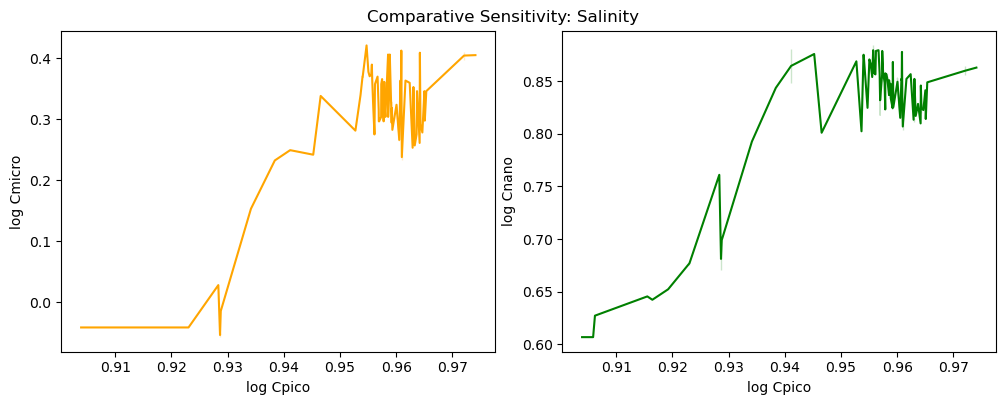

In [334]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=sal50.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=sal50.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle(r"Comparative Sensitivity: Salinity")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_sos.jpg",bbox_inches='tight')

In [335]:
# rmsesos = pd.DataFrame(columns=['rtest', 'rorig','rsos','rtest_mean','rorig_mean','rsos_mean'], index=['phyc','cmicro','cnano','cpico'])

# rmsesos.loc['phyc'] = pd.Series({'rtest':rsmephyc_test, 'rorig':rsmephyc, 'rsos':rphyc_sos50,
#                                  'rtest_mean':rsmephyc_test/df_j["phyc"].mean(),'rorig_mean':rsmephyc/df_j["phyc"].mean(),
#                                  'rsos_mean':rphyc_sos50/df_j["phyc"].mean() })

# rmsesos.loc['cmicro'] = pd.Series({'rtest':rsmemicro_test, 'rorig':rsmemicro, 'rsos':rmicro_sos50,
#                                  'rtest_mean':rsmemicro_test/df_j["cmicro"].mean(),'rorig_mean':rsmemicro/df_j["cmicro"].mean(),
#                                  'rsos_mean':rmicro_sos50/df_j["cmicro"].mean() })

# rmsesos.loc['cnano'] = pd.Series({'rtest':rsmenano_test, 'rorig':rsmenano, 'rsos':rnano_sos50,
#                                  'rtest_mean':rsmenano_test/df_j["cnano"].mean(),'rorig_mean':rsmenano/df_j["cnano"].mean(),
#                                  'rsos_mean':rnano_sos50/df_j["cnano"].mean() })

# rmsesos.loc['cpico'] = pd.Series({'rtest':rsmepico_test, 'rorig':rsmepico, 'rsos':rpico_sos50,
#                                  'rtest_mean':rsmepico_test/df_j["cpico"].mean(),'rorig_mean':rsmepico/df_j["cpico"].mean(),
#                                  'rsos_mean':rpico_sos50/df_j["cpico"].mean() })

# rmse['rsos'] = [rphyc_sos50,rmicro_sos50,rnano_sos50,rpico_sos50]

#### Sensitivity Analysis for wo5

In [336]:
Xwmo_50 = dataprep(Xs.copy(deep=True), 'w50', 0.5)
print(Xwmo_50.shape)
Xwmo_50.head()

(431112, 10)


dfe       mld       nh4       no3     po4      rsn       sal  \
0  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.813054   
1  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.813054   
2  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.813054   
3  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.813054   
4  0.024987  0.040509  0.079609  0.030147  0.1204  0.54316  0.813054   

        sil      sst       w50  
0  0.023933  0.55695  0.524309  
1  0.023933  0.55695  0.518119  
2  0.023933  0.55695  0.511026  
3  0.023933  0.55695  0.512499  
4  0.023933  0.55695  0.517045

In [337]:
yphyc_pred = model_phyc.predict(Xwmo_50)
re = mean_squared_error(yphyc,yphyc_pred, squared=False)
r2 = r2_score(yphyc, yphyc_pred)
rn=re/yphyc.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.35735436125416936
Normalised RMSE: 1.109342775399025
R2_score: -0.2306442479112989


In [338]:
ymcro_pred = model_mcro.predict(Xwmo_50)
re = mean_squared_error(ymcro, ymcro_pred, squared=False)
r2 = r2_score(ymcro, ymcro_pred)
rn = re/ymcro.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.924716361035748
Normalised RMSE: 1.1363125331956407
R2_score: -0.29120916816413156


In [339]:
ynano_pred = model_nano.predict(Xwmo_50)
re = mean_squared_error(ynano, ynano_pred, squared=False)
r2 = r2_score(ynano, ynano_pred)
rn = re/ynano.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score:",r2)

RMSE: 0.6090055484243327
Normalised RMSE: 1.1795913538258607
R2_score: -0.3914389895787389


In [340]:
ypico_pred = model_pico.predict(Xwmo_50)
re = mean_squared_error(ypico, ypico_pred, squared=False)
r2 = r2_score(ypico, ypico_pred)
rn = re/ypico.std()
print('RMSE:',re)
print("Normalised RMSE:",rn)
print("R2_score PICO :",r2)

RMSE: 0.17996633429582398
Normalised RMSE: 1.1714547369278636
R2_score PICO : -0.3723093838560363


In [341]:
wmo_50 = X.copy(deep=True)
wmo_50["logphyc_pred"] = yphyc_pred
wmo_50["logmcro_pred"] = ymcro_pred
wmo_50["lognano_pred"] = ynano_pred
wmo_50["logpico_pred"] = ypico_pred
wmo_50["w50_scaled"] = wmo_50["w50"] * 1e6

In [342]:
wmo_50.head()

dfe      mld       nh4       no3       po4  \
lon   lat   month                                                        
353.5 -59.5 4      2.306388e-07   86.517  0.000425  0.025467  0.001708   
318.5 -68.5 3      2.514458e-07   30.365  0.000478  0.023877  0.001816   
170.5 -29.5 9      2.459837e-07  107.952  0.000149  0.000654  0.000159   
181.5 -26.5 3      1.320913e-07   38.409  0.000007  0.000191  0.000199   
15.5   42.5 9      2.358271e-06   16.955  0.000016  0.000908  0.000031   

                          rsn        sal       sil       sst           w50  \
lon   lat   month                                                            
353.5 -59.5 4       34.019231  34.020813  0.065237   0.07411  1.227698e-06   
318.5 -68.5 3       38.784615  33.715412  0.083421  -1.28571  1.870424e-07   
170.5 -29.5 9      201.314815  35.750488  0.001274  18.73140 -1.005181e-06   
181.5 -26.5 3      212.400000  35.506290  0.001566  25.08090 -7.575274e-07   
15.5   42.5 9      168.125926  37.851990  0.003989  21.97101  6.550670e-09   

                   logphyc_pred  logmcro_pred  lognano_pred  logpico_pred  \
lon   lat   month                                                           
353.5 -59.5 4          1.313284      0.432222      0.909402      0.972707   
318.5 -68.5 3          1.268038      0.337808      0.876684      0.968159   
170.5 -29.5 9          1.192564      0.107278      0.791052      0.931214   
181.5 -26.5 3          1.223094      0.144707      0.810380      0.935153   
15.5   42.5 9          1.267090      0.303074      0.860489      0.966685   

                   w50_scaled  
lon   lat   month              
353.5 -59.5 4        1.227698  
318.5 -68.5 3        0.187042  
170.5 -29.5 9       -1.005181  
181.5 -26.5 3       -0.757527  
15.5   42.5 9        0.006551

In [343]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=wmo_50.reset_index(drop=True),x="wo5_scaled",y="logphyc_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="phyc")
# sns.lineplot(data=wmo_50.reset_index(drop=True),x="wo5_scaled",y="logmcro_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cmicro")
# sns.lineplot(data=wmo_50.reset_index(drop=True),x="wo5_scaled",y="lognano_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cnano")
# sns.lineplot(data=wmo_50.reset_index(drop=True),x="wo5_scaled",y="logpico_pred",ax=ax,estimator='mean',errorbar='sd',sort=True, err_style='band',label="cpico")
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"upwelling ($\mu m/s$")
# ax.set_title("Sensivity: Upwelling at 50m")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# # fig.savefig("sens_logplot_wo5.jpg",bbox_inches='tight')

In [344]:
Xqwmo50 = Xqs.copy(deep=True)
for col in Xqs.columns:
    if col != 'w50':
        Xqwmo50[col] = Xqwmo50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xqwmo50[col] = Xqwmo50[col]

In [345]:
yqphyc_pred = model_phyc.predict(Xqwmo50)
yqmcro_pred = model_mcro.predict(Xqwmo50)
yqnano_pred = model_nano.predict(Xqwmo50)
yqpico_pred = model_pico.predict(Xqwmo50)

In [346]:
wmo50 = Xq.copy(deep=True)
wmo50['logphyc_pred']=yqphyc_pred
wmo50['logmcro_pred']=yqmcro_pred
wmo50['lognano_pred']=yqnano_pred
wmo50['logpico_pred']=yqpico_pred

In [347]:
wmo50.head()

dfe       mld       nh4           no3       po4  rsn  \
0.00  5.045405e-08   0.00000  0.000004  0.000000e+00  0.000000  0.0   
0.01  7.831972e-08  14.05711  0.000008  0.000000e+00  0.000011  0.0   
0.02  8.709057e-08  16.43100  0.000008  6.286818e-07  0.000021  0.0   
0.03  9.197394e-08  18.20200  0.000009  2.843963e-06  0.000030  0.0   
0.04  9.505904e-08  19.73900  0.000010  5.874563e-06  0.000038  0.0   

            sal       sil       sst       w50  logphyc_pred  logmcro_pred  \
0.00   8.198891  0.000000 -1.907710 -0.000087      1.255734     -0.030591   
0.01  29.785942  0.000089 -1.839509 -0.000009      1.255734     -0.030591   
0.02  31.683790  0.000222 -1.774310 -0.000006      1.255734     -0.030591   
0.03  32.332041  0.000336 -1.713110 -0.000005      1.262783     -0.030591   
0.04  32.599701  0.000432 -1.628910 -0.000004      1.258527     -0.030591   

      lognano_pred  logpico_pred  
0.00      0.815860      0.941017  
0.01      0.817441      0.941017  
0.02      0.819181      0.941017  
0.03      0.819181      0.941017  
0.04      0.805535      0.941017

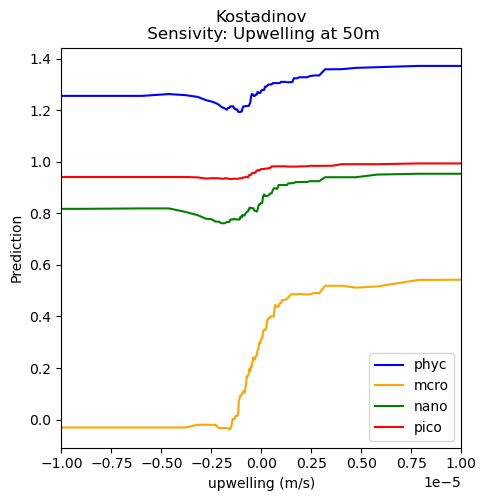

In [348]:
fig= plt.figure(figsize=(4,4), dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data=wmo50.reset_index(drop=True),x='w50',y='logphyc_pred',ax=ax,sort=True,label='phyc',color='blue')
sns.lineplot(data=wmo50.reset_index(drop=True),x='w50',y='logmcro_pred',ax=ax,sort=True,label='mcro',color='orange')
sns.lineplot(data=wmo50.reset_index(drop=True),x='w50',y='lognano_pred',ax=ax,sort=True,label='nano',color='green')
sns.lineplot(data=wmo50.reset_index(drop=True),x='w50',y='logpico_pred',ax=ax,sort=True,label='pico',color='red')
ax.set_ylabel("Prediction")
ax.set_xlabel("upwelling (m/s)")
ax.set_title("Kostadinov\n Sensivity: Upwelling at 50m")
ax.set_xlim([-1e-5,1e-5])
# fig.tight_layout(pad=1.0)
plt.legend()
plt.show()
fig.savefig(path + "kostadinov_w50_sens_plot.jpg",bbox_inches='tight')

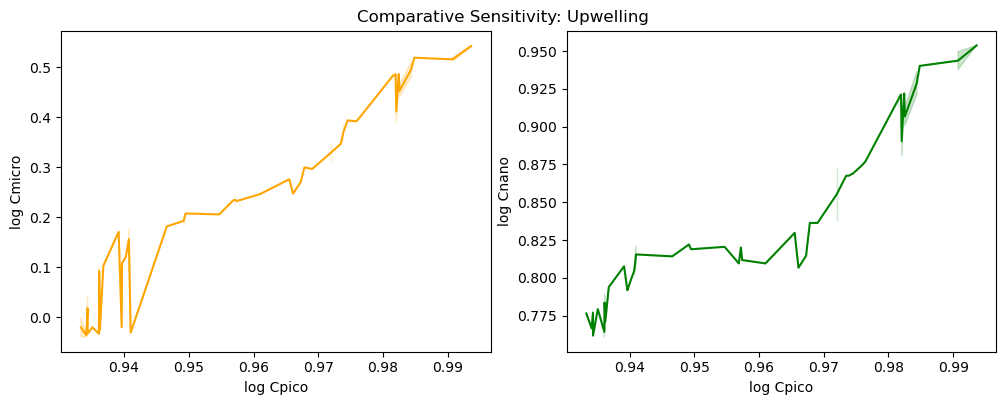

In [349]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.lineplot(data=wmo50.reset_index(drop=True),x="logpico_pred",y="logmcro_pred",ax=ax1,estimator='mean',errorbar='sd',sort=True, err_style='band',color='orange')
sns.lineplot(data=wmo50.reset_index(drop=True),x="logpico_pred",y="lognano_pred",ax=ax2,estimator='mean',errorbar='sd',sort=True, err_style='band',color='green')
ax1.set_xlabel("log Cpico")
ax1.set_ylabel("log Cmicro")
ax2.set_xlabel("log Cpico")
ax2.set_ylabel("log Cnano")
fig.suptitle(r"Comparative Sensitivity: Upwelling")
fig.tight_layout(pad=0.5)
plt.show()
# fig.savefig("comparison_wmo.jpg",bbox_inches='tight')

In [355]:
# rmsewmo = pd.DataFrame(columns=['rtest', 'rorig','rwho','rtest_mean','rorig_mean','rwho_mean'], index=['phyc','cmicro','cnano','cpico'])

# rmsewmo.loc['phyc'] = pd.Series({'rtest':rsmephyc_test, 'rorig':rsmephyc, 'rwho':rphyc_wmo50,
#                                  'rtest_mean':rsmephyc_test/df_j["phyc"].mean(),'rorig_mean':rsmephyc/df_j["phyc"].mean(),
#                                  'rwho_mean':rphyc_wmo50/df_j["phyc"].mean() })

# rmsewmo.loc['cmicro'] = pd.Series({'rtest':rsmemicro_test, 'rorig':rsmemicro, 'rwho':rmicro_wmo50,
#                                  'rtest_mean':rsmemicro_test/df_j["cmicro"].mean(),'rorig_mean':rsmemicro/df_j["cmicro"].mean(),
#                                  'rwho_mean':rmicro_wmo50/df_j["cmicro"].mean() })

# rmsewmo.loc['cnano'] = pd.Series({'rtest':rsmenano_test, 'rorig':rsmenano, 'rwho':rnano_wmo50,
#                                  'rtest_mean':rsmenano_test/df_j["cnano"].mean(),'rorig_mean':rsmenano/df_j["cnano"].mean(),
#                                  'rwho_mean':rnano_wmo50/df_j["cnano"].mean() })

# rmsewmo.loc['cpico'] = pd.Series({'rtest':rsmepico_test, 'rorig':rsmepico, 'rwho':rpico_wmo50,
#                                  'rtest_mean':rsmepico_test/df_j["cpico"].mean(),'rorig_mean':rsmepico/df_j["cpico"].mean(),
#                                  'rwho_mean':rpico_wmo50/df_j["cpico"].mean() })

# rmse['rwmo'] = [rphyc_wmo50,rmicro_wmo50,rnano_wmo50,rpico_wmo50]